In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("psyc.csv").copy()

In [3]:
df.head()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [4]:
df.tail()

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
310,Female,19,6,5,6,4,3,extraverted
311,Male,18,2,5,8,3,7,dependable
312,Male,18,7,5,6,2,7,serious
313,Male,23,6,7,5,4,3,extraverted
314,Female,18,5,7,3,5,6,extraverted


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             315 non-null    object
 1   age                315 non-null    int64 
 2   openness           315 non-null    int64 
 3   neuroticism        315 non-null    int64 
 4   conscientiousness  315 non-null    int64 
 5   agreeableness      315 non-null    int64 
 6   extraversion       315 non-null    int64 
 7   Personality        315 non-null    object
dtypes: int64(6), object(2)
memory usage: 19.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,315.0,20.244444,2.616811,5.0,18.0,20.0,22.0,28.0
openness,315.0,4.850794,1.537211,1.0,4.0,5.0,6.0,8.0
neuroticism,315.0,4.584127,1.818623,1.0,3.0,5.0,6.0,9.0
conscientiousness,315.0,4.812698,1.786315,1.0,4.0,5.0,6.0,9.0
agreeableness,315.0,4.844444,1.718555,1.0,4.0,5.0,6.0,8.0
extraversion,315.0,4.926984,1.466527,1.0,4.0,5.0,6.0,8.0


In [7]:
df.isnull().sum()

gender               0
age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

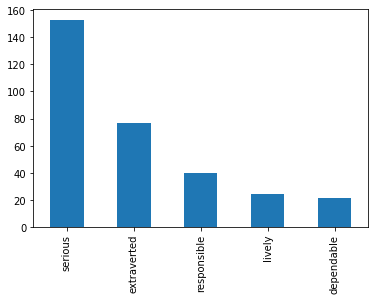

In [8]:
df["Personality"].value_counts().plot(kind="bar");

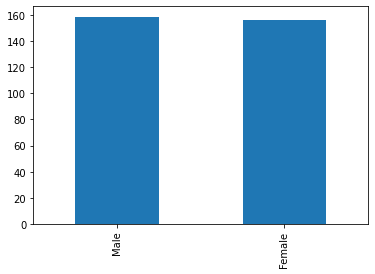

In [9]:
df["gender"].value_counts().plot(kind="bar");

In [10]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [11]:
df["gender_"]=lbe.fit_transform(df["gender"])
df["Personality_"]=lbe.fit_transform(df["Personality"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             315 non-null    object
 1   age                315 non-null    int64 
 2   openness           315 non-null    int64 
 3   neuroticism        315 non-null    int64 
 4   conscientiousness  315 non-null    int64 
 5   agreeableness      315 non-null    int64 
 6   extraversion       315 non-null    int64 
 7   Personality        315 non-null    object
 8   gender_            315 non-null    int32 
 9   Personality_       315 non-null    int32 
dtypes: int32(2), int64(6), object(2)
memory usage: 22.3+ KB


In [13]:
df["gender_"] = df["gender_"].astype("int64")
df["Personality_"] = df["Personality_"].astype("int64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             315 non-null    object
 1   age                315 non-null    int64 
 2   openness           315 non-null    int64 
 3   neuroticism        315 non-null    int64 
 4   conscientiousness  315 non-null    int64 
 5   agreeableness      315 non-null    int64 
 6   extraversion       315 non-null    int64 
 7   Personality        315 non-null    object
 8   gender_            315 non-null    int64 
 9   Personality_       315 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 24.7+ KB


In [37]:
df["gender"].groupby(df["Personality"]).value_counts()

Personality  gender
dependable   Female     11
             Male       10
extraverted  Female     58
             Male       19
lively       Male       16
             Female      7
responsible  Female     27
             Male       12
serious      Male      102
             Female     51
Name: gender, dtype: int64

In [15]:
def Boxplot(değişken):
    plt.figure()
    plt.boxplot(df[değişken],notch=True,flierprops={"markerfacecolor":"r"},data=df)
    plt.xlabel(df[değişken].name)
    plt.ylabel("Frekans")
    plt.show

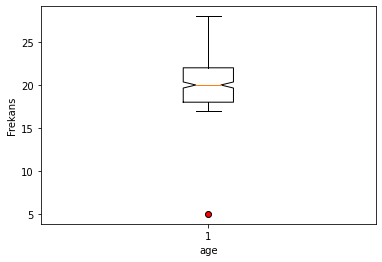

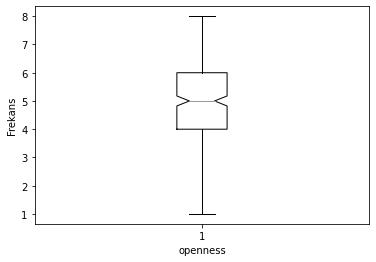

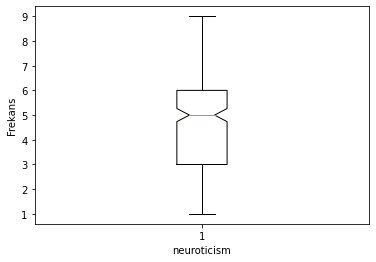

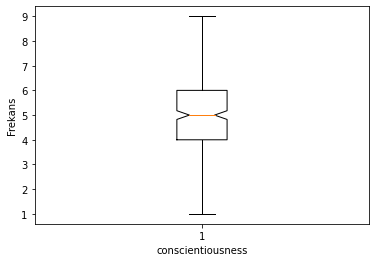

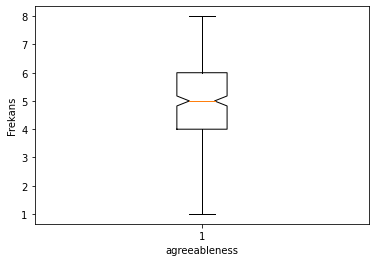

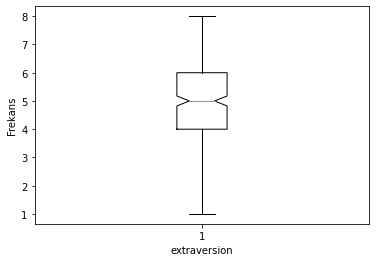

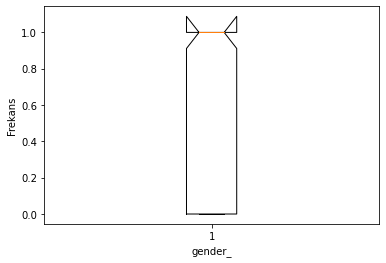

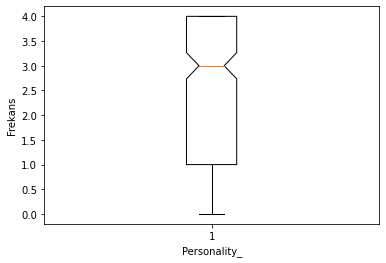

In [16]:
for değişken in df.columns:
    if df[değişken].dtype == "int64" and "float64":
        Boxplot(değişken)
    else:
        pass

In [17]:
df[df["age"]==5]

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,gender_,Personality_
261,Female,5,5,5,5,5,5,responsible,0,3


In [18]:
df.drop([261,262],axis=0,inplace=True)

In [19]:
df[df["age"]==5]

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,gender_,Personality_


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 314
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             313 non-null    object
 1   age                313 non-null    int64 
 2   openness           313 non-null    int64 
 3   neuroticism        313 non-null    int64 
 4   conscientiousness  313 non-null    int64 
 5   agreeableness      313 non-null    int64 
 6   extraversion       313 non-null    int64 
 7   Personality        313 non-null    object
 8   gender_            313 non-null    int64 
 9   Personality_       313 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 26.9+ KB


In [21]:
def Histplot(değişken):
    
    plt.figure()
    plt.hist(df[değişken], bins = 60, color = "r")
    plt.xlabel(değişken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(değişken))
    plt.show()
    

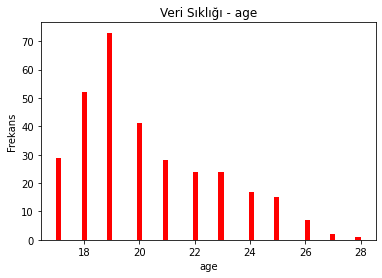

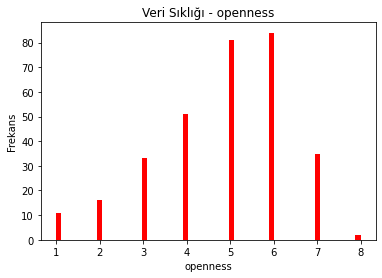

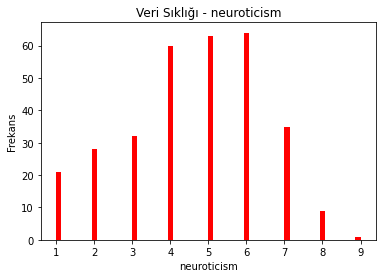

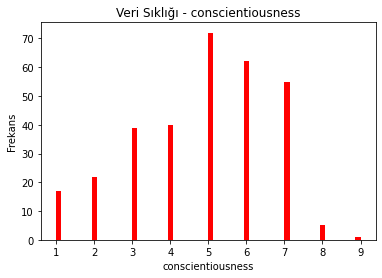

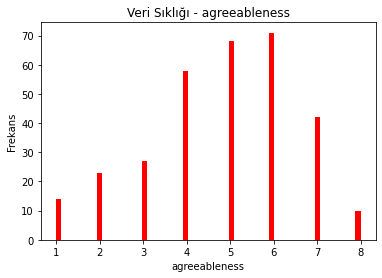

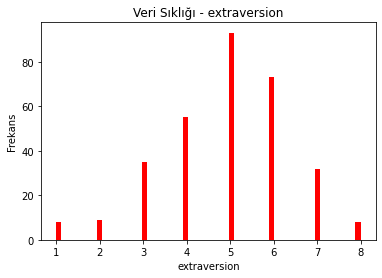

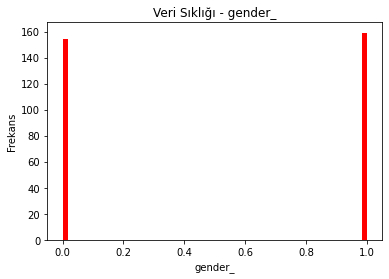

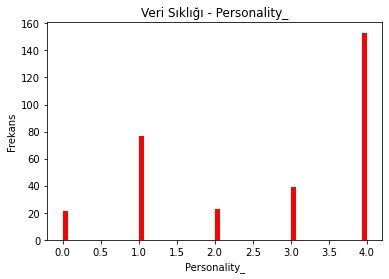

In [22]:
for değişken in df.columns:
    if df[değişken].dtype == "int64" and "float64":
        Histplot(değişken)
    else:
        pass

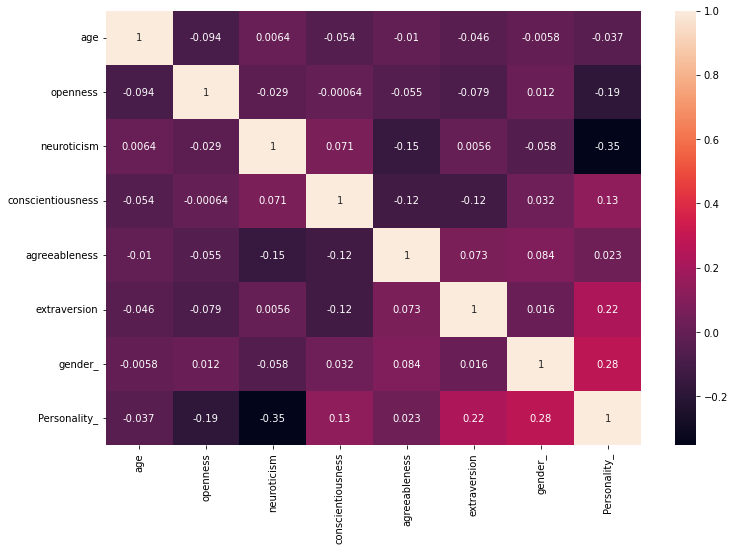

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True);

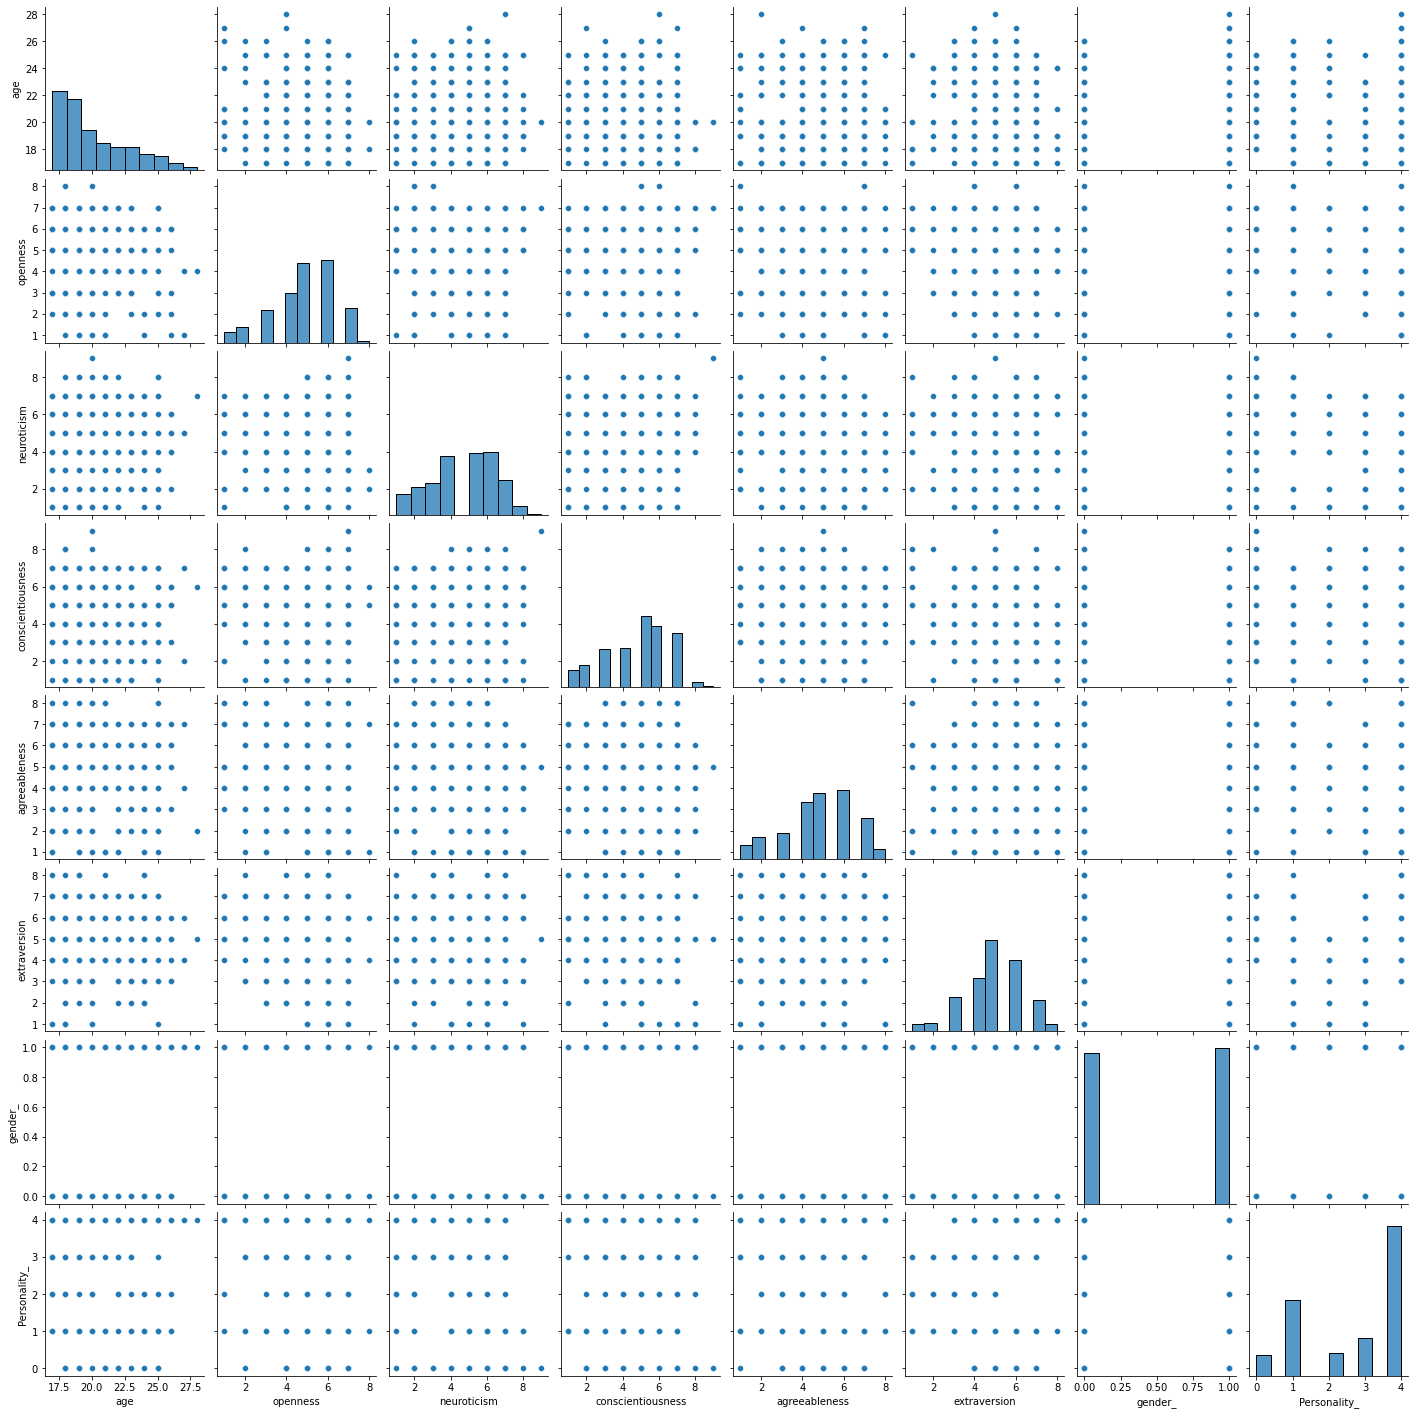

In [24]:
sns.pairplot(df)

In [126]:
X = df.drop(["Personality_","gender","Personality"],axis=1)
y = df.iloc[:,9:]

In [129]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

In [27]:
#logisticreg

In [130]:
log = LogisticRegression()

In [131]:
log_model = log.fit(x_train,y_train)

In [278]:
accuracy_score(y_test,log_model.predict(x_test))

0.7596153846153846

In [133]:
confusion_matrix(y_test,log.predict(x_test))

array([[ 0,  0,  0,  0,  4],
       [ 0, 21,  0,  0,  7],
       [ 0,  2,  3,  0,  1],
       [ 0,  3,  2,  1,  5],
       [ 0,  0,  1,  0, 54]], dtype=int64)

In [134]:
print(classification_report(y_test,log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.81      0.75      0.78        28
           2       0.50      0.50      0.50         6
           3       1.00      0.09      0.17        11
           4       0.76      0.98      0.86        55

    accuracy                           0.76       104
   macro avg       0.61      0.46      0.46       104
weighted avg       0.75      0.76      0.71       104



In [135]:
log_model.predict_proba(X)[0:10]

array([[2.43015395e-01, 6.83790090e-01, 1.47329699e-03, 2.35051589e-02,
        4.82160591e-02],
       [1.13286745e-01, 3.75868781e-02, 8.28811766e-02, 2.06414755e-01,
        5.59830445e-01],
       [1.09181000e-01, 1.56246877e-01, 2.78780970e-02, 3.63848469e-01,
        3.42845557e-01],
       [4.08824672e-02, 1.12894792e-03, 6.18957826e-03, 2.45704079e-02,
        9.27228599e-01],
       [9.18857942e-02, 3.61180761e-02, 2.87580298e-02, 4.34018975e-01,
        4.09219125e-01],
       [1.68438156e-01, 6.14050122e-02, 4.92769489e-02, 1.13403587e-01,
        6.07476296e-01],
       [7.27060772e-03, 2.38053982e-04, 1.31829783e-03, 4.05839493e-02,
        9.50589091e-01],
       [4.51987816e-02, 2.23667528e-02, 7.81885593e-02, 1.82693950e-01,
        6.71551956e-01],
       [6.23279003e-02, 1.37307971e-02, 2.23734768e-02, 4.56715918e-02,
        8.55896234e-01],
       [6.61249233e-02, 8.06792574e-02, 1.40701965e-01, 1.67922196e-01,
        5.44571659e-01]])

In [136]:
#Knn

In [137]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
accuracy_score(y_test,knn_model.predict(x_test))

0.6346153846153846

In [138]:
confusion_matrix(y_test,knn_model.predict(x_test))

array([[ 0,  2,  0,  0,  2],
       [ 2, 16,  1,  1,  8],
       [ 0,  0,  1,  1,  4],
       [ 1,  3,  0,  4,  3],
       [ 2,  3,  2,  3, 45]], dtype=int64)

In [139]:
#knn tuned

In [140]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [141]:
knn = KNeighborsClassifier()
knn_cv_model = GridSearchCV(estimator=knn,param_grid=knn_params,cv=10).fit(x_train,y_train)

In [142]:
knn_cv_model.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [143]:
knn = KNeighborsClassifier(n_neighbors=7).fit(x_train,y_train)
accuracy_score(y_test,knn.predict(x_test))

0.6730769230769231

In [144]:
confusion_matrix(y_test,knn.predict(x_test))

array([[ 0,  0,  0,  0,  4],
       [ 2, 15,  0,  0, 11],
       [ 0,  1,  0,  0,  5],
       [ 1,  2,  0,  4,  4],
       [ 1,  2,  1,  0, 51]], dtype=int64)

In [145]:
#svc

In [146]:
svc_model = SVC().fit(x_train,y_train)
accuracy_score(y_test,svc_model.predict(x_test))

0.6346153846153846

In [147]:
confusion_matrix(y_test,svc_model.predict(x_test))

array([[ 0,  0,  0,  0,  4],
       [ 0, 11,  0,  0, 17],
       [ 0,  0,  0,  0,  6],
       [ 0,  1,  0,  0, 10],
       [ 0,  0,  0,  0, 55]], dtype=int64)

In [148]:
#svc model tuned

In [149]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)
svc_cv_model.best_estimator_

Fitting 10 folds for each of 9 candidates, totalling 90 fits


SVC(C=8)

In [150]:
svc=SVC(C=9).fit(x_train,y_train)
print(f"accuracy_score = {accuracy_score(y_test,svc.predict(x_test))}, \nconfusion_matrix =\n {confusion_matrix(y_test,svc.predict(x_test))}")

accuracy_score = 0.7307692307692307, 
confusion_matrix =
 [[ 0  0  0  0  4]
 [ 0 19  0  0  9]
 [ 0  1  2  0  3]
 [ 0  2  2  3  4]
 [ 0  2  1  0 52]]


In [276]:
#decisiontree

In [152]:
dtc_model = DecisionTreeClassifier().fit(x_train,y_train)
print(f"accuracy_score = {accuracy_score(y_test,dtc_model.predict(x_test))}, \nconfusion_matrix =\n {confusion_matrix(y_test,dtc_model.predict(x_test))}")

accuracy_score = 0.6153846153846154, 
confusion_matrix =
 [[ 0  0  0  0  4]
 [ 5 15  2  3  3]
 [ 0  2  1  1  2]
 [ 1  1  3  5  1]
 [ 4  3  1  4 43]]


In [171]:
cart = DecisionTreeClassifier()
cart_params={"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) } 
cart_cv_model = GridSearchCV(estimator=cart,param_grid=cart_params,cv=10,n_jobs=-1).fit(x_train,y_train)

In [172]:
cart_cv_model.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=27)

In [173]:
cart_model = DecisionTreeClassifier(max_depth=4,min_samples_split=27).fit(x_train,y_train)
accuracy_score(y_test,cart_model.predict(x_test))

0.5576923076923077

In [ ]:
#RandomForest

In [188]:
rf_model = RandomForestClassifier().fit(x_train,y_train)
accuracy_score(y_test,rf_model.predict(x_test))

0.7019230769230769

In [189]:
confusion_matrix(y_test,rf_model.predict(x_test))

array([[ 0,  0,  0,  0,  4],
       [ 0, 17,  1,  2,  8],
       [ 0,  0,  2,  1,  3],
       [ 1,  3,  1,  3,  3],
       [ 1,  2,  0,  1, 51]], dtype=int64)

In [190]:
rf = RandomForestClassifier()
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,500,1000]
             "min_samples_split": [2,5,10]}

rf_cv_model = GridSearchCV(estimator=rf,param_grid=rf_params,n_jobs=-1,cv=10,).fit(x_train,y_train)

In [192]:
rf_cv_model.best_estimator_

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=5,
                       n_estimators=500)

In [199]:
rf_tuned = RandomForestClassifier(n_estimators=50,max_depth=5,max_features=2,min_samples_split=5).fit(x_train,y_train)
accuracy_score(y_test,rf_tuned.predict(x_test))

0.7115384615384616

In [200]:
confusion_matrix(y_test,rf_tuned.predict(x_test))

array([[ 0,  0,  0,  0,  4],
       [ 1, 16,  1,  0, 10],
       [ 0,  0,  2,  0,  4],
       [ 0,  3,  0,  4,  4],
       [ 0,  2,  1,  0, 52]], dtype=int64)

In [ ]:
#GradientBoostingClassifier

In [201]:
gbm_model = GradientBoostingClassifier().fit(x_train,y_train)
accuracy_score(y_test,gbm_model.predict(x_test))

0.6826923076923077

In [202]:
gbm = GradientBoostingClassifier()

gbm_params = {"learning_rate" : [0.01, 0.1, 0.5],
             "n_estimators": [50,100,500],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

gbm_cv_model = GridSearchCV(estimator=gbm,param_grid=gbm_params,n_jobs=-1,cv=10).fit(x_train,y_train)

In [203]:
gbm_cv_model.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [219]:
gbm_tuned = GradientBoostingClassifier(n_estimators=200,learning_rate=0.7,max_depth=3).fit(x_train,y_train)
accuracy_score(y_test,gbm_tuned.predict(x_test))

0.7115384615384616

In [220]:
confusion_matrix(y_test,gbm_tuned.predict(x_test))

array([[ 1,  0,  0,  0,  3],
       [ 2, 16,  2,  3,  5],
       [ 0,  1,  3,  1,  1],
       [ 2,  1,  1,  4,  3],
       [ 1,  1,  0,  3, 50]], dtype=int64)

In [221]:
#xgboost

In [222]:
#!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [223]:
from xgboost import XGBClassifier

In [224]:
xgb_model = XGBClassifier().fit(x_train,y_train)
accuracy_score(y_test,xgb_model.predict(x_test))                  

0.7115384615384616

In [227]:
xgb = XGBClassifier()

xgb_params = {
        'n_estimators': [100, 500,250],
        'subsample': [0.5, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1,0.5]}

xgb_cv_model = GridSearchCV(estimator=xgb,param_grid=xgb_params,n_jobs=-1,cv=10).fit(x_train,y_train)

In [229]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [257]:
xgb_tuned = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=2,subsample=0.5).fit(x_train,y_train)
accuracy_score(y_test,xgb_tuned.predict(x_test))

0.7211538461538461

In [258]:
confusion_matrix(y_test,xgb_tuned.predict(x_test))

array([[ 0,  0,  0,  0,  4],
       [ 2, 16,  2,  0,  8],
       [ 0,  0,  3,  0,  3],
       [ 2,  2,  1,  4,  2],
       [ 1,  1,  1,  0, 52]], dtype=int64)

In [260]:
#!pip install catboost

In [261]:
from catboost import CatBoostClassifier

In [264]:
catb_model = CatBoostClassifier().fit(x_train,y_train)

Learning rate set to 0.073055
0:	learn: 1.5684246	total: 4.35ms	remaining: 4.35s
1:	learn: 1.5288913	total: 4.94ms	remaining: 2.47s
2:	learn: 1.4877563	total: 5.47ms	remaining: 1.82s
3:	learn: 1.4508589	total: 5.96ms	remaining: 1.48s
4:	learn: 1.4201548	total: 6.47ms	remaining: 1.29s
5:	learn: 1.3887176	total: 6.93ms	remaining: 1.15s
6:	learn: 1.3609965	total: 7.38ms	remaining: 1.05s
7:	learn: 1.3299049	total: 7.83ms	remaining: 970ms
8:	learn: 1.2927269	total: 8.32ms	remaining: 916ms
9:	learn: 1.2713845	total: 8.77ms	remaining: 868ms
10:	learn: 1.2425666	total: 9.24ms	remaining: 831ms
11:	learn: 1.2254953	total: 9.69ms	remaining: 798ms
12:	learn: 1.1995033	total: 10.2ms	remaining: 772ms
13:	learn: 1.1814853	total: 10.7ms	remaining: 750ms
14:	learn: 1.1651253	total: 11.1ms	remaining: 731ms
15:	learn: 1.1488437	total: 11.6ms	remaining: 712ms
16:	learn: 1.1353565	total: 12ms	remaining: 695ms
17:	learn: 1.1168841	total: 12.5ms	remaining: 684ms
18:	learn: 1.1003346	total: 13ms	remaining: 67

345:	learn: 0.1778059	total: 161ms	remaining: 305ms
346:	learn: 0.1770608	total: 162ms	remaining: 304ms
347:	learn: 0.1763316	total: 162ms	remaining: 304ms
348:	learn: 0.1756569	total: 163ms	remaining: 304ms
349:	learn: 0.1752082	total: 163ms	remaining: 303ms
350:	learn: 0.1745923	total: 164ms	remaining: 303ms
351:	learn: 0.1738805	total: 164ms	remaining: 302ms
352:	learn: 0.1733975	total: 165ms	remaining: 302ms
353:	learn: 0.1728383	total: 165ms	remaining: 301ms
354:	learn: 0.1723193	total: 166ms	remaining: 301ms
355:	learn: 0.1716727	total: 166ms	remaining: 300ms
356:	learn: 0.1713616	total: 167ms	remaining: 300ms
357:	learn: 0.1707959	total: 167ms	remaining: 300ms
358:	learn: 0.1701200	total: 168ms	remaining: 299ms
359:	learn: 0.1693378	total: 168ms	remaining: 299ms
360:	learn: 0.1686666	total: 168ms	remaining: 298ms
361:	learn: 0.1681681	total: 169ms	remaining: 298ms
362:	learn: 0.1675896	total: 170ms	remaining: 297ms
363:	learn: 0.1671530	total: 170ms	remaining: 297ms
364:	learn: 

658:	learn: 0.0813089	total: 322ms	remaining: 167ms
659:	learn: 0.0812071	total: 323ms	remaining: 166ms
660:	learn: 0.0810228	total: 323ms	remaining: 166ms
661:	learn: 0.0808657	total: 324ms	remaining: 165ms
662:	learn: 0.0807233	total: 324ms	remaining: 165ms
663:	learn: 0.0805889	total: 325ms	remaining: 164ms
664:	learn: 0.0804799	total: 325ms	remaining: 164ms
665:	learn: 0.0803483	total: 326ms	remaining: 163ms
666:	learn: 0.0801943	total: 326ms	remaining: 163ms
667:	learn: 0.0800621	total: 327ms	remaining: 162ms
668:	learn: 0.0799418	total: 327ms	remaining: 162ms
669:	learn: 0.0798134	total: 328ms	remaining: 161ms
670:	learn: 0.0797189	total: 328ms	remaining: 161ms
671:	learn: 0.0795648	total: 329ms	remaining: 160ms
672:	learn: 0.0794065	total: 329ms	remaining: 160ms
673:	learn: 0.0792662	total: 330ms	remaining: 160ms
674:	learn: 0.0791364	total: 330ms	remaining: 159ms
675:	learn: 0.0790191	total: 331ms	remaining: 159ms
676:	learn: 0.0788404	total: 331ms	remaining: 158ms
677:	learn: 

In [265]:
accuracy_score(y_test,catb_model.predict(x_test))

0.6730769230769231

In [266]:
cat = CatBoostClassifier()

catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.1],
    'depth': [3,5,8] }

catb_cv_model = GridSearchCV(estimator=cat,param_grid=catb_params,cv=10).fit(x_train,y_train) 

0:	learn: 1.6042812	total: 311us	remaining: 62ms
1:	learn: 1.5985907	total: 767us	remaining: 76ms
2:	learn: 1.5943143	total: 1.03ms	remaining: 67.9ms
3:	learn: 1.5872209	total: 1.29ms	remaining: 63.1ms
4:	learn: 1.5831193	total: 1.54ms	remaining: 60ms
5:	learn: 1.5784952	total: 1.78ms	remaining: 57.6ms
6:	learn: 1.5705336	total: 2.04ms	remaining: 56.1ms
7:	learn: 1.5622495	total: 2.29ms	remaining: 54.9ms
8:	learn: 1.5557417	total: 2.57ms	remaining: 54.6ms
9:	learn: 1.5491739	total: 2.86ms	remaining: 54.3ms
10:	learn: 1.5427325	total: 3.13ms	remaining: 53.8ms
11:	learn: 1.5379976	total: 3.4ms	remaining: 53.3ms
12:	learn: 1.5312906	total: 3.71ms	remaining: 53.4ms
13:	learn: 1.5251730	total: 4ms	remaining: 53.1ms
14:	learn: 1.5186083	total: 4.28ms	remaining: 52.8ms
15:	learn: 1.5149445	total: 4.53ms	remaining: 52.1ms
16:	learn: 1.5110533	total: 4.82ms	remaining: 51.9ms
17:	learn: 1.5051145	total: 5.1ms	remaining: 51.6ms
18:	learn: 1.5004283	total: 5.41ms	remaining: 51.5ms
19:	learn: 1.495

48:	learn: 1.3568225	total: 12.7ms	remaining: 39.1ms
49:	learn: 1.3535331	total: 13ms	remaining: 39ms
50:	learn: 1.3494540	total: 13.3ms	remaining: 38.8ms
51:	learn: 1.3458326	total: 13.5ms	remaining: 38.5ms
52:	learn: 1.3424768	total: 13.9ms	remaining: 38.5ms
53:	learn: 1.3384115	total: 14.2ms	remaining: 38.4ms
54:	learn: 1.3349374	total: 14.5ms	remaining: 38.2ms
55:	learn: 1.3324042	total: 14.8ms	remaining: 38ms
56:	learn: 1.3300536	total: 15ms	remaining: 37.7ms
57:	learn: 1.3268222	total: 15.3ms	remaining: 37.6ms
58:	learn: 1.3243803	total: 15.7ms	remaining: 37.4ms
59:	learn: 1.3206160	total: 16ms	remaining: 37.3ms
60:	learn: 1.3170559	total: 16.3ms	remaining: 37.1ms
61:	learn: 1.3136435	total: 16.6ms	remaining: 36.9ms
62:	learn: 1.3112204	total: 16.9ms	remaining: 36.7ms
63:	learn: 1.3079725	total: 17.1ms	remaining: 36.4ms
64:	learn: 1.3050957	total: 17.4ms	remaining: 36.1ms
65:	learn: 1.3028859	total: 17.7ms	remaining: 36ms
66:	learn: 1.2993867	total: 18ms	remaining: 35.8ms
67:	lea

90:	learn: 1.2345570	total: 23.9ms	remaining: 28.7ms
91:	learn: 1.2321161	total: 24.2ms	remaining: 28.5ms
92:	learn: 1.2302004	total: 24.5ms	remaining: 28.2ms
93:	learn: 1.2280305	total: 24.8ms	remaining: 28ms
94:	learn: 1.2258041	total: 25.1ms	remaining: 27.7ms
95:	learn: 1.2237187	total: 25.4ms	remaining: 27.5ms
96:	learn: 1.2212341	total: 25.7ms	remaining: 27.3ms
97:	learn: 1.2176092	total: 26ms	remaining: 27ms
98:	learn: 1.2146441	total: 26.2ms	remaining: 26.8ms
99:	learn: 1.2126538	total: 26.5ms	remaining: 26.5ms
100:	learn: 1.2104018	total: 26.8ms	remaining: 26.3ms
101:	learn: 1.2071556	total: 27.1ms	remaining: 26ms
102:	learn: 1.2048772	total: 27.4ms	remaining: 25.8ms
103:	learn: 1.2023463	total: 27.7ms	remaining: 25.6ms
104:	learn: 1.2001330	total: 28ms	remaining: 25.3ms
105:	learn: 1.1974164	total: 28.3ms	remaining: 25.1ms
106:	learn: 1.1963482	total: 28.5ms	remaining: 24.8ms
107:	learn: 1.1942572	total: 28.8ms	remaining: 24.5ms
108:	learn: 1.1923293	total: 29.1ms	remaining: 2

127:	learn: 1.1404868	total: 33.3ms	remaining: 18.7ms
128:	learn: 1.1396371	total: 33.6ms	remaining: 18.5ms
129:	learn: 1.1378592	total: 33.9ms	remaining: 18.2ms
130:	learn: 1.1361357	total: 34.2ms	remaining: 18ms
131:	learn: 1.1339482	total: 34.5ms	remaining: 17.8ms
132:	learn: 1.1323106	total: 34.8ms	remaining: 17.5ms
133:	learn: 1.1301653	total: 35ms	remaining: 17.2ms
134:	learn: 1.1289235	total: 35.3ms	remaining: 17ms
135:	learn: 1.1262398	total: 35.6ms	remaining: 16.8ms
136:	learn: 1.1242304	total: 35.9ms	remaining: 16.5ms
137:	learn: 1.1223045	total: 36.2ms	remaining: 16.3ms
138:	learn: 1.1208396	total: 36.5ms	remaining: 16ms
139:	learn: 1.1194922	total: 36.8ms	remaining: 15.8ms
140:	learn: 1.1173448	total: 37.1ms	remaining: 15.5ms
141:	learn: 1.1152720	total: 37.3ms	remaining: 15.3ms
142:	learn: 1.1124567	total: 37.6ms	remaining: 15ms
143:	learn: 1.1113316	total: 37.9ms	remaining: 14.7ms
144:	learn: 1.1102945	total: 38.1ms	remaining: 14.5ms
145:	learn: 1.1088799	total: 38.4ms	re

175:	learn: 1.0978448	total: 47.2ms	remaining: 6.44ms
176:	learn: 1.0965937	total: 47.5ms	remaining: 6.18ms
177:	learn: 1.0955844	total: 47.9ms	remaining: 5.92ms
178:	learn: 1.0938588	total: 48.2ms	remaining: 5.66ms
179:	learn: 1.0924111	total: 48.5ms	remaining: 5.39ms
180:	learn: 1.0908400	total: 48.8ms	remaining: 5.12ms
181:	learn: 1.0890574	total: 49.1ms	remaining: 4.86ms
182:	learn: 1.0873799	total: 49.5ms	remaining: 4.59ms
183:	learn: 1.0859312	total: 49.8ms	remaining: 4.33ms
184:	learn: 1.0848766	total: 50.1ms	remaining: 4.06ms
185:	learn: 1.0839042	total: 50.3ms	remaining: 3.79ms
186:	learn: 1.0826774	total: 50.6ms	remaining: 3.52ms
187:	learn: 1.0810339	total: 50.8ms	remaining: 3.25ms
188:	learn: 1.0800790	total: 51.1ms	remaining: 2.97ms
189:	learn: 1.0789245	total: 51.4ms	remaining: 2.7ms
190:	learn: 1.0776482	total: 51.6ms	remaining: 2.43ms
191:	learn: 1.0765731	total: 51.9ms	remaining: 2.16ms
192:	learn: 1.0760588	total: 52.2ms	remaining: 1.89ms
193:	learn: 1.0746083	total: 

10:	learn: 1.2083660	total: 3.64ms	remaining: 62.5ms
11:	learn: 1.1904744	total: 3.96ms	remaining: 62.1ms
12:	learn: 1.1710793	total: 4.23ms	remaining: 60.8ms
13:	learn: 1.1508235	total: 4.49ms	remaining: 59.7ms
14:	learn: 1.1334275	total: 4.76ms	remaining: 58.8ms
15:	learn: 1.1190097	total: 5.04ms	remaining: 58ms
16:	learn: 1.1026551	total: 5.32ms	remaining: 57.3ms
17:	learn: 1.0858827	total: 5.59ms	remaining: 56.5ms
18:	learn: 1.0732653	total: 5.86ms	remaining: 55.9ms
19:	learn: 1.0642407	total: 6.12ms	remaining: 55.1ms
20:	learn: 1.0479507	total: 6.39ms	remaining: 54.5ms
21:	learn: 1.0369930	total: 6.66ms	remaining: 53.9ms
22:	learn: 1.0328187	total: 6.88ms	remaining: 52.9ms
23:	learn: 1.0217160	total: 7.13ms	remaining: 52.3ms
24:	learn: 1.0129124	total: 7.39ms	remaining: 51.7ms
25:	learn: 1.0023374	total: 7.64ms	remaining: 51.1ms
26:	learn: 0.9967725	total: 7.91ms	remaining: 50.7ms
27:	learn: 0.9932307	total: 8.17ms	remaining: 50.2ms
28:	learn: 0.9859525	total: 8.43ms	remaining: 49

1:	learn: 1.4743138	total: 11.9ms	remaining: 1.18s
2:	learn: 1.4097070	total: 12.8ms	remaining: 837ms
3:	learn: 1.3611346	total: 13.1ms	remaining: 643ms
4:	learn: 1.3359230	total: 13.4ms	remaining: 524ms
5:	learn: 1.2939489	total: 13.7ms	remaining: 444ms
6:	learn: 1.2592588	total: 14ms	remaining: 387ms
7:	learn: 1.2282819	total: 14.4ms	remaining: 345ms
8:	learn: 1.2005721	total: 14.7ms	remaining: 313ms
9:	learn: 1.1781281	total: 15ms	remaining: 285ms
10:	learn: 1.1594707	total: 15.3ms	remaining: 263ms
11:	learn: 1.1427283	total: 15.6ms	remaining: 244ms
12:	learn: 1.1269281	total: 15.9ms	remaining: 229ms
13:	learn: 1.1090936	total: 16.3ms	remaining: 216ms
14:	learn: 1.0893535	total: 16.6ms	remaining: 205ms
15:	learn: 1.0763322	total: 16.9ms	remaining: 194ms
16:	learn: 1.0669140	total: 17.2ms	remaining: 185ms
17:	learn: 1.0535486	total: 17.5ms	remaining: 177ms
18:	learn: 1.0398970	total: 17.8ms	remaining: 170ms
19:	learn: 1.0274547	total: 18.1ms	remaining: 163ms
20:	learn: 1.0132694	tota

10:	learn: 1.1886920	total: 3.25ms	remaining: 55.8ms
11:	learn: 1.1746056	total: 3.54ms	remaining: 55.4ms
12:	learn: 1.1526161	total: 3.8ms	remaining: 54.7ms
13:	learn: 1.1336249	total: 4.06ms	remaining: 54ms
14:	learn: 1.1138794	total: 4.33ms	remaining: 53.4ms
15:	learn: 1.0971159	total: 4.63ms	remaining: 53.3ms
16:	learn: 1.0841106	total: 4.91ms	remaining: 52.8ms
17:	learn: 1.0654970	total: 5.2ms	remaining: 52.6ms
18:	learn: 1.0494984	total: 5.46ms	remaining: 52ms
19:	learn: 1.0340643	total: 5.73ms	remaining: 51.6ms
20:	learn: 1.0202552	total: 5.98ms	remaining: 51ms
21:	learn: 1.0097870	total: 6.25ms	remaining: 50.6ms
22:	learn: 0.9982554	total: 6.5ms	remaining: 50ms
23:	learn: 0.9832813	total: 6.76ms	remaining: 49.6ms
24:	learn: 0.9733720	total: 7.01ms	remaining: 49.1ms
25:	learn: 0.9630389	total: 7.27ms	remaining: 48.6ms
26:	learn: 0.9557728	total: 7.55ms	remaining: 48.4ms
27:	learn: 0.9462930	total: 7.85ms	remaining: 48.2ms
28:	learn: 0.9425883	total: 8.13ms	remaining: 47.9ms
29:	

49:	learn: 0.8519689	total: 13.2ms	remaining: 39.6ms
50:	learn: 0.8479134	total: 13.5ms	remaining: 39.6ms
51:	learn: 0.8463554	total: 13.8ms	remaining: 39.3ms
52:	learn: 0.8408047	total: 14.1ms	remaining: 39.1ms
53:	learn: 0.8354584	total: 14.4ms	remaining: 38.9ms
54:	learn: 0.8318406	total: 14.7ms	remaining: 38.6ms
55:	learn: 0.8288132	total: 14.9ms	remaining: 38.3ms
56:	learn: 0.8242954	total: 15.2ms	remaining: 38.1ms
57:	learn: 0.8216078	total: 15.4ms	remaining: 37.8ms
58:	learn: 0.8165262	total: 15.7ms	remaining: 37.6ms
59:	learn: 0.8136689	total: 16ms	remaining: 37.3ms
60:	learn: 0.8096836	total: 16.2ms	remaining: 37ms
61:	learn: 0.8054918	total: 16.5ms	remaining: 36.7ms
62:	learn: 0.8015480	total: 16.7ms	remaining: 36.4ms
63:	learn: 0.7983530	total: 17ms	remaining: 36.1ms
64:	learn: 0.7948556	total: 17.2ms	remaining: 35.8ms
65:	learn: 0.7923688	total: 17.5ms	remaining: 35.5ms
66:	learn: 0.7895960	total: 17.7ms	remaining: 35.2ms
67:	learn: 0.7850188	total: 18ms	remaining: 34.9ms
6

102:	learn: 0.6777563	total: 27.7ms	remaining: 26.1ms
103:	learn: 0.6763907	total: 28.1ms	remaining: 25.9ms
104:	learn: 0.6729313	total: 28.4ms	remaining: 25.7ms
105:	learn: 0.6698715	total: 28.7ms	remaining: 25.5ms
106:	learn: 0.6667621	total: 29ms	remaining: 25.2ms
107:	learn: 0.6639158	total: 29.3ms	remaining: 25ms
108:	learn: 0.6611030	total: 29.6ms	remaining: 24.7ms
109:	learn: 0.6593332	total: 29.9ms	remaining: 24.5ms
110:	learn: 0.6579310	total: 30.2ms	remaining: 24.2ms
111:	learn: 0.6562464	total: 30.5ms	remaining: 24ms
112:	learn: 0.6547715	total: 30.9ms	remaining: 23.8ms
113:	learn: 0.6529725	total: 31.2ms	remaining: 23.5ms
114:	learn: 0.6498537	total: 31.5ms	remaining: 23.3ms
115:	learn: 0.6470094	total: 31.8ms	remaining: 23ms
116:	learn: 0.6445859	total: 32ms	remaining: 22.7ms
117:	learn: 0.6419024	total: 32.4ms	remaining: 22.5ms
118:	learn: 0.6405201	total: 32.7ms	remaining: 22.2ms
119:	learn: 0.6385906	total: 33ms	remaining: 22ms
120:	learn: 0.6364121	total: 33.3ms	remain

386:	learn: 0.9331526	total: 106ms	remaining: 31.1ms
387:	learn: 0.9327124	total: 107ms	remaining: 30.8ms
388:	learn: 0.9316599	total: 107ms	remaining: 30.5ms
389:	learn: 0.9310985	total: 107ms	remaining: 30.3ms
390:	learn: 0.9308582	total: 108ms	remaining: 30ms
391:	learn: 0.9301759	total: 108ms	remaining: 29.7ms
392:	learn: 0.9292961	total: 108ms	remaining: 29.5ms
393:	learn: 0.9289201	total: 108ms	remaining: 29.2ms
394:	learn: 0.9281488	total: 109ms	remaining: 28.9ms
395:	learn: 0.9275786	total: 109ms	remaining: 28.6ms
396:	learn: 0.9266620	total: 109ms	remaining: 28.4ms
397:	learn: 0.9261565	total: 110ms	remaining: 28.1ms
398:	learn: 0.9256074	total: 110ms	remaining: 27.8ms
399:	learn: 0.9251587	total: 110ms	remaining: 27.6ms
400:	learn: 0.9247522	total: 111ms	remaining: 27.3ms
401:	learn: 0.9246202	total: 111ms	remaining: 27ms
402:	learn: 0.9241168	total: 111ms	remaining: 26.7ms
403:	learn: 0.9234393	total: 111ms	remaining: 26.5ms
404:	learn: 0.9227328	total: 112ms	remaining: 26.2

384:	learn: 0.9177035	total: 102ms	remaining: 30.6ms
385:	learn: 0.9170631	total: 103ms	remaining: 30.3ms
386:	learn: 0.9163506	total: 103ms	remaining: 30.1ms
387:	learn: 0.9159824	total: 103ms	remaining: 29.8ms
388:	learn: 0.9148786	total: 104ms	remaining: 29.6ms
389:	learn: 0.9142906	total: 104ms	remaining: 29.3ms
390:	learn: 0.9141900	total: 104ms	remaining: 29.1ms
391:	learn: 0.9136383	total: 105ms	remaining: 28.8ms
392:	learn: 0.9133700	total: 105ms	remaining: 28.6ms
393:	learn: 0.9126863	total: 105ms	remaining: 28.3ms
394:	learn: 0.9119642	total: 106ms	remaining: 28ms
395:	learn: 0.9114155	total: 106ms	remaining: 27.8ms
396:	learn: 0.9106741	total: 106ms	remaining: 27.5ms
397:	learn: 0.9097502	total: 106ms	remaining: 27.2ms
398:	learn: 0.9089233	total: 107ms	remaining: 27ms
399:	learn: 0.9082331	total: 107ms	remaining: 26.7ms
400:	learn: 0.9078233	total: 107ms	remaining: 26.4ms
401:	learn: 0.9071982	total: 107ms	remaining: 26.2ms
402:	learn: 0.9067263	total: 108ms	remaining: 25.9

348:	learn: 0.9390826	total: 101ms	remaining: 43.6ms
349:	learn: 0.9385450	total: 101ms	remaining: 43.4ms
350:	learn: 0.9380294	total: 101ms	remaining: 43.1ms
351:	learn: 0.9374481	total: 102ms	remaining: 42.8ms
352:	learn: 0.9368946	total: 102ms	remaining: 42.5ms
353:	learn: 0.9363453	total: 102ms	remaining: 42.2ms
354:	learn: 0.9354215	total: 102ms	remaining: 41.9ms
355:	learn: 0.9348289	total: 103ms	remaining: 41.6ms
356:	learn: 0.9340536	total: 103ms	remaining: 41.3ms
357:	learn: 0.9335599	total: 103ms	remaining: 41ms
358:	learn: 0.9327478	total: 104ms	remaining: 40.7ms
359:	learn: 0.9322250	total: 104ms	remaining: 40.4ms
360:	learn: 0.9311665	total: 104ms	remaining: 40.1ms
361:	learn: 0.9306632	total: 104ms	remaining: 39.8ms
362:	learn: 0.9301445	total: 105ms	remaining: 39.5ms
363:	learn: 0.9293268	total: 105ms	remaining: 39.2ms
364:	learn: 0.9286436	total: 105ms	remaining: 38.9ms
365:	learn: 0.9280892	total: 105ms	remaining: 38.6ms
366:	learn: 0.9276502	total: 106ms	remaining: 38

339:	learn: 0.9186047	total: 92ms	remaining: 43.3ms
340:	learn: 0.9179018	total: 92.3ms	remaining: 43.1ms
341:	learn: 0.9176743	total: 92.6ms	remaining: 42.8ms
342:	learn: 0.9173873	total: 93ms	remaining: 42.6ms
343:	learn: 0.9169292	total: 93.3ms	remaining: 42.3ms
344:	learn: 0.9162229	total: 93.7ms	remaining: 42.1ms
345:	learn: 0.9154609	total: 94ms	remaining: 41.9ms
346:	learn: 0.9146640	total: 94.3ms	remaining: 41.6ms
347:	learn: 0.9136987	total: 94.6ms	remaining: 41.3ms
348:	learn: 0.9133216	total: 94.9ms	remaining: 41ms
349:	learn: 0.9128459	total: 95.1ms	remaining: 40.8ms
350:	learn: 0.9121947	total: 95.4ms	remaining: 40.5ms
351:	learn: 0.9115496	total: 95.7ms	remaining: 40.2ms
352:	learn: 0.9109869	total: 96ms	remaining: 40ms
353:	learn: 0.9103850	total: 96.3ms	remaining: 39.7ms
354:	learn: 0.9096033	total: 96.6ms	remaining: 39.5ms
355:	learn: 0.9087728	total: 97ms	remaining: 39.2ms
356:	learn: 0.9079960	total: 97.4ms	remaining: 39ms
357:	learn: 0.9074305	total: 97.7ms	remainin

257:	learn: 0.9967490	total: 82.7ms	remaining: 77.6ms
258:	learn: 0.9959498	total: 83.1ms	remaining: 77.3ms
259:	learn: 0.9951265	total: 83.4ms	remaining: 77ms
260:	learn: 0.9942249	total: 83.7ms	remaining: 76.6ms
261:	learn: 0.9933476	total: 84ms	remaining: 76.3ms
262:	learn: 0.9927890	total: 84.4ms	remaining: 76ms
263:	learn: 0.9917007	total: 84.7ms	remaining: 75.7ms
264:	learn: 0.9907578	total: 85ms	remaining: 75.4ms
265:	learn: 0.9900371	total: 85.3ms	remaining: 75.1ms
266:	learn: 0.9889466	total: 85.7ms	remaining: 74.8ms
267:	learn: 0.9883136	total: 85.9ms	remaining: 74.4ms
268:	learn: 0.9874815	total: 86.2ms	remaining: 74.1ms
269:	learn: 0.9867955	total: 86.6ms	remaining: 73.7ms
270:	learn: 0.9860056	total: 86.9ms	remaining: 73.4ms
271:	learn: 0.9847651	total: 87.3ms	remaining: 73.1ms
272:	learn: 0.9842907	total: 87.6ms	remaining: 72.8ms
273:	learn: 0.9833933	total: 87.9ms	remaining: 72.5ms
274:	learn: 0.9819655	total: 88.2ms	remaining: 72.2ms
275:	learn: 0.9810527	total: 88.6ms	

246:	learn: 1.0042730	total: 65.6ms	remaining: 67.2ms
247:	learn: 1.0032512	total: 66ms	remaining: 67ms
248:	learn: 1.0026245	total: 66.3ms	remaining: 66.8ms
249:	learn: 1.0010150	total: 66.5ms	remaining: 66.5ms
250:	learn: 1.0002831	total: 66.8ms	remaining: 66.3ms
251:	learn: 0.9995949	total: 67.1ms	remaining: 66.1ms
252:	learn: 0.9983367	total: 67.4ms	remaining: 65.8ms
253:	learn: 0.9972936	total: 67.7ms	remaining: 65.5ms
254:	learn: 0.9962947	total: 68ms	remaining: 65.3ms
255:	learn: 0.9953965	total: 68.3ms	remaining: 65.1ms
256:	learn: 0.9943045	total: 68.6ms	remaining: 64.9ms
257:	learn: 0.9930899	total: 68.9ms	remaining: 64.6ms
258:	learn: 0.9918028	total: 69.2ms	remaining: 64.4ms
259:	learn: 0.9913585	total: 69.5ms	remaining: 64.1ms
260:	learn: 0.9903877	total: 69.8ms	remaining: 63.9ms
261:	learn: 0.9897059	total: 70ms	remaining: 63.6ms
262:	learn: 0.9891823	total: 70.3ms	remaining: 63.3ms
263:	learn: 0.9883258	total: 70.5ms	remaining: 63.1ms
264:	learn: 0.9877452	total: 70.8ms	

242:	learn: 0.9865437	total: 66.6ms	remaining: 70.5ms
243:	learn: 0.9857401	total: 67ms	remaining: 70.3ms
244:	learn: 0.9844486	total: 67.3ms	remaining: 70ms
245:	learn: 0.9836721	total: 67.5ms	remaining: 69.7ms
246:	learn: 0.9827822	total: 67.8ms	remaining: 69.4ms
247:	learn: 0.9819220	total: 68.1ms	remaining: 69.2ms
248:	learn: 0.9813153	total: 68.4ms	remaining: 69ms
249:	learn: 0.9796915	total: 68.7ms	remaining: 68.7ms
250:	learn: 0.9785276	total: 69ms	remaining: 68.4ms
251:	learn: 0.9777303	total: 69.2ms	remaining: 68.1ms
252:	learn: 0.9764562	total: 69.5ms	remaining: 67.9ms
253:	learn: 0.9752500	total: 69.8ms	remaining: 67.6ms
254:	learn: 0.9745245	total: 70.1ms	remaining: 67.4ms
255:	learn: 0.9736310	total: 70.4ms	remaining: 67.1ms
256:	learn: 0.9729437	total: 70.8ms	remaining: 66.9ms
257:	learn: 0.9719831	total: 71.1ms	remaining: 66.7ms
258:	learn: 0.9704130	total: 71.4ms	remaining: 66.4ms
259:	learn: 0.9692424	total: 71.7ms	remaining: 66.1ms
260:	learn: 0.9684820	total: 71.9ms	

201:	learn: 1.0603386	total: 57.7ms	remaining: 85.1ms
202:	learn: 1.0592744	total: 58.1ms	remaining: 84.9ms
203:	learn: 1.0577436	total: 58.3ms	remaining: 84.6ms
204:	learn: 1.0560931	total: 58.6ms	remaining: 84.3ms
205:	learn: 1.0545881	total: 58.9ms	remaining: 84.1ms
206:	learn: 1.0537859	total: 59.2ms	remaining: 83.8ms
207:	learn: 1.0523035	total: 59.6ms	remaining: 83.6ms
208:	learn: 1.0514980	total: 59.9ms	remaining: 83.3ms
209:	learn: 1.0505313	total: 60.2ms	remaining: 83.1ms
210:	learn: 1.0495249	total: 60.5ms	remaining: 82.9ms
211:	learn: 1.0486472	total: 60.8ms	remaining: 82.5ms
212:	learn: 1.0477916	total: 61ms	remaining: 82.2ms
213:	learn: 1.0464502	total: 61.3ms	remaining: 81.9ms
214:	learn: 1.0457692	total: 61.6ms	remaining: 81.6ms
215:	learn: 1.0448378	total: 61.9ms	remaining: 81.3ms
216:	learn: 1.0434945	total: 62.1ms	remaining: 81ms
217:	learn: 1.0423919	total: 62.4ms	remaining: 80.7ms
218:	learn: 1.0412642	total: 62.7ms	remaining: 80.5ms
219:	learn: 1.0399664	total: 63m

175:	learn: 1.0978448	total: 48.4ms	remaining: 89.2ms
176:	learn: 1.0965937	total: 48.8ms	remaining: 89ms
177:	learn: 1.0955844	total: 49.1ms	remaining: 88.8ms
178:	learn: 1.0938588	total: 49.4ms	remaining: 88.5ms
179:	learn: 1.0924111	total: 49.7ms	remaining: 88.3ms
180:	learn: 1.0908400	total: 50ms	remaining: 88.1ms
181:	learn: 1.0890574	total: 50.2ms	remaining: 87.8ms
182:	learn: 1.0873799	total: 50.5ms	remaining: 87.5ms
183:	learn: 1.0859312	total: 50.8ms	remaining: 87.2ms
184:	learn: 1.0848766	total: 51.1ms	remaining: 87ms
185:	learn: 1.0839042	total: 51.4ms	remaining: 86.8ms
186:	learn: 1.0826774	total: 51.7ms	remaining: 86.5ms
187:	learn: 1.0810339	total: 52ms	remaining: 86.3ms
188:	learn: 1.0800790	total: 52.3ms	remaining: 86ms
189:	learn: 1.0789245	total: 52.6ms	remaining: 85.7ms
190:	learn: 1.0776482	total: 52.9ms	remaining: 85.5ms
191:	learn: 1.0765731	total: 53.2ms	remaining: 85.3ms
192:	learn: 1.0760588	total: 53.4ms	remaining: 85ms
193:	learn: 1.0746083	total: 53.7ms	rema

171:	learn: 1.1006002	total: 45.2ms	remaining: 86.2ms
172:	learn: 1.0981308	total: 45.5ms	remaining: 86.1ms
173:	learn: 1.0967637	total: 45.8ms	remaining: 85.8ms
174:	learn: 1.0948579	total: 46.1ms	remaining: 85.6ms
175:	learn: 1.0934756	total: 46.4ms	remaining: 85.3ms
176:	learn: 1.0924955	total: 46.7ms	remaining: 85.1ms
177:	learn: 1.0915935	total: 46.9ms	remaining: 84.9ms
178:	learn: 1.0897398	total: 47.2ms	remaining: 84.6ms
179:	learn: 1.0881688	total: 47.4ms	remaining: 84.3ms
180:	learn: 1.0866890	total: 47.7ms	remaining: 84.1ms
181:	learn: 1.0851519	total: 48ms	remaining: 83.9ms
182:	learn: 1.0836301	total: 48.3ms	remaining: 83.6ms
183:	learn: 1.0825879	total: 48.5ms	remaining: 83.3ms
184:	learn: 1.0815928	total: 48.8ms	remaining: 83.1ms
185:	learn: 1.0800214	total: 49.1ms	remaining: 82.8ms
186:	learn: 1.0787384	total: 49.3ms	remaining: 82.5ms
187:	learn: 1.0769663	total: 49.6ms	remaining: 82.3ms
188:	learn: 1.0761040	total: 49.9ms	remaining: 82.1ms
189:	learn: 1.0747632	total: 5

54:	learn: 0.8412982	total: 16.5ms	remaining: 133ms
55:	learn: 0.8366072	total: 16.8ms	remaining: 133ms
56:	learn: 0.8344340	total: 17.1ms	remaining: 133ms
57:	learn: 0.8301813	total: 17.5ms	remaining: 133ms
58:	learn: 0.8268216	total: 17.8ms	remaining: 133ms
59:	learn: 0.8223827	total: 18ms	remaining: 132ms
60:	learn: 0.8171485	total: 18.4ms	remaining: 132ms
61:	learn: 0.8152706	total: 18.7ms	remaining: 132ms
62:	learn: 0.8079116	total: 19.1ms	remaining: 132ms
63:	learn: 0.8052889	total: 19.4ms	remaining: 132ms
64:	learn: 0.8027945	total: 19.8ms	remaining: 132ms
65:	learn: 0.8003814	total: 20.1ms	remaining: 132ms
66:	learn: 0.7977295	total: 20.4ms	remaining: 132ms
67:	learn: 0.7922252	total: 20.7ms	remaining: 131ms
68:	learn: 0.7894811	total: 21ms	remaining: 131ms
69:	learn: 0.7862499	total: 21.3ms	remaining: 131ms
70:	learn: 0.7828022	total: 21.6ms	remaining: 130ms
71:	learn: 0.7775844	total: 21.9ms	remaining: 130ms
72:	learn: 0.7737302	total: 22.2ms	remaining: 130ms
73:	learn: 0.772

499:	learn: 0.2794318	total: 168ms	remaining: 0us
0:	learn: 1.5443879	total: 380us	remaining: 190ms
1:	learn: 1.4932170	total: 936us	remaining: 233ms
2:	learn: 1.4479663	total: 1.61ms	remaining: 267ms
3:	learn: 1.4229986	total: 2.1ms	remaining: 260ms
4:	learn: 1.3993903	total: 2.48ms	remaining: 246ms
5:	learn: 1.3747462	total: 2.96ms	remaining: 244ms
6:	learn: 1.3285134	total: 3.27ms	remaining: 231ms
7:	learn: 1.2893164	total: 3.58ms	remaining: 220ms
8:	learn: 1.2591933	total: 3.93ms	remaining: 214ms
9:	learn: 1.2316263	total: 4.32ms	remaining: 212ms
10:	learn: 1.2083660	total: 5.14ms	remaining: 229ms
11:	learn: 1.1904744	total: 5.46ms	remaining: 222ms
12:	learn: 1.1710793	total: 5.75ms	remaining: 215ms
13:	learn: 1.1508235	total: 6.11ms	remaining: 212ms
14:	learn: 1.1334275	total: 6.42ms	remaining: 207ms
15:	learn: 1.1190097	total: 6.77ms	remaining: 205ms
16:	learn: 1.1026551	total: 7.12ms	remaining: 202ms
17:	learn: 1.0858827	total: 7.46ms	remaining: 200ms
18:	learn: 1.0732653	total:

392:	learn: 0.3361477	total: 127ms	remaining: 34.5ms
393:	learn: 0.3356373	total: 127ms	remaining: 34.2ms
394:	learn: 0.3353109	total: 127ms	remaining: 33.9ms
395:	learn: 0.3343662	total: 128ms	remaining: 33.5ms
396:	learn: 0.3334250	total: 128ms	remaining: 33.2ms
397:	learn: 0.3324218	total: 128ms	remaining: 32.9ms
398:	learn: 0.3315399	total: 129ms	remaining: 32.6ms
399:	learn: 0.3308098	total: 129ms	remaining: 32.3ms
400:	learn: 0.3295782	total: 130ms	remaining: 32ms
401:	learn: 0.3292527	total: 130ms	remaining: 31.7ms
402:	learn: 0.3285869	total: 130ms	remaining: 31.4ms
403:	learn: 0.3281851	total: 131ms	remaining: 31ms
404:	learn: 0.3275515	total: 131ms	remaining: 30.7ms
405:	learn: 0.3273225	total: 131ms	remaining: 30.4ms
406:	learn: 0.3269574	total: 132ms	remaining: 30.1ms
407:	learn: 0.3257941	total: 132ms	remaining: 29.7ms
408:	learn: 0.3251788	total: 132ms	remaining: 29.4ms
409:	learn: 0.3248337	total: 133ms	remaining: 29.1ms
410:	learn: 0.3246092	total: 133ms	remaining: 28.8

312:	learn: 0.3715642	total: 97.9ms	remaining: 58.5ms
313:	learn: 0.3709536	total: 98.2ms	remaining: 58.2ms
314:	learn: 0.3703870	total: 98.6ms	remaining: 57.9ms
315:	learn: 0.3694645	total: 98.9ms	remaining: 57.6ms
316:	learn: 0.3684550	total: 99.2ms	remaining: 57.3ms
317:	learn: 0.3677765	total: 99.6ms	remaining: 57ms
318:	learn: 0.3673223	total: 99.9ms	remaining: 56.7ms
319:	learn: 0.3661734	total: 100ms	remaining: 56.4ms
320:	learn: 0.3652721	total: 101ms	remaining: 56.1ms
321:	learn: 0.3649586	total: 101ms	remaining: 55.8ms
322:	learn: 0.3642659	total: 101ms	remaining: 55.6ms
323:	learn: 0.3630883	total: 102ms	remaining: 55.3ms
324:	learn: 0.3619067	total: 102ms	remaining: 55.1ms
325:	learn: 0.3613566	total: 103ms	remaining: 54.7ms
326:	learn: 0.3607392	total: 103ms	remaining: 54.4ms
327:	learn: 0.3603177	total: 103ms	remaining: 54.1ms
328:	learn: 0.3591931	total: 104ms	remaining: 53.9ms
329:	learn: 0.3580096	total: 104ms	remaining: 53.6ms
330:	learn: 0.3571993	total: 105ms	remain

302:	learn: 0.3700183	total: 83.5ms	remaining: 54.3ms
303:	learn: 0.3690117	total: 83.9ms	remaining: 54.1ms
304:	learn: 0.3675872	total: 84.2ms	remaining: 53.8ms
305:	learn: 0.3669909	total: 84.5ms	remaining: 53.6ms
306:	learn: 0.3661899	total: 84.8ms	remaining: 53.3ms
307:	learn: 0.3656683	total: 85.1ms	remaining: 53.1ms
308:	learn: 0.3653351	total: 85.4ms	remaining: 52.8ms
309:	learn: 0.3646855	total: 85.7ms	remaining: 52.5ms
310:	learn: 0.3640380	total: 86ms	remaining: 52.2ms
311:	learn: 0.3633316	total: 86.3ms	remaining: 52ms
312:	learn: 0.3627033	total: 86.6ms	remaining: 51.7ms
313:	learn: 0.3618599	total: 86.9ms	remaining: 51.5ms
314:	learn: 0.3608617	total: 87.2ms	remaining: 51.2ms
315:	learn: 0.3601741	total: 87.5ms	remaining: 51ms
316:	learn: 0.3587134	total: 87.8ms	remaining: 50.7ms
317:	learn: 0.3577844	total: 88.1ms	remaining: 50.5ms
318:	learn: 0.3568805	total: 88.5ms	remaining: 50.2ms
319:	learn: 0.3556929	total: 88.7ms	remaining: 49.9ms
320:	learn: 0.3549986	total: 89.1m

183:	learn: 0.5136117	total: 65.6ms	remaining: 113ms
184:	learn: 0.5111209	total: 66.1ms	remaining: 113ms
185:	learn: 0.5104012	total: 66.5ms	remaining: 112ms
186:	learn: 0.5087696	total: 66.9ms	remaining: 112ms
187:	learn: 0.5078389	total: 67.4ms	remaining: 112ms
188:	learn: 0.5062753	total: 67.7ms	remaining: 111ms
189:	learn: 0.5049522	total: 68.1ms	remaining: 111ms
190:	learn: 0.5044281	total: 68.5ms	remaining: 111ms
191:	learn: 0.5022866	total: 68.8ms	remaining: 110ms
192:	learn: 0.5003612	total: 69.3ms	remaining: 110ms
193:	learn: 0.4985370	total: 69.7ms	remaining: 110ms
194:	learn: 0.4978061	total: 70.1ms	remaining: 110ms
195:	learn: 0.4956550	total: 70.6ms	remaining: 110ms
196:	learn: 0.4940069	total: 71ms	remaining: 109ms
197:	learn: 0.4925403	total: 71.5ms	remaining: 109ms
198:	learn: 0.4899172	total: 71.9ms	remaining: 109ms
199:	learn: 0.4883445	total: 72.3ms	remaining: 109ms
200:	learn: 0.4870818	total: 72.8ms	remaining: 108ms
201:	learn: 0.4864479	total: 73.2ms	remaining: 1

117:	learn: 0.6017471	total: 32.6ms	remaining: 105ms
118:	learn: 0.5993792	total: 32.9ms	remaining: 105ms
119:	learn: 0.5975411	total: 33.1ms	remaining: 105ms
120:	learn: 0.5956225	total: 33.4ms	remaining: 105ms
121:	learn: 0.5935471	total: 33.7ms	remaining: 105ms
122:	learn: 0.5902257	total: 34.1ms	remaining: 104ms
123:	learn: 0.5884819	total: 34.4ms	remaining: 104ms
124:	learn: 0.5872558	total: 34.7ms	remaining: 104ms
125:	learn: 0.5856548	total: 35ms	remaining: 104ms
126:	learn: 0.5847300	total: 35.3ms	remaining: 104ms
127:	learn: 0.5825098	total: 35.6ms	remaining: 103ms
128:	learn: 0.5808488	total: 35.9ms	remaining: 103ms
129:	learn: 0.5786347	total: 36.2ms	remaining: 103ms
130:	learn: 0.5754904	total: 36.5ms	remaining: 103ms
131:	learn: 0.5739978	total: 36.8ms	remaining: 103ms
132:	learn: 0.5720141	total: 37.1ms	remaining: 102ms
133:	learn: 0.5703864	total: 37.4ms	remaining: 102ms
134:	learn: 0.5694403	total: 37.7ms	remaining: 102ms
135:	learn: 0.5677640	total: 38ms	remaining: 102

50:	learn: 0.7995162	total: 18.7ms	remaining: 164ms
51:	learn: 0.7960589	total: 19.1ms	remaining: 165ms
52:	learn: 0.7912209	total: 19.5ms	remaining: 164ms
53:	learn: 0.7856243	total: 19.8ms	remaining: 164ms
54:	learn: 0.7817461	total: 20.2ms	remaining: 163ms
55:	learn: 0.7775915	total: 20.5ms	remaining: 163ms
56:	learn: 0.7718232	total: 20.9ms	remaining: 163ms
57:	learn: 0.7675275	total: 21.3ms	remaining: 163ms
58:	learn: 0.7636782	total: 21.7ms	remaining: 162ms
59:	learn: 0.7583692	total: 22ms	remaining: 162ms
60:	learn: 0.7540505	total: 22.4ms	remaining: 161ms
61:	learn: 0.7487388	total: 22.7ms	remaining: 160ms
62:	learn: 0.7451066	total: 23.1ms	remaining: 160ms
63:	learn: 0.7403121	total: 23.4ms	remaining: 160ms
64:	learn: 0.7362333	total: 23.8ms	remaining: 159ms
65:	learn: 0.7323655	total: 24.1ms	remaining: 159ms
66:	learn: 0.7271009	total: 24.5ms	remaining: 158ms
67:	learn: 0.7242265	total: 24.9ms	remaining: 158ms
68:	learn: 0.7211197	total: 25.2ms	remaining: 157ms
69:	learn: 0.7

1:	learn: 1.4934331	total: 994us	remaining: 248ms
2:	learn: 1.4586000	total: 1.34ms	remaining: 222ms
3:	learn: 1.4001567	total: 1.66ms	remaining: 206ms
4:	learn: 1.3742063	total: 1.95ms	remaining: 193ms
5:	learn: 1.3337444	total: 2.24ms	remaining: 184ms
6:	learn: 1.2990161	total: 2.52ms	remaining: 178ms
7:	learn: 1.2659947	total: 2.8ms	remaining: 172ms
8:	learn: 1.2364436	total: 3.07ms	remaining: 168ms
9:	learn: 1.2127621	total: 3.34ms	remaining: 164ms
10:	learn: 1.1907820	total: 3.63ms	remaining: 161ms
11:	learn: 1.1757116	total: 3.92ms	remaining: 160ms
12:	learn: 1.1552863	total: 4.22ms	remaining: 158ms
13:	learn: 1.1371304	total: 4.47ms	remaining: 155ms
14:	learn: 1.1211452	total: 4.77ms	remaining: 154ms
15:	learn: 1.1155217	total: 5.01ms	remaining: 152ms
16:	learn: 1.1056417	total: 5.27ms	remaining: 150ms
17:	learn: 1.0902464	total: 5.57ms	remaining: 149ms
18:	learn: 1.0789587	total: 5.82ms	remaining: 147ms
19:	learn: 1.0669972	total: 6.07ms	remaining: 146ms
20:	learn: 1.0513958	to

1:	learn: 1.4813736	total: 1.03ms	remaining: 258ms
2:	learn: 1.4459123	total: 1.38ms	remaining: 229ms
3:	learn: 1.3918694	total: 1.67ms	remaining: 207ms
4:	learn: 1.3564624	total: 1.94ms	remaining: 192ms
5:	learn: 1.3238437	total: 2.2ms	remaining: 181ms
6:	learn: 1.2872492	total: 2.48ms	remaining: 174ms
7:	learn: 1.2574859	total: 2.75ms	remaining: 169ms
8:	learn: 1.2290150	total: 3.03ms	remaining: 165ms
9:	learn: 1.2066935	total: 3.3ms	remaining: 162ms
10:	learn: 1.1892713	total: 3.55ms	remaining: 158ms
11:	learn: 1.1743848	total: 3.8ms	remaining: 155ms
12:	learn: 1.1561514	total: 4.06ms	remaining: 152ms
13:	learn: 1.1413066	total: 4.32ms	remaining: 150ms
14:	learn: 1.1245194	total: 4.58ms	remaining: 148ms
15:	learn: 1.1107515	total: 4.87ms	remaining: 147ms
16:	learn: 1.1010417	total: 5.14ms	remaining: 146ms
17:	learn: 1.0848057	total: 5.42ms	remaining: 145ms
18:	learn: 1.0705505	total: 5.7ms	remaining: 144ms
19:	learn: 1.0556718	total: 6.04ms	remaining: 145ms
20:	learn: 1.0419763	tota

1:	learn: 1.4822052	total: 1.09ms	remaining: 272ms
2:	learn: 1.4476386	total: 1.49ms	remaining: 246ms
3:	learn: 1.3909632	total: 1.77ms	remaining: 220ms
4:	learn: 1.3553727	total: 2.04ms	remaining: 202ms
5:	learn: 1.3275878	total: 2.33ms	remaining: 192ms
6:	learn: 1.2947841	total: 2.62ms	remaining: 185ms
7:	learn: 1.2615302	total: 2.88ms	remaining: 177ms
8:	learn: 1.2390908	total: 3.15ms	remaining: 172ms
9:	learn: 1.2159236	total: 3.41ms	remaining: 167ms
10:	learn: 1.1936713	total: 3.69ms	remaining: 164ms
11:	learn: 1.1749235	total: 3.95ms	remaining: 161ms
12:	learn: 1.1555781	total: 4.23ms	remaining: 158ms
13:	learn: 1.1428075	total: 4.49ms	remaining: 156ms
14:	learn: 1.1241827	total: 4.75ms	remaining: 154ms
15:	learn: 1.1084701	total: 5ms	remaining: 151ms
16:	learn: 1.0982583	total: 5.25ms	remaining: 149ms
17:	learn: 1.0822192	total: 5.51ms	remaining: 148ms
18:	learn: 1.0685214	total: 5.79ms	remaining: 147ms
19:	learn: 1.0521202	total: 6.07ms	remaining: 146ms
20:	learn: 1.0353411	tot

6:	learn: 1.5628881	total: 2.78ms	remaining: 76.8ms
7:	learn: 1.5571447	total: 3.19ms	remaining: 76.5ms
8:	learn: 1.5513286	total: 3.56ms	remaining: 75.6ms
9:	learn: 1.5453819	total: 3.91ms	remaining: 74.2ms
10:	learn: 1.5392937	total: 4.31ms	remaining: 74.1ms
11:	learn: 1.5352528	total: 4.7ms	remaining: 73.6ms
12:	learn: 1.5302611	total: 5ms	remaining: 71.9ms
13:	learn: 1.5258306	total: 5.37ms	remaining: 71.4ms
14:	learn: 1.5196227	total: 5.76ms	remaining: 71.1ms
15:	learn: 1.5134254	total: 6.17ms	remaining: 70.9ms
16:	learn: 1.5086698	total: 6.57ms	remaining: 70.7ms
17:	learn: 1.5033953	total: 6.97ms	remaining: 70.5ms
18:	learn: 1.4983576	total: 7.4ms	remaining: 70.5ms
19:	learn: 1.4933992	total: 7.81ms	remaining: 70.3ms
20:	learn: 1.4882398	total: 8.24ms	remaining: 70.3ms
21:	learn: 1.4824879	total: 8.65ms	remaining: 70ms
22:	learn: 1.4769987	total: 9.06ms	remaining: 69.8ms
23:	learn: 1.4728918	total: 9.46ms	remaining: 69.3ms
24:	learn: 1.4686563	total: 9.85ms	remaining: 68.9ms
25:	

153:	learn: 1.0846285	total: 57.3ms	remaining: 17.1ms
154:	learn: 1.0828811	total: 57.8ms	remaining: 16.8ms
155:	learn: 1.0807814	total: 58.1ms	remaining: 16.4ms
156:	learn: 1.0794590	total: 58.5ms	remaining: 16ms
157:	learn: 1.0774737	total: 58.9ms	remaining: 15.7ms
158:	learn: 1.0759812	total: 59.3ms	remaining: 15.3ms
159:	learn: 1.0740090	total: 59.7ms	remaining: 14.9ms
160:	learn: 1.0723274	total: 60.1ms	remaining: 14.6ms
161:	learn: 1.0704006	total: 60.5ms	remaining: 14.2ms
162:	learn: 1.0685131	total: 60.9ms	remaining: 13.8ms
163:	learn: 1.0669455	total: 61.4ms	remaining: 13.5ms
164:	learn: 1.0648432	total: 61.8ms	remaining: 13.1ms
165:	learn: 1.0634065	total: 62.2ms	remaining: 12.7ms
166:	learn: 1.0618351	total: 62.6ms	remaining: 12.4ms
167:	learn: 1.0596568	total: 63ms	remaining: 12ms
168:	learn: 1.0575419	total: 63.5ms	remaining: 11.6ms
169:	learn: 1.0560796	total: 63.9ms	remaining: 11.3ms
170:	learn: 1.0544067	total: 64.3ms	remaining: 10.9ms
171:	learn: 1.0530017	total: 64.7m

57:	learn: 1.3146129	total: 22.9ms	remaining: 56ms
58:	learn: 1.3117321	total: 23.3ms	remaining: 55.7ms
59:	learn: 1.3077995	total: 23.7ms	remaining: 55.4ms
60:	learn: 1.3044578	total: 24.3ms	remaining: 55.3ms
61:	learn: 1.3014570	total: 24.6ms	remaining: 54.9ms
62:	learn: 1.2981856	total: 25.1ms	remaining: 54.5ms
63:	learn: 1.2944782	total: 25.5ms	remaining: 54.2ms
64:	learn: 1.2903010	total: 25.9ms	remaining: 53.9ms
65:	learn: 1.2873647	total: 26.4ms	remaining: 53.6ms
66:	learn: 1.2840809	total: 26.8ms	remaining: 53.2ms
67:	learn: 1.2809165	total: 27.2ms	remaining: 52.8ms
68:	learn: 1.2774564	total: 27.5ms	remaining: 52.3ms
69:	learn: 1.2749213	total: 27.9ms	remaining: 51.8ms
70:	learn: 1.2715901	total: 28.3ms	remaining: 51.4ms
71:	learn: 1.2680285	total: 28.6ms	remaining: 50.8ms
72:	learn: 1.2652751	total: 29ms	remaining: 50.5ms
73:	learn: 1.2621638	total: 29.5ms	remaining: 50.2ms
74:	learn: 1.2585444	total: 29.9ms	remaining: 49.8ms
75:	learn: 1.2563332	total: 30.3ms	remaining: 49.5

0:	learn: 1.6046752	total: 16.5ms	remaining: 3.28s
1:	learn: 1.5978100	total: 16.9ms	remaining: 1.67s
2:	learn: 1.5912195	total: 17.3ms	remaining: 1.14s
3:	learn: 1.5867934	total: 17.7ms	remaining: 865ms
4:	learn: 1.5804148	total: 18ms	remaining: 703ms
5:	learn: 1.5748213	total: 18.4ms	remaining: 596ms
6:	learn: 1.5680997	total: 18.8ms	remaining: 518ms
7:	learn: 1.5624692	total: 19.2ms	remaining: 460ms
8:	learn: 1.5556741	total: 19.5ms	remaining: 414ms
9:	learn: 1.5489551	total: 19.9ms	remaining: 378ms
10:	learn: 1.5425690	total: 20.2ms	remaining: 348ms
11:	learn: 1.5374468	total: 20.6ms	remaining: 323ms
12:	learn: 1.5308858	total: 21ms	remaining: 301ms
13:	learn: 1.5246567	total: 21.3ms	remaining: 283ms
14:	learn: 1.5176995	total: 21.7ms	remaining: 268ms
15:	learn: 1.5113793	total: 22.1ms	remaining: 254ms
16:	learn: 1.5053651	total: 22.4ms	remaining: 242ms
17:	learn: 1.4993443	total: 22.7ms	remaining: 230ms
18:	learn: 1.4933569	total: 23.1ms	remaining: 220ms
19:	learn: 1.4887636	total

156:	learn: 1.0543357	total: 60ms	remaining: 16.4ms
157:	learn: 1.0520971	total: 60.4ms	remaining: 16.1ms
158:	learn: 1.0502848	total: 60.8ms	remaining: 15.7ms
159:	learn: 1.0486467	total: 61.2ms	remaining: 15.3ms
160:	learn: 1.0467070	total: 61.6ms	remaining: 14.9ms
161:	learn: 1.0448045	total: 62ms	remaining: 14.5ms
162:	learn: 1.0432863	total: 62.4ms	remaining: 14.2ms
163:	learn: 1.0414120	total: 62.8ms	remaining: 13.8ms
164:	learn: 1.0395506	total: 63.1ms	remaining: 13.4ms
165:	learn: 1.0377931	total: 63.5ms	remaining: 13ms
166:	learn: 1.0355347	total: 63.9ms	remaining: 12.6ms
167:	learn: 1.0340657	total: 64.3ms	remaining: 12.2ms
168:	learn: 1.0324625	total: 64.7ms	remaining: 11.9ms
169:	learn: 1.0303900	total: 65.1ms	remaining: 11.5ms
170:	learn: 1.0286947	total: 65.5ms	remaining: 11.1ms
171:	learn: 1.0263496	total: 65.9ms	remaining: 10.7ms
172:	learn: 1.0247030	total: 66.3ms	remaining: 10.3ms
173:	learn: 1.0235199	total: 66.7ms	remaining: 9.97ms
174:	learn: 1.0213951	total: 67.1m

72:	learn: 1.2862708	total: 27.2ms	remaining: 47.3ms
73:	learn: 1.2832743	total: 27.6ms	remaining: 47ms
74:	learn: 1.2806534	total: 28ms	remaining: 46.7ms
75:	learn: 1.2779982	total: 28.4ms	remaining: 46.3ms
76:	learn: 1.2752526	total: 28.8ms	remaining: 46.1ms
77:	learn: 1.2726326	total: 29.2ms	remaining: 45.7ms
78:	learn: 1.2698588	total: 29.6ms	remaining: 45.3ms
79:	learn: 1.2673512	total: 29.9ms	remaining: 44.9ms
80:	learn: 1.2641990	total: 30.3ms	remaining: 44.5ms
81:	learn: 1.2604733	total: 30.7ms	remaining: 44.2ms
82:	learn: 1.2572426	total: 31.2ms	remaining: 43.9ms
83:	learn: 1.2544122	total: 31.6ms	remaining: 43.6ms
84:	learn: 1.2520355	total: 32ms	remaining: 43.2ms
85:	learn: 1.2502795	total: 32.4ms	remaining: 42.9ms
86:	learn: 1.2475272	total: 32.8ms	remaining: 42.6ms
87:	learn: 1.2445352	total: 33.2ms	remaining: 42.2ms
88:	learn: 1.2414633	total: 33.6ms	remaining: 41.9ms
89:	learn: 1.2387217	total: 34ms	remaining: 41.6ms
90:	learn: 1.2364538	total: 34.5ms	remaining: 41.3ms
9

1:	learn: 1.4905822	total: 1.15ms	remaining: 114ms
2:	learn: 1.4486269	total: 1.67ms	remaining: 110ms
3:	learn: 1.4063859	total: 2.07ms	remaining: 101ms
4:	learn: 1.3586548	total: 2.45ms	remaining: 95.6ms
5:	learn: 1.3187012	total: 2.9ms	remaining: 93.6ms
6:	learn: 1.2833097	total: 3.3ms	remaining: 90.9ms
7:	learn: 1.2530749	total: 3.71ms	remaining: 89ms
8:	learn: 1.2235656	total: 4.08ms	remaining: 86.7ms
9:	learn: 1.1964332	total: 4.46ms	remaining: 84.6ms
10:	learn: 1.1697316	total: 4.82ms	remaining: 82.7ms
11:	learn: 1.1520823	total: 5.17ms	remaining: 81.1ms
12:	learn: 1.1312843	total: 5.47ms	remaining: 78.8ms
13:	learn: 1.1153069	total: 5.82ms	remaining: 77.4ms
14:	learn: 1.0946995	total: 6.17ms	remaining: 76.2ms
15:	learn: 1.0781182	total: 6.53ms	remaining: 75.1ms
16:	learn: 1.0623193	total: 6.9ms	remaining: 74.3ms
17:	learn: 1.0465561	total: 7.27ms	remaining: 73.5ms
18:	learn: 1.0342941	total: 7.63ms	remaining: 72.7ms
19:	learn: 1.0192204	total: 7.98ms	remaining: 71.8ms
20:	learn:

178:	learn: 0.3264862	total: 66.7ms	remaining: 7.83ms
179:	learn: 0.3249540	total: 67.1ms	remaining: 7.46ms
180:	learn: 0.3233673	total: 67.5ms	remaining: 7.09ms
181:	learn: 0.3216258	total: 67.9ms	remaining: 6.72ms
182:	learn: 0.3201888	total: 68.4ms	remaining: 6.35ms
183:	learn: 0.3187016	total: 68.8ms	remaining: 5.98ms
184:	learn: 0.3163402	total: 69.2ms	remaining: 5.61ms
185:	learn: 0.3141724	total: 69.6ms	remaining: 5.24ms
186:	learn: 0.3132215	total: 70ms	remaining: 4.87ms
187:	learn: 0.3115388	total: 70.4ms	remaining: 4.5ms
188:	learn: 0.3098083	total: 70.9ms	remaining: 4.13ms
189:	learn: 0.3079925	total: 71.3ms	remaining: 3.75ms
190:	learn: 0.3062580	total: 71.7ms	remaining: 3.38ms
191:	learn: 0.3051909	total: 72.1ms	remaining: 3ms
192:	learn: 0.3027866	total: 72.5ms	remaining: 2.63ms
193:	learn: 0.3014629	total: 72.9ms	remaining: 2.25ms
194:	learn: 0.3002311	total: 73.3ms	remaining: 1.88ms
195:	learn: 0.2987355	total: 73.6ms	remaining: 1.5ms
196:	learn: 0.2977795	total: 74ms	r

101:	learn: 0.4616450	total: 37.7ms	remaining: 36.2ms
102:	learn: 0.4586582	total: 38.1ms	remaining: 35.9ms
103:	learn: 0.4551337	total: 38.5ms	remaining: 35.6ms
104:	learn: 0.4517339	total: 39ms	remaining: 35.3ms
105:	learn: 0.4480725	total: 39.5ms	remaining: 35ms
106:	learn: 0.4457552	total: 39.9ms	remaining: 34.7ms
107:	learn: 0.4433961	total: 40.3ms	remaining: 34.3ms
108:	learn: 0.4397315	total: 40.7ms	remaining: 34ms
109:	learn: 0.4359936	total: 41.1ms	remaining: 33.6ms
110:	learn: 0.4323344	total: 41.5ms	remaining: 33.3ms
111:	learn: 0.4292558	total: 42ms	remaining: 33ms
112:	learn: 0.4265032	total: 42.4ms	remaining: 32.6ms
113:	learn: 0.4242150	total: 42.8ms	remaining: 32.3ms
114:	learn: 0.4225913	total: 43.2ms	remaining: 31.9ms
115:	learn: 0.4197424	total: 43.6ms	remaining: 31.6ms
116:	learn: 0.4170356	total: 44ms	remaining: 31.2ms
117:	learn: 0.4139244	total: 44.4ms	remaining: 30.9ms
118:	learn: 0.4118296	total: 44.8ms	remaining: 30.5ms
119:	learn: 0.4094865	total: 45.2ms	rema

1:	learn: 1.5012673	total: 1.06ms	remaining: 105ms
2:	learn: 1.4474077	total: 1.5ms	remaining: 98.5ms
3:	learn: 1.4158214	total: 1.89ms	remaining: 92.7ms
4:	learn: 1.3701706	total: 2.29ms	remaining: 89.3ms
5:	learn: 1.3347138	total: 2.69ms	remaining: 87.1ms
6:	learn: 1.2954624	total: 3.05ms	remaining: 84.2ms
7:	learn: 1.2608971	total: 3.44ms	remaining: 82.7ms
8:	learn: 1.2258270	total: 3.94ms	remaining: 83.7ms
9:	learn: 1.1948905	total: 4.38ms	remaining: 83.2ms
10:	learn: 1.1650803	total: 4.8ms	remaining: 82.5ms
11:	learn: 1.1461470	total: 5.32ms	remaining: 83.3ms
12:	learn: 1.1168744	total: 5.77ms	remaining: 83ms
13:	learn: 1.0918839	total: 6.15ms	remaining: 81.7ms
14:	learn: 1.0669534	total: 6.52ms	remaining: 80.4ms
15:	learn: 1.0465726	total: 7.05ms	remaining: 81.1ms
16:	learn: 1.0302605	total: 7.48ms	remaining: 80.6ms
17:	learn: 1.0165411	total: 7.8ms	remaining: 78.9ms
18:	learn: 1.0003225	total: 8.19ms	remaining: 78ms
19:	learn: 0.9868830	total: 8.63ms	remaining: 77.6ms
20:	learn:

125:	learn: 0.3835001	total: 50.7ms	remaining: 29.8ms
126:	learn: 0.3815381	total: 51.2ms	remaining: 29.4ms
127:	learn: 0.3792896	total: 51.7ms	remaining: 29.1ms
128:	learn: 0.3763149	total: 52.2ms	remaining: 28.7ms
129:	learn: 0.3745690	total: 52.7ms	remaining: 28.4ms
130:	learn: 0.3718990	total: 53ms	remaining: 27.9ms
131:	learn: 0.3696318	total: 53.4ms	remaining: 27.5ms
132:	learn: 0.3681572	total: 53.8ms	remaining: 27.1ms
133:	learn: 0.3656588	total: 54.2ms	remaining: 26.7ms
134:	learn: 0.3635920	total: 54.6ms	remaining: 26.3ms
135:	learn: 0.3618178	total: 55ms	remaining: 25.9ms
136:	learn: 0.3589223	total: 55.5ms	remaining: 25.5ms
137:	learn: 0.3567580	total: 55.9ms	remaining: 25.1ms
138:	learn: 0.3543956	total: 56.3ms	remaining: 24.7ms
139:	learn: 0.3522471	total: 56.6ms	remaining: 24.3ms
140:	learn: 0.3492258	total: 57ms	remaining: 23.9ms
141:	learn: 0.3472523	total: 57.5ms	remaining: 23.5ms
142:	learn: 0.3450638	total: 57.9ms	remaining: 23.1ms
143:	learn: 0.3424294	total: 58.3m

9:	learn: 1.2268879	total: 4.64ms	remaining: 88.1ms
10:	learn: 1.1896059	total: 5.13ms	remaining: 88.2ms
11:	learn: 1.1708759	total: 5.65ms	remaining: 88.5ms
12:	learn: 1.1503964	total: 6.09ms	remaining: 87.6ms
13:	learn: 1.1310090	total: 6.59ms	remaining: 87.5ms
14:	learn: 1.1086640	total: 7.02ms	remaining: 86.6ms
15:	learn: 1.0908445	total: 7.45ms	remaining: 85.7ms
16:	learn: 1.0724080	total: 7.89ms	remaining: 84.9ms
17:	learn: 1.0600166	total: 8.22ms	remaining: 83.1ms
18:	learn: 1.0449713	total: 8.57ms	remaining: 81.6ms
19:	learn: 1.0304644	total: 8.99ms	remaining: 80.9ms
20:	learn: 1.0115889	total: 9.46ms	remaining: 80.6ms
21:	learn: 0.9952516	total: 9.94ms	remaining: 80.4ms
22:	learn: 0.9795776	total: 10.3ms	remaining: 79.4ms
23:	learn: 0.9660390	total: 10.7ms	remaining: 78.6ms
24:	learn: 0.9517696	total: 11.1ms	remaining: 77.9ms
25:	learn: 0.9398516	total: 11.6ms	remaining: 77.6ms
26:	learn: 0.9230393	total: 12ms	remaining: 77ms
27:	learn: 0.9117558	total: 12.5ms	remaining: 76.8m

149:	learn: 0.3663115	total: 62.3ms	remaining: 20.8ms
150:	learn: 0.3638455	total: 62.7ms	remaining: 20.4ms
151:	learn: 0.3618493	total: 63.1ms	remaining: 19.9ms
152:	learn: 0.3603486	total: 63.6ms	remaining: 19.5ms
153:	learn: 0.3591000	total: 64.1ms	remaining: 19.2ms
154:	learn: 0.3569955	total: 64.6ms	remaining: 18.8ms
155:	learn: 0.3560376	total: 65ms	remaining: 18.3ms
156:	learn: 0.3541289	total: 65.4ms	remaining: 17.9ms
157:	learn: 0.3522366	total: 65.8ms	remaining: 17.5ms
158:	learn: 0.3507442	total: 66.2ms	remaining: 17.1ms
159:	learn: 0.3490099	total: 66.6ms	remaining: 16.7ms
160:	learn: 0.3474953	total: 67ms	remaining: 16.2ms
161:	learn: 0.3453198	total: 67.4ms	remaining: 15.8ms
162:	learn: 0.3437397	total: 67.8ms	remaining: 15.4ms
163:	learn: 0.3424952	total: 68.2ms	remaining: 15ms
164:	learn: 0.3407293	total: 68.6ms	remaining: 14.6ms
165:	learn: 0.3387962	total: 69.1ms	remaining: 14.2ms
166:	learn: 0.3363789	total: 69.6ms	remaining: 13.7ms
167:	learn: 0.3341104	total: 70ms	

259:	learn: 0.9402839	total: 116ms	remaining: 107ms
260:	learn: 0.9390214	total: 116ms	remaining: 106ms
261:	learn: 0.9384131	total: 117ms	remaining: 106ms
262:	learn: 0.9373193	total: 117ms	remaining: 106ms
263:	learn: 0.9364889	total: 118ms	remaining: 105ms
264:	learn: 0.9352019	total: 118ms	remaining: 105ms
265:	learn: 0.9343255	total: 118ms	remaining: 104ms
266:	learn: 0.9333554	total: 119ms	remaining: 104ms
267:	learn: 0.9325520	total: 119ms	remaining: 103ms
268:	learn: 0.9314633	total: 119ms	remaining: 103ms
269:	learn: 0.9300549	total: 120ms	remaining: 102ms
270:	learn: 0.9290559	total: 120ms	remaining: 102ms
271:	learn: 0.9275671	total: 121ms	remaining: 101ms
272:	learn: 0.9263076	total: 121ms	remaining: 101ms
273:	learn: 0.9250264	total: 122ms	remaining: 100ms
274:	learn: 0.9240098	total: 122ms	remaining: 99.9ms
275:	learn: 0.9229017	total: 123ms	remaining: 99.4ms
276:	learn: 0.9220406	total: 123ms	remaining: 99ms
277:	learn: 0.9204637	total: 123ms	remaining: 98.5ms
278:	learn

81:	learn: 1.2524765	total: 32ms	remaining: 163ms
82:	learn: 1.2492440	total: 32.5ms	remaining: 163ms
83:	learn: 1.2461363	total: 32.9ms	remaining: 163ms
84:	learn: 1.2437028	total: 33.5ms	remaining: 164ms
85:	learn: 1.2410243	total: 34ms	remaining: 163ms
86:	learn: 1.2379704	total: 34.4ms	remaining: 163ms
87:	learn: 1.2349064	total: 34.8ms	remaining: 163ms
88:	learn: 1.2315535	total: 35.2ms	remaining: 163ms
89:	learn: 1.2288710	total: 35.6ms	remaining: 162ms
90:	learn: 1.2266765	total: 36ms	remaining: 162ms
91:	learn: 1.2241085	total: 36.4ms	remaining: 162ms
92:	learn: 1.2211454	total: 36.8ms	remaining: 161ms
93:	learn: 1.2188290	total: 37.2ms	remaining: 161ms
94:	learn: 1.2165024	total: 37.7ms	remaining: 161ms
95:	learn: 1.2143594	total: 38.1ms	remaining: 160ms
96:	learn: 1.2114684	total: 38.5ms	remaining: 160ms
97:	learn: 1.2086223	total: 38.9ms	remaining: 160ms
98:	learn: 1.2058752	total: 39.3ms	remaining: 159ms
99:	learn: 1.2035322	total: 39.8ms	remaining: 159ms
100:	learn: 1.2004

489:	learn: 0.7393458	total: 200ms	remaining: 4.07ms
490:	learn: 0.7385166	total: 200ms	remaining: 3.67ms
491:	learn: 0.7377287	total: 201ms	remaining: 3.26ms
492:	learn: 0.7368006	total: 201ms	remaining: 2.85ms
493:	learn: 0.7362261	total: 201ms	remaining: 2.45ms
494:	learn: 0.7355295	total: 202ms	remaining: 2.04ms
495:	learn: 0.7351010	total: 202ms	remaining: 1.63ms
496:	learn: 0.7343561	total: 203ms	remaining: 1.22ms
497:	learn: 0.7336414	total: 203ms	remaining: 816us
498:	learn: 0.7329119	total: 204ms	remaining: 408us
499:	learn: 0.7322428	total: 204ms	remaining: 0us
0:	learn: 1.6020794	total: 420us	remaining: 210ms
1:	learn: 1.5950614	total: 776us	remaining: 193ms
2:	learn: 1.5871648	total: 1.2ms	remaining: 198ms
3:	learn: 1.5824095	total: 1.65ms	remaining: 204ms
4:	learn: 1.5751836	total: 2.13ms	remaining: 210ms
5:	learn: 1.5691041	total: 2.56ms	remaining: 211ms
6:	learn: 1.5625890	total: 2.98ms	remaining: 210ms
7:	learn: 1.5560497	total: 3.36ms	remaining: 206ms
8:	learn: 1.55110

280:	learn: 0.9101409	total: 116ms	remaining: 90ms
281:	learn: 0.9089125	total: 116ms	remaining: 89.7ms
282:	learn: 0.9073245	total: 116ms	remaining: 89.3ms
283:	learn: 0.9060654	total: 117ms	remaining: 88.9ms
284:	learn: 0.9049582	total: 117ms	remaining: 88.5ms
285:	learn: 0.9039543	total: 118ms	remaining: 88.1ms
286:	learn: 0.9028793	total: 118ms	remaining: 87.7ms
287:	learn: 0.9018056	total: 118ms	remaining: 87.2ms
288:	learn: 0.9010649	total: 119ms	remaining: 86.8ms
289:	learn: 0.9000511	total: 119ms	remaining: 86.4ms
290:	learn: 0.8988736	total: 120ms	remaining: 86ms
291:	learn: 0.8979135	total: 120ms	remaining: 85.6ms
292:	learn: 0.8967704	total: 121ms	remaining: 85.2ms
293:	learn: 0.8957730	total: 121ms	remaining: 84.8ms
294:	learn: 0.8944219	total: 121ms	remaining: 84.4ms
295:	learn: 0.8932596	total: 122ms	remaining: 84ms
296:	learn: 0.8920371	total: 122ms	remaining: 83.6ms
297:	learn: 0.8910859	total: 123ms	remaining: 83.1ms
298:	learn: 0.8901602	total: 123ms	remaining: 82.8ms

86:	learn: 1.2225157	total: 33ms	remaining: 157ms
87:	learn: 1.2205623	total: 33.5ms	remaining: 157ms
88:	learn: 1.2170326	total: 33.9ms	remaining: 156ms
89:	learn: 1.2141039	total: 34.3ms	remaining: 156ms
90:	learn: 1.2107108	total: 34.7ms	remaining: 156ms
91:	learn: 1.2085199	total: 35.1ms	remaining: 156ms
92:	learn: 1.2057884	total: 35.3ms	remaining: 155ms
93:	learn: 1.2029135	total: 35.7ms	remaining: 154ms
94:	learn: 1.2001610	total: 36.1ms	remaining: 154ms
95:	learn: 1.1969360	total: 36.5ms	remaining: 153ms
96:	learn: 1.1942895	total: 36.9ms	remaining: 153ms
97:	learn: 1.1919866	total: 37.3ms	remaining: 153ms
98:	learn: 1.1895271	total: 37.7ms	remaining: 153ms
99:	learn: 1.1868025	total: 38ms	remaining: 152ms
100:	learn: 1.1838260	total: 38.5ms	remaining: 152ms
101:	learn: 1.1814084	total: 38.8ms	remaining: 152ms
102:	learn: 1.1785856	total: 39.2ms	remaining: 151ms
103:	learn: 1.1759276	total: 39.6ms	remaining: 151ms
104:	learn: 1.1733630	total: 40ms	remaining: 151ms
105:	learn: 1

481:	learn: 0.7149908	total: 190ms	remaining: 7.1ms
482:	learn: 0.7142983	total: 191ms	remaining: 6.71ms
483:	learn: 0.7137634	total: 191ms	remaining: 6.32ms
484:	learn: 0.7132555	total: 192ms	remaining: 5.92ms
485:	learn: 0.7126459	total: 192ms	remaining: 5.53ms
486:	learn: 0.7121502	total: 192ms	remaining: 5.14ms
487:	learn: 0.7113595	total: 193ms	remaining: 4.74ms
488:	learn: 0.7108228	total: 193ms	remaining: 4.34ms
489:	learn: 0.7101399	total: 194ms	remaining: 3.95ms
490:	learn: 0.7093214	total: 194ms	remaining: 3.55ms
491:	learn: 0.7086487	total: 194ms	remaining: 3.16ms
492:	learn: 0.7081318	total: 195ms	remaining: 2.77ms
493:	learn: 0.7074216	total: 195ms	remaining: 2.37ms
494:	learn: 0.7066529	total: 196ms	remaining: 1.98ms
495:	learn: 0.7059708	total: 196ms	remaining: 1.58ms
496:	learn: 0.7053735	total: 196ms	remaining: 1.19ms
497:	learn: 0.7046982	total: 197ms	remaining: 790us
498:	learn: 0.7040173	total: 197ms	remaining: 395us
499:	learn: 0.7034916	total: 198ms	remaining: 0us

334:	learn: 0.8410878	total: 129ms	remaining: 63.6ms
335:	learn: 0.8402181	total: 130ms	remaining: 63.3ms
336:	learn: 0.8393270	total: 130ms	remaining: 62.9ms
337:	learn: 0.8382888	total: 130ms	remaining: 62.5ms
338:	learn: 0.8376156	total: 131ms	remaining: 62.1ms
339:	learn: 0.8367446	total: 131ms	remaining: 61.7ms
340:	learn: 0.8358559	total: 132ms	remaining: 61.4ms
341:	learn: 0.8349698	total: 132ms	remaining: 61ms
342:	learn: 0.8341930	total: 132ms	remaining: 60.6ms
343:	learn: 0.8332796	total: 133ms	remaining: 60.2ms
344:	learn: 0.8324083	total: 133ms	remaining: 59.9ms
345:	learn: 0.8314145	total: 134ms	remaining: 59.5ms
346:	learn: 0.8303234	total: 134ms	remaining: 59.1ms
347:	learn: 0.8293097	total: 135ms	remaining: 58.8ms
348:	learn: 0.8285109	total: 135ms	remaining: 58.4ms
349:	learn: 0.8273533	total: 135ms	remaining: 58ms
350:	learn: 0.8265871	total: 136ms	remaining: 57.6ms
351:	learn: 0.8257074	total: 136ms	remaining: 57.2ms
352:	learn: 0.8246430	total: 136ms	remaining: 56.8

162:	learn: 1.0502480	total: 64.7ms	remaining: 134ms
163:	learn: 1.0484189	total: 65.2ms	remaining: 134ms
164:	learn: 1.0463395	total: 65.6ms	remaining: 133ms
165:	learn: 1.0443966	total: 66ms	remaining: 133ms
166:	learn: 1.0427747	total: 66.4ms	remaining: 132ms
167:	learn: 1.0408783	total: 66.9ms	remaining: 132ms
168:	learn: 1.0388480	total: 67.3ms	remaining: 132ms
169:	learn: 1.0371000	total: 67.8ms	remaining: 132ms
170:	learn: 1.0350712	total: 68.2ms	remaining: 131ms
171:	learn: 1.0335216	total: 68.6ms	remaining: 131ms
172:	learn: 1.0319993	total: 69ms	remaining: 130ms
173:	learn: 1.0300965	total: 69.4ms	remaining: 130ms
174:	learn: 1.0283953	total: 69.8ms	remaining: 130ms
175:	learn: 1.0262945	total: 70.1ms	remaining: 129ms
176:	learn: 1.0244638	total: 70.5ms	remaining: 129ms
177:	learn: 1.0229936	total: 70.8ms	remaining: 128ms
178:	learn: 1.0212648	total: 71.2ms	remaining: 128ms
179:	learn: 1.0191510	total: 71.6ms	remaining: 127ms
180:	learn: 1.0173209	total: 72ms	remaining: 127ms

1:	learn: 1.5950654	total: 1.21ms	remaining: 301ms
2:	learn: 1.5868234	total: 1.67ms	remaining: 277ms
3:	learn: 1.5808360	total: 2.04ms	remaining: 253ms
4:	learn: 1.5761958	total: 2.44ms	remaining: 242ms
5:	learn: 1.5701897	total: 2.86ms	remaining: 235ms
6:	learn: 1.5644337	total: 3.26ms	remaining: 230ms
7:	learn: 1.5584281	total: 3.67ms	remaining: 226ms
8:	learn: 1.5537542	total: 4.14ms	remaining: 226ms
9:	learn: 1.5478866	total: 4.46ms	remaining: 219ms
10:	learn: 1.5397795	total: 4.89ms	remaining: 218ms
11:	learn: 1.5350695	total: 5.32ms	remaining: 216ms
12:	learn: 1.5276519	total: 5.72ms	remaining: 214ms
13:	learn: 1.5208621	total: 6.11ms	remaining: 212ms
14:	learn: 1.5141115	total: 6.48ms	remaining: 209ms
15:	learn: 1.5075371	total: 6.9ms	remaining: 209ms
16:	learn: 1.5025085	total: 7.28ms	remaining: 207ms
17:	learn: 1.4979353	total: 7.66ms	remaining: 205ms
18:	learn: 1.4924709	total: 8.08ms	remaining: 205ms
19:	learn: 1.4874567	total: 8.52ms	remaining: 204ms
20:	learn: 1.4820619	t

384:	learn: 0.7786695	total: 156ms	remaining: 46.7ms
385:	learn: 0.7779782	total: 157ms	remaining: 46.3ms
386:	learn: 0.7770763	total: 157ms	remaining: 45.9ms
387:	learn: 0.7762202	total: 158ms	remaining: 45.5ms
388:	learn: 0.7755483	total: 158ms	remaining: 45.1ms
389:	learn: 0.7744705	total: 158ms	remaining: 44.7ms
390:	learn: 0.7734382	total: 159ms	remaining: 44.3ms
391:	learn: 0.7728136	total: 159ms	remaining: 43.9ms
392:	learn: 0.7721602	total: 160ms	remaining: 43.5ms
393:	learn: 0.7711671	total: 160ms	remaining: 43.1ms
394:	learn: 0.7703296	total: 161ms	remaining: 42.7ms
395:	learn: 0.7693541	total: 161ms	remaining: 42.2ms
396:	learn: 0.7686582	total: 161ms	remaining: 41.8ms
397:	learn: 0.7677750	total: 162ms	remaining: 41.5ms
398:	learn: 0.7674860	total: 162ms	remaining: 41ms
399:	learn: 0.7668586	total: 162ms	remaining: 40.6ms
400:	learn: 0.7657655	total: 163ms	remaining: 40.2ms
401:	learn: 0.7649248	total: 163ms	remaining: 39.8ms
402:	learn: 0.7642954	total: 164ms	remaining: 39

209:	learn: 0.9981614	total: 88ms	remaining: 121ms
210:	learn: 0.9970392	total: 88.4ms	remaining: 121ms
211:	learn: 0.9954055	total: 88.8ms	remaining: 121ms
212:	learn: 0.9938235	total: 89.4ms	remaining: 120ms
213:	learn: 0.9924573	total: 89.8ms	remaining: 120ms
214:	learn: 0.9911439	total: 90.3ms	remaining: 120ms
215:	learn: 0.9894184	total: 90.7ms	remaining: 119ms
216:	learn: 0.9881248	total: 91.1ms	remaining: 119ms
217:	learn: 0.9868768	total: 91.6ms	remaining: 118ms
218:	learn: 0.9861242	total: 92ms	remaining: 118ms
219:	learn: 0.9847302	total: 92.4ms	remaining: 118ms
220:	learn: 0.9831199	total: 92.9ms	remaining: 117ms
221:	learn: 0.9818557	total: 93.4ms	remaining: 117ms
222:	learn: 0.9806997	total: 93.8ms	remaining: 117ms
223:	learn: 0.9795324	total: 94.2ms	remaining: 116ms
224:	learn: 0.9782566	total: 94.6ms	remaining: 116ms
225:	learn: 0.9769137	total: 95ms	remaining: 115ms
226:	learn: 0.9749954	total: 95.4ms	remaining: 115ms
227:	learn: 0.9735836	total: 95.9ms	remaining: 114ms

9:	learn: 1.5524220	total: 4.44ms	remaining: 218ms
10:	learn: 1.5446828	total: 4.88ms	remaining: 217ms
11:	learn: 1.5402838	total: 5.33ms	remaining: 217ms
12:	learn: 1.5349435	total: 5.74ms	remaining: 215ms
13:	learn: 1.5303075	total: 6.24ms	remaining: 217ms
14:	learn: 1.5243130	total: 6.71ms	remaining: 217ms
15:	learn: 1.5181344	total: 7.16ms	remaining: 216ms
16:	learn: 1.5130851	total: 7.59ms	remaining: 216ms
17:	learn: 1.5082510	total: 7.93ms	remaining: 212ms
18:	learn: 1.5034544	total: 8.33ms	remaining: 211ms
19:	learn: 1.4992980	total: 8.75ms	remaining: 210ms
20:	learn: 1.4922603	total: 9.16ms	remaining: 209ms
21:	learn: 1.4865743	total: 9.66ms	remaining: 210ms
22:	learn: 1.4821037	total: 10.1ms	remaining: 210ms
23:	learn: 1.4767435	total: 10.5ms	remaining: 209ms
24:	learn: 1.4721032	total: 10.9ms	remaining: 208ms
25:	learn: 1.4674639	total: 11.4ms	remaining: 208ms
26:	learn: 1.4612345	total: 11.8ms	remaining: 207ms
27:	learn: 1.4570963	total: 12.2ms	remaining: 206ms
28:	learn: 1.

375:	learn: 0.8278010	total: 161ms	remaining: 53ms
376:	learn: 0.8269696	total: 161ms	remaining: 52.6ms
377:	learn: 0.8259472	total: 162ms	remaining: 52.2ms
378:	learn: 0.8251122	total: 162ms	remaining: 51.7ms
379:	learn: 0.8241942	total: 162ms	remaining: 51.3ms
380:	learn: 0.8233170	total: 163ms	remaining: 50.9ms
381:	learn: 0.8225920	total: 163ms	remaining: 50.4ms
382:	learn: 0.8217307	total: 164ms	remaining: 50ms
383:	learn: 0.8209432	total: 164ms	remaining: 49.6ms
384:	learn: 0.8200472	total: 165ms	remaining: 49.2ms
385:	learn: 0.8192486	total: 165ms	remaining: 48.8ms
386:	learn: 0.8185623	total: 166ms	remaining: 48.3ms
387:	learn: 0.8179224	total: 166ms	remaining: 47.9ms
388:	learn: 0.8170630	total: 166ms	remaining: 47.5ms
389:	learn: 0.8163203	total: 167ms	remaining: 47ms
390:	learn: 0.8150994	total: 167ms	remaining: 46.6ms
391:	learn: 0.8141724	total: 168ms	remaining: 46.2ms
392:	learn: 0.8135708	total: 168ms	remaining: 45.7ms
393:	learn: 0.8127853	total: 168ms	remaining: 45.3ms

236:	learn: 0.9567925	total: 91.4ms	remaining: 101ms
237:	learn: 0.9555572	total: 91.8ms	remaining: 101ms
238:	learn: 0.9540945	total: 92.2ms	remaining: 101ms
239:	learn: 0.9530531	total: 92.7ms	remaining: 100ms
240:	learn: 0.9517976	total: 93.1ms	remaining: 100ms
241:	learn: 0.9508191	total: 93.5ms	remaining: 99.7ms
242:	learn: 0.9490735	total: 93.9ms	remaining: 99.3ms
243:	learn: 0.9477486	total: 94.3ms	remaining: 99ms
244:	learn: 0.9464561	total: 94.7ms	remaining: 98.6ms
245:	learn: 0.9449564	total: 95.1ms	remaining: 98.2ms
246:	learn: 0.9435064	total: 95.6ms	remaining: 97.9ms
247:	learn: 0.9422947	total: 95.9ms	remaining: 97.5ms
248:	learn: 0.9411352	total: 96.3ms	remaining: 97ms
249:	learn: 0.9398136	total: 96.7ms	remaining: 96.7ms
250:	learn: 0.9388257	total: 97.1ms	remaining: 96.3ms
251:	learn: 0.9379653	total: 97.5ms	remaining: 96ms
252:	learn: 0.9365979	total: 97.9ms	remaining: 95.6ms
253:	learn: 0.9360987	total: 98.2ms	remaining: 95.1ms
254:	learn: 0.9349015	total: 98.6ms	rem

68:	learn: 0.6459331	total: 27.1ms	remaining: 169ms
69:	learn: 0.6399421	total: 27.6ms	remaining: 169ms
70:	learn: 0.6355907	total: 28ms	remaining: 169ms
71:	learn: 0.6310106	total: 28.4ms	remaining: 169ms
72:	learn: 0.6249872	total: 28.8ms	remaining: 169ms
73:	learn: 0.6203541	total: 29.2ms	remaining: 168ms
74:	learn: 0.6149321	total: 29.6ms	remaining: 168ms
75:	learn: 0.6111451	total: 30ms	remaining: 167ms
76:	learn: 0.6065522	total: 30.4ms	remaining: 167ms
77:	learn: 0.6008284	total: 30.8ms	remaining: 167ms
78:	learn: 0.5955303	total: 31.3ms	remaining: 167ms
79:	learn: 0.5926202	total: 31.7ms	remaining: 167ms
80:	learn: 0.5874495	total: 32.4ms	remaining: 168ms
81:	learn: 0.5831451	total: 32.9ms	remaining: 168ms
82:	learn: 0.5795555	total: 33.4ms	remaining: 168ms
83:	learn: 0.5759598	total: 33.8ms	remaining: 167ms
84:	learn: 0.5717914	total: 34.2ms	remaining: 167ms
85:	learn: 0.5670770	total: 34.6ms	remaining: 166ms
86:	learn: 0.5623332	total: 35.1ms	remaining: 166ms
87:	learn: 0.558

459:	learn: 0.1183301	total: 184ms	remaining: 16ms
460:	learn: 0.1179252	total: 184ms	remaining: 15.6ms
461:	learn: 0.1176119	total: 184ms	remaining: 15.2ms
462:	learn: 0.1173120	total: 185ms	remaining: 14.8ms
463:	learn: 0.1170672	total: 185ms	remaining: 14.4ms
464:	learn: 0.1167298	total: 186ms	remaining: 14ms
465:	learn: 0.1164694	total: 186ms	remaining: 13.6ms
466:	learn: 0.1161736	total: 187ms	remaining: 13.2ms
467:	learn: 0.1157626	total: 187ms	remaining: 12.8ms
468:	learn: 0.1155172	total: 187ms	remaining: 12.4ms
469:	learn: 0.1152617	total: 188ms	remaining: 12ms
470:	learn: 0.1149896	total: 188ms	remaining: 11.6ms
471:	learn: 0.1146643	total: 189ms	remaining: 11.2ms
472:	learn: 0.1141836	total: 189ms	remaining: 10.8ms
473:	learn: 0.1139429	total: 189ms	remaining: 10.4ms
474:	learn: 0.1136552	total: 190ms	remaining: 9.99ms
475:	learn: 0.1134102	total: 190ms	remaining: 9.6ms
476:	learn: 0.1132256	total: 191ms	remaining: 9.2ms
477:	learn: 0.1129957	total: 191ms	remaining: 8.79ms
4

283:	learn: 0.2072232	total: 114ms	remaining: 86.9ms
284:	learn: 0.2063229	total: 115ms	remaining: 86.6ms
285:	learn: 0.2055950	total: 115ms	remaining: 86.1ms
286:	learn: 0.2049886	total: 116ms	remaining: 85.8ms
287:	learn: 0.2046328	total: 116ms	remaining: 85.4ms
288:	learn: 0.2036913	total: 116ms	remaining: 85ms
289:	learn: 0.2029909	total: 117ms	remaining: 84.5ms
290:	learn: 0.2023183	total: 117ms	remaining: 84.1ms
291:	learn: 0.2018164	total: 118ms	remaining: 83.8ms
292:	learn: 0.2008550	total: 118ms	remaining: 83.4ms
293:	learn: 0.1998398	total: 118ms	remaining: 83ms
294:	learn: 0.1990738	total: 119ms	remaining: 82.6ms
295:	learn: 0.1983459	total: 119ms	remaining: 82.2ms
296:	learn: 0.1973587	total: 120ms	remaining: 81.8ms
297:	learn: 0.1963711	total: 120ms	remaining: 81.4ms
298:	learn: 0.1954781	total: 120ms	remaining: 81ms
299:	learn: 0.1947568	total: 121ms	remaining: 80.5ms
300:	learn: 0.1936826	total: 121ms	remaining: 80.1ms
301:	learn: 0.1927236	total: 121ms	remaining: 79.7ms

151:	learn: 0.3626481	total: 55.8ms	remaining: 128ms
152:	learn: 0.3597021	total: 56.3ms	remaining: 128ms
153:	learn: 0.3583654	total: 56.7ms	remaining: 127ms
154:	learn: 0.3552575	total: 57.2ms	remaining: 127ms
155:	learn: 0.3532687	total: 57.6ms	remaining: 127ms
156:	learn: 0.3514184	total: 58.1ms	remaining: 127ms
157:	learn: 0.3494045	total: 58.4ms	remaining: 126ms
158:	learn: 0.3473446	total: 58.8ms	remaining: 126ms
159:	learn: 0.3457333	total: 59.2ms	remaining: 126ms
160:	learn: 0.3439765	total: 59.6ms	remaining: 125ms
161:	learn: 0.3423366	total: 60ms	remaining: 125ms
162:	learn: 0.3407204	total: 60.4ms	remaining: 125ms
163:	learn: 0.3394244	total: 60.8ms	remaining: 125ms
164:	learn: 0.3368988	total: 61.2ms	remaining: 124ms
165:	learn: 0.3349300	total: 61.6ms	remaining: 124ms
166:	learn: 0.3328731	total: 62ms	remaining: 124ms
167:	learn: 0.3313678	total: 62.5ms	remaining: 123ms
168:	learn: 0.3297249	total: 62.9ms	remaining: 123ms
169:	learn: 0.3283508	total: 63.3ms	remaining: 123

1:	learn: 1.4684396	total: 1.12ms	remaining: 280ms
2:	learn: 1.4194817	total: 1.61ms	remaining: 266ms
3:	learn: 1.3861624	total: 2.05ms	remaining: 255ms
4:	learn: 1.3437404	total: 2.49ms	remaining: 246ms
5:	learn: 1.3020237	total: 2.89ms	remaining: 238ms
6:	learn: 1.2624022	total: 3.29ms	remaining: 231ms
7:	learn: 1.2260018	total: 3.7ms	remaining: 227ms
8:	learn: 1.1976276	total: 4.15ms	remaining: 227ms
9:	learn: 1.1682888	total: 4.59ms	remaining: 225ms
10:	learn: 1.1377062	total: 4.99ms	remaining: 222ms
11:	learn: 1.1206310	total: 5.56ms	remaining: 226ms
12:	learn: 1.1009322	total: 5.93ms	remaining: 222ms
13:	learn: 1.0827732	total: 6.52ms	remaining: 226ms
14:	learn: 1.0619978	total: 6.98ms	remaining: 226ms
15:	learn: 1.0444772	total: 7.46ms	remaining: 226ms
16:	learn: 1.0263210	total: 8ms	remaining: 227ms
17:	learn: 1.0080752	total: 8.5ms	remaining: 228ms
18:	learn: 0.9899081	total: 9.07ms	remaining: 230ms
19:	learn: 0.9761238	total: 9.54ms	remaining: 229ms
20:	learn: 0.9598608	total

342:	learn: 0.1519266	total: 151ms	remaining: 68.9ms
343:	learn: 0.1513835	total: 151ms	remaining: 68.5ms
344:	learn: 0.1508720	total: 151ms	remaining: 68ms
345:	learn: 0.1503376	total: 152ms	remaining: 67.6ms
346:	learn: 0.1500347	total: 152ms	remaining: 67.1ms
347:	learn: 0.1495125	total: 153ms	remaining: 66.6ms
348:	learn: 0.1491559	total: 153ms	remaining: 66.2ms
349:	learn: 0.1487453	total: 153ms	remaining: 65.7ms
350:	learn: 0.1481641	total: 154ms	remaining: 65.2ms
351:	learn: 0.1475951	total: 154ms	remaining: 64.8ms
352:	learn: 0.1471169	total: 154ms	remaining: 64.3ms
353:	learn: 0.1466415	total: 155ms	remaining: 63.9ms
354:	learn: 0.1461546	total: 155ms	remaining: 63.4ms
355:	learn: 0.1458145	total: 156ms	remaining: 63ms
356:	learn: 0.1451667	total: 156ms	remaining: 62.5ms
357:	learn: 0.1446898	total: 156ms	remaining: 62.1ms
358:	learn: 0.1442299	total: 157ms	remaining: 61.6ms
359:	learn: 0.1438008	total: 158ms	remaining: 61.4ms
360:	learn: 0.1434073	total: 158ms	remaining: 60.9

203:	learn: 0.2734847	total: 83ms	remaining: 120ms
204:	learn: 0.2722467	total: 83.4ms	remaining: 120ms
205:	learn: 0.2706877	total: 83.8ms	remaining: 120ms
206:	learn: 0.2695572	total: 84.1ms	remaining: 119ms
207:	learn: 0.2684178	total: 84.5ms	remaining: 119ms
208:	learn: 0.2672757	total: 84.9ms	remaining: 118ms
209:	learn: 0.2660606	total: 85.2ms	remaining: 118ms
210:	learn: 0.2647238	total: 85.6ms	remaining: 117ms
211:	learn: 0.2631878	total: 85.9ms	remaining: 117ms
212:	learn: 0.2617132	total: 86.2ms	remaining: 116ms
213:	learn: 0.2609063	total: 86.6ms	remaining: 116ms
214:	learn: 0.2595412	total: 87ms	remaining: 115ms
215:	learn: 0.2579234	total: 87.3ms	remaining: 115ms
216:	learn: 0.2570016	total: 87.6ms	remaining: 114ms
217:	learn: 0.2556068	total: 88ms	remaining: 114ms
218:	learn: 0.2541692	total: 88.4ms	remaining: 113ms
219:	learn: 0.2532678	total: 88.8ms	remaining: 113ms
220:	learn: 0.2523538	total: 89.2ms	remaining: 113ms
221:	learn: 0.2514330	total: 89.6ms	remaining: 112ms

40:	learn: 0.7714471	total: 16.5ms	remaining: 185ms
41:	learn: 0.7641652	total: 16.9ms	remaining: 184ms
42:	learn: 0.7555339	total: 17.3ms	remaining: 184ms
43:	learn: 0.7482619	total: 17.7ms	remaining: 184ms
44:	learn: 0.7425362	total: 18.2ms	remaining: 184ms
45:	learn: 0.7326357	total: 18.6ms	remaining: 183ms
46:	learn: 0.7247390	total: 19ms	remaining: 183ms
47:	learn: 0.7181695	total: 19.3ms	remaining: 182ms
48:	learn: 0.7109173	total: 19.7ms	remaining: 181ms
49:	learn: 0.7044689	total: 20ms	remaining: 180ms
50:	learn: 0.6974885	total: 20.4ms	remaining: 180ms
51:	learn: 0.6913340	total: 20.9ms	remaining: 180ms
52:	learn: 0.6855998	total: 21.3ms	remaining: 180ms
53:	learn: 0.6780871	total: 21.7ms	remaining: 179ms
54:	learn: 0.6741939	total: 22.1ms	remaining: 179ms
55:	learn: 0.6685712	total: 22.5ms	remaining: 178ms
56:	learn: 0.6636382	total: 22.9ms	remaining: 178ms
57:	learn: 0.6568225	total: 23.3ms	remaining: 178ms
58:	learn: 0.6516502	total: 23.7ms	remaining: 177ms
59:	learn: 0.647

454:	learn: 0.1078243	total: 178ms	remaining: 17.6ms
455:	learn: 0.1075120	total: 179ms	remaining: 17.3ms
456:	learn: 0.1072315	total: 179ms	remaining: 16.9ms
457:	learn: 0.1069355	total: 180ms	remaining: 16.5ms
458:	learn: 0.1065983	total: 180ms	remaining: 16.1ms
459:	learn: 0.1062887	total: 181ms	remaining: 15.7ms
460:	learn: 0.1059158	total: 181ms	remaining: 15.3ms
461:	learn: 0.1056240	total: 182ms	remaining: 14.9ms
462:	learn: 0.1054236	total: 182ms	remaining: 14.5ms
463:	learn: 0.1051789	total: 182ms	remaining: 14.1ms
464:	learn: 0.1049254	total: 183ms	remaining: 13.8ms
465:	learn: 0.1045885	total: 183ms	remaining: 13.4ms
466:	learn: 0.1043955	total: 184ms	remaining: 13ms
467:	learn: 0.1042397	total: 184ms	remaining: 12.6ms
468:	learn: 0.1040595	total: 184ms	remaining: 12.2ms
469:	learn: 0.1038699	total: 185ms	remaining: 11.8ms
470:	learn: 0.1035415	total: 185ms	remaining: 11.4ms
471:	learn: 0.1031892	total: 186ms	remaining: 11ms
472:	learn: 0.1030283	total: 186ms	remaining: 10.6

292:	learn: 0.1720346	total: 111ms	remaining: 78.5ms
293:	learn: 0.1713428	total: 112ms	remaining: 78.2ms
294:	learn: 0.1709367	total: 112ms	remaining: 77.9ms
295:	learn: 0.1704456	total: 112ms	remaining: 77.5ms
296:	learn: 0.1698251	total: 113ms	remaining: 77.2ms
297:	learn: 0.1689580	total: 113ms	remaining: 76.8ms
298:	learn: 0.1683182	total: 114ms	remaining: 76.5ms
299:	learn: 0.1677499	total: 114ms	remaining: 76.1ms
300:	learn: 0.1673262	total: 114ms	remaining: 75.7ms
301:	learn: 0.1666414	total: 115ms	remaining: 75.3ms
302:	learn: 0.1659136	total: 115ms	remaining: 75ms
303:	learn: 0.1650220	total: 116ms	remaining: 74.6ms
304:	learn: 0.1644529	total: 116ms	remaining: 74.2ms
305:	learn: 0.1637503	total: 117ms	remaining: 73.9ms
306:	learn: 0.1632775	total: 117ms	remaining: 73.5ms
307:	learn: 0.1625514	total: 117ms	remaining: 73.1ms
308:	learn: 0.1621061	total: 118ms	remaining: 72.7ms
309:	learn: 0.1615104	total: 118ms	remaining: 72.4ms
310:	learn: 0.1609578	total: 118ms	remaining: 72

133:	learn: 0.3976262	total: 52.1ms	remaining: 142ms
134:	learn: 0.3954811	total: 52.5ms	remaining: 142ms
135:	learn: 0.3925695	total: 52.9ms	remaining: 142ms
136:	learn: 0.3904353	total: 53.4ms	remaining: 141ms
137:	learn: 0.3874179	total: 53.8ms	remaining: 141ms
138:	learn: 0.3857673	total: 54.2ms	remaining: 141ms
139:	learn: 0.3832706	total: 54.6ms	remaining: 140ms
140:	learn: 0.3813957	total: 55ms	remaining: 140ms
141:	learn: 0.3794836	total: 55.4ms	remaining: 140ms
142:	learn: 0.3764525	total: 55.8ms	remaining: 139ms
143:	learn: 0.3743396	total: 56.2ms	remaining: 139ms
144:	learn: 0.3723156	total: 56.5ms	remaining: 138ms
145:	learn: 0.3694897	total: 56.9ms	remaining: 138ms
146:	learn: 0.3673028	total: 57.3ms	remaining: 138ms
147:	learn: 0.3654948	total: 57.6ms	remaining: 137ms
148:	learn: 0.3640937	total: 58.1ms	remaining: 137ms
149:	learn: 0.3626695	total: 58.5ms	remaining: 137ms
150:	learn: 0.3606258	total: 58.9ms	remaining: 136ms
151:	learn: 0.3578096	total: 59.3ms	remaining: 1

1:	learn: 1.5011364	total: 1.22ms	remaining: 303ms
2:	learn: 1.4546674	total: 1.68ms	remaining: 278ms
3:	learn: 1.4066562	total: 2.09ms	remaining: 259ms
4:	learn: 1.3763711	total: 2.5ms	remaining: 248ms
5:	learn: 1.3429189	total: 2.94ms	remaining: 242ms
6:	learn: 1.3134098	total: 3.32ms	remaining: 234ms
7:	learn: 1.2766462	total: 3.68ms	remaining: 227ms
8:	learn: 1.2491056	total: 4.04ms	remaining: 221ms
9:	learn: 1.2268879	total: 4.3ms	remaining: 211ms
10:	learn: 1.1896059	total: 4.67ms	remaining: 208ms
11:	learn: 1.1708759	total: 5.05ms	remaining: 205ms
12:	learn: 1.1503964	total: 5.39ms	remaining: 202ms
13:	learn: 1.1310090	total: 5.76ms	remaining: 200ms
14:	learn: 1.1086640	total: 6.11ms	remaining: 197ms
15:	learn: 1.0908445	total: 6.46ms	remaining: 195ms
16:	learn: 1.0724080	total: 6.86ms	remaining: 195ms
17:	learn: 1.0600166	total: 7.17ms	remaining: 192ms
18:	learn: 1.0449713	total: 7.54ms	remaining: 191ms
19:	learn: 1.0304644	total: 7.92ms	remaining: 190ms
20:	learn: 1.0115889	to

360:	learn: 0.1532702	total: 147ms	remaining: 56.6ms
361:	learn: 0.1527848	total: 147ms	remaining: 56.2ms
362:	learn: 0.1523406	total: 148ms	remaining: 55.8ms
363:	learn: 0.1518773	total: 149ms	remaining: 55.5ms
364:	learn: 0.1514874	total: 149ms	remaining: 55.1ms
365:	learn: 0.1509099	total: 149ms	remaining: 54.7ms
366:	learn: 0.1505392	total: 150ms	remaining: 54.3ms
367:	learn: 0.1501764	total: 150ms	remaining: 53.8ms
368:	learn: 0.1495973	total: 151ms	remaining: 53.4ms
369:	learn: 0.1493010	total: 151ms	remaining: 53ms
370:	learn: 0.1490109	total: 151ms	remaining: 52.6ms
371:	learn: 0.1484727	total: 152ms	remaining: 52.2ms
372:	learn: 0.1480014	total: 152ms	remaining: 51.8ms
373:	learn: 0.1474920	total: 153ms	remaining: 51.4ms
374:	learn: 0.1469304	total: 153ms	remaining: 51.1ms
375:	learn: 0.1463765	total: 154ms	remaining: 50.6ms
376:	learn: 0.1459562	total: 154ms	remaining: 50.2ms
377:	learn: 0.1457225	total: 154ms	remaining: 49.8ms
378:	learn: 0.1454241	total: 155ms	remaining: 49

219:	learn: 0.2559189	total: 84.3ms	remaining: 107ms
220:	learn: 0.2544992	total: 84.8ms	remaining: 107ms
221:	learn: 0.2535336	total: 85.2ms	remaining: 107ms
222:	learn: 0.2527724	total: 85.5ms	remaining: 106ms
223:	learn: 0.2514815	total: 85.9ms	remaining: 106ms
224:	learn: 0.2502299	total: 86.3ms	remaining: 105ms
225:	learn: 0.2494308	total: 86.7ms	remaining: 105ms
226:	learn: 0.2485714	total: 87.1ms	remaining: 105ms
227:	learn: 0.2476162	total: 87.6ms	remaining: 105ms
228:	learn: 0.2465437	total: 88.1ms	remaining: 104ms
229:	learn: 0.2451164	total: 88.6ms	remaining: 104ms
230:	learn: 0.2432106	total: 89ms	remaining: 104ms
231:	learn: 0.2419484	total: 89.4ms	remaining: 103ms
232:	learn: 0.2406940	total: 89.8ms	remaining: 103ms
233:	learn: 0.2397255	total: 90.2ms	remaining: 102ms
234:	learn: 0.2383881	total: 90.6ms	remaining: 102ms
235:	learn: 0.2377659	total: 91ms	remaining: 102ms
236:	learn: 0.2368139	total: 91.4ms	remaining: 101ms
237:	learn: 0.2351790	total: 91.8ms	remaining: 101

24:	learn: 1.4960539	total: 20.5ms	remaining: 144ms
25:	learn: 1.4915236	total: 20.9ms	remaining: 140ms
26:	learn: 1.4875094	total: 21.4ms	remaining: 137ms
27:	learn: 1.4827240	total: 21.8ms	remaining: 134ms
28:	learn: 1.4786478	total: 22.7ms	remaining: 134ms
29:	learn: 1.4752927	total: 23.6ms	remaining: 134ms
30:	learn: 1.4711841	total: 24.5ms	remaining: 133ms
31:	learn: 1.4678018	total: 25.4ms	remaining: 133ms
32:	learn: 1.4647808	total: 26.2ms	remaining: 133ms
33:	learn: 1.4596120	total: 26.5ms	remaining: 130ms
34:	learn: 1.4556604	total: 27.4ms	remaining: 129ms
35:	learn: 1.4515575	total: 28.2ms	remaining: 128ms
36:	learn: 1.4479489	total: 29.1ms	remaining: 128ms
37:	learn: 1.4443120	total: 30.1ms	remaining: 128ms
38:	learn: 1.4401976	total: 31ms	remaining: 128ms
39:	learn: 1.4371071	total: 31.9ms	remaining: 127ms
40:	learn: 1.4333677	total: 32.8ms	remaining: 127ms
41:	learn: 1.4298187	total: 33.7ms	remaining: 127ms
42:	learn: 1.4251192	total: 34.7ms	remaining: 127ms
43:	learn: 1.4

2:	learn: 1.5957886	total: 3.49ms	remaining: 229ms
3:	learn: 1.5910637	total: 4.04ms	remaining: 198ms
4:	learn: 1.5854564	total: 4.82ms	remaining: 188ms
5:	learn: 1.5799679	total: 5.2ms	remaining: 168ms
6:	learn: 1.5748665	total: 6.04ms	remaining: 167ms
7:	learn: 1.5705704	total: 6.88ms	remaining: 165ms
8:	learn: 1.5657555	total: 7.68ms	remaining: 163ms
9:	learn: 1.5587375	total: 8.2ms	remaining: 156ms
10:	learn: 1.5536308	total: 8.54ms	remaining: 147ms
11:	learn: 1.5483145	total: 9.36ms	remaining: 147ms
12:	learn: 1.5436156	total: 10.2ms	remaining: 146ms
13:	learn: 1.5390792	total: 11ms	remaining: 146ms
14:	learn: 1.5351215	total: 11.8ms	remaining: 146ms
15:	learn: 1.5282716	total: 12.3ms	remaining: 142ms
16:	learn: 1.5237713	total: 13.3ms	remaining: 143ms
17:	learn: 1.5181330	total: 13.7ms	remaining: 138ms
18:	learn: 1.5146453	total: 14.5ms	remaining: 138ms
19:	learn: 1.5113582	total: 15.5ms	remaining: 140ms
20:	learn: 1.5066077	total: 16.5ms	remaining: 141ms
21:	learn: 1.5024252	tot

1:	learn: 1.6005360	total: 2.29ms	remaining: 227ms
2:	learn: 1.5962078	total: 3.23ms	remaining: 212ms
3:	learn: 1.5920045	total: 4.1ms	remaining: 201ms
4:	learn: 1.5865901	total: 4.37ms	remaining: 170ms
5:	learn: 1.5834591	total: 5.16ms	remaining: 167ms
6:	learn: 1.5767013	total: 5.5ms	remaining: 152ms
7:	learn: 1.5700615	total: 6.28ms	remaining: 151ms
8:	learn: 1.5654640	total: 7.09ms	remaining: 150ms
9:	learn: 1.5611801	total: 7.87ms	remaining: 150ms
10:	learn: 1.5574053	total: 8.42ms	remaining: 145ms
11:	learn: 1.5524624	total: 9.24ms	remaining: 145ms
12:	learn: 1.5486020	total: 10.1ms	remaining: 145ms
13:	learn: 1.5430943	total: 10.4ms	remaining: 138ms
14:	learn: 1.5381297	total: 11.2ms	remaining: 138ms
15:	learn: 1.5348532	total: 12ms	remaining: 138ms
16:	learn: 1.5293838	total: 12.9ms	remaining: 139ms
17:	learn: 1.5239593	total: 13.4ms	remaining: 135ms
18:	learn: 1.5203553	total: 14.3ms	remaining: 136ms
19:	learn: 1.5171112	total: 15.1ms	remaining: 136ms
20:	learn: 1.5123147	tota

1:	learn: 1.6002184	total: 2.21ms	remaining: 219ms
2:	learn: 1.5949978	total: 2.88ms	remaining: 189ms
3:	learn: 1.5903331	total: 3.78ms	remaining: 185ms
4:	learn: 1.5857636	total: 4.64ms	remaining: 181ms
5:	learn: 1.5801473	total: 4.88ms	remaining: 158ms
6:	learn: 1.5726399	total: 5.47ms	remaining: 151ms
7:	learn: 1.5648743	total: 6.34ms	remaining: 152ms
8:	learn: 1.5598910	total: 7.19ms	remaining: 153ms
9:	learn: 1.5556115	total: 7.99ms	remaining: 152ms
10:	learn: 1.5505469	total: 8.55ms	remaining: 147ms
11:	learn: 1.5458041	total: 9.67ms	remaining: 152ms
12:	learn: 1.5410672	total: 10.7ms	remaining: 154ms
13:	learn: 1.5370792	total: 11.7ms	remaining: 156ms
14:	learn: 1.5331622	total: 12.6ms	remaining: 156ms
15:	learn: 1.5260757	total: 13ms	remaining: 150ms
16:	learn: 1.5205187	total: 13.6ms	remaining: 146ms
17:	learn: 1.5145293	total: 14.3ms	remaining: 144ms
18:	learn: 1.5109438	total: 15.2ms	remaining: 144ms
19:	learn: 1.5077833	total: 16ms	remaining: 144ms
20:	learn: 1.5041270	tota

1:	learn: 1.6009665	total: 2.05ms	remaining: 203ms
2:	learn: 1.5959186	total: 2.64ms	remaining: 173ms
3:	learn: 1.5911246	total: 3.55ms	remaining: 174ms
4:	learn: 1.5867091	total: 4.37ms	remaining: 170ms
5:	learn: 1.5821095	total: 5.16ms	remaining: 167ms
6:	learn: 1.5745240	total: 5.57ms	remaining: 153ms
7:	learn: 1.5690616	total: 6.29ms	remaining: 151ms
8:	learn: 1.5647996	total: 7.27ms	remaining: 154ms
9:	learn: 1.5578993	total: 8.05ms	remaining: 153ms
10:	learn: 1.5526938	total: 8.89ms	remaining: 153ms
11:	learn: 1.5463701	total: 9.25ms	remaining: 145ms
12:	learn: 1.5403674	total: 9.66ms	remaining: 139ms
13:	learn: 1.5344609	total: 9.9ms	remaining: 131ms
14:	learn: 1.5298285	total: 10.7ms	remaining: 132ms
15:	learn: 1.5261522	total: 11.5ms	remaining: 132ms
16:	learn: 1.5222615	total: 12.3ms	remaining: 132ms
17:	learn: 1.5155908	total: 12.7ms	remaining: 128ms
18:	learn: 1.5117305	total: 13.5ms	remaining: 128ms
19:	learn: 1.5059392	total: 14.5ms	remaining: 130ms
20:	learn: 1.5023267	t

199:	learn: 0.9978137	total: 148ms	remaining: 0us
0:	learn: 1.6058956	total: 1.09ms	remaining: 217ms
1:	learn: 1.5997025	total: 1.96ms	remaining: 194ms
2:	learn: 1.5942905	total: 2.55ms	remaining: 168ms
3:	learn: 1.5896171	total: 3.4ms	remaining: 167ms
4:	learn: 1.5844393	total: 4.21ms	remaining: 164ms
5:	learn: 1.5790725	total: 5.03ms	remaining: 163ms
6:	learn: 1.5722951	total: 5.49ms	remaining: 151ms
7:	learn: 1.5661218	total: 6.43ms	remaining: 154ms
8:	learn: 1.5623790	total: 7.54ms	remaining: 160ms
9:	learn: 1.5550098	total: 8.34ms	remaining: 158ms
10:	learn: 1.5500621	total: 9.31ms	remaining: 160ms
11:	learn: 1.5465742	total: 10.2ms	remaining: 160ms
12:	learn: 1.5406765	total: 11.1ms	remaining: 160ms
13:	learn: 1.5366664	total: 12.1ms	remaining: 160ms
14:	learn: 1.5331669	total: 13ms	remaining: 160ms
15:	learn: 1.5279116	total: 13.9ms	remaining: 160ms
16:	learn: 1.5220127	total: 14.5ms	remaining: 156ms
17:	learn: 1.5156003	total: 15.1ms	remaining: 153ms
18:	learn: 1.5122011	total:

176:	learn: 1.0296058	total: 144ms	remaining: 18.7ms
177:	learn: 1.0276104	total: 145ms	remaining: 18ms
178:	learn: 1.0255328	total: 146ms	remaining: 17.2ms
179:	learn: 1.0234686	total: 148ms	remaining: 16.4ms
180:	learn: 1.0213516	total: 149ms	remaining: 15.6ms
181:	learn: 1.0195916	total: 150ms	remaining: 14.8ms
182:	learn: 1.0176289	total: 151ms	remaining: 14ms
183:	learn: 1.0156373	total: 152ms	remaining: 13.2ms
184:	learn: 1.0135844	total: 153ms	remaining: 12.4ms
185:	learn: 1.0117312	total: 154ms	remaining: 11.6ms
186:	learn: 1.0098128	total: 155ms	remaining: 10.8ms
187:	learn: 1.0081981	total: 156ms	remaining: 9.97ms
188:	learn: 1.0066713	total: 157ms	remaining: 9.12ms
189:	learn: 1.0051429	total: 158ms	remaining: 8.29ms
190:	learn: 1.0031955	total: 159ms	remaining: 7.49ms
191:	learn: 1.0009922	total: 160ms	remaining: 6.65ms
192:	learn: 0.9991213	total: 160ms	remaining: 5.82ms
193:	learn: 0.9969112	total: 162ms	remaining: 5ms
194:	learn: 0.9953026	total: 163ms	remaining: 4.17ms


147:	learn: 1.0811602	total: 114ms	remaining: 40ms
148:	learn: 1.0789018	total: 115ms	remaining: 39.3ms
149:	learn: 1.0771689	total: 116ms	remaining: 38.6ms
150:	learn: 1.0745367	total: 116ms	remaining: 37.7ms
151:	learn: 1.0724046	total: 117ms	remaining: 36.9ms
152:	learn: 1.0698780	total: 118ms	remaining: 36.2ms
153:	learn: 1.0673722	total: 119ms	remaining: 35.5ms
154:	learn: 1.0653986	total: 120ms	remaining: 34.8ms
155:	learn: 1.0634543	total: 121ms	remaining: 34ms
156:	learn: 1.0615149	total: 122ms	remaining: 33.3ms
157:	learn: 1.0593800	total: 123ms	remaining: 32.6ms
158:	learn: 1.0574209	total: 123ms	remaining: 31.8ms
159:	learn: 1.0551567	total: 124ms	remaining: 31.1ms
160:	learn: 1.0521385	total: 125ms	remaining: 30.2ms
161:	learn: 1.0502476	total: 126ms	remaining: 29.5ms
162:	learn: 1.0482093	total: 127ms	remaining: 28.7ms
163:	learn: 1.0464542	total: 127ms	remaining: 27.8ms
164:	learn: 1.0446063	total: 128ms	remaining: 27.1ms
165:	learn: 1.0429713	total: 128ms	remaining: 26.2

131:	learn: 1.1437816	total: 103ms	remaining: 53.2ms
132:	learn: 1.1420069	total: 104ms	remaining: 52.3ms
133:	learn: 1.1396538	total: 105ms	remaining: 51.6ms
134:	learn: 1.1376708	total: 106ms	remaining: 50.9ms
135:	learn: 1.1348380	total: 107ms	remaining: 50.2ms
136:	learn: 1.1325633	total: 108ms	remaining: 49.6ms
137:	learn: 1.1302325	total: 109ms	remaining: 49ms
138:	learn: 1.1282858	total: 110ms	remaining: 48.2ms
139:	learn: 1.1263765	total: 111ms	remaining: 47.5ms
140:	learn: 1.1242856	total: 112ms	remaining: 46.7ms
141:	learn: 1.1221195	total: 113ms	remaining: 46ms
142:	learn: 1.1200462	total: 114ms	remaining: 45.3ms
143:	learn: 1.1175311	total: 114ms	remaining: 44.5ms
144:	learn: 1.1142518	total: 115ms	remaining: 43.6ms
145:	learn: 1.1117708	total: 115ms	remaining: 42.6ms
146:	learn: 1.1095523	total: 116ms	remaining: 41.9ms
147:	learn: 1.1077569	total: 117ms	remaining: 41.2ms
148:	learn: 1.1052081	total: 118ms	remaining: 40.2ms
149:	learn: 1.1033306	total: 118ms	remaining: 39.5

108:	learn: 1.1999752	total: 89.2ms	remaining: 74.5ms
109:	learn: 1.1970708	total: 90.7ms	remaining: 74.2ms
110:	learn: 1.1946260	total: 91.9ms	remaining: 73.7ms
111:	learn: 1.1922483	total: 93.1ms	remaining: 73.1ms
112:	learn: 1.1900038	total: 94.2ms	remaining: 72.5ms
113:	learn: 1.1871617	total: 95ms	remaining: 71.7ms
114:	learn: 1.1847521	total: 96.3ms	remaining: 71.2ms
115:	learn: 1.1820643	total: 97.4ms	remaining: 70.6ms
116:	learn: 1.1794755	total: 98.6ms	remaining: 70ms
117:	learn: 1.1774829	total: 99.2ms	remaining: 68.9ms
118:	learn: 1.1744748	total: 99.9ms	remaining: 68ms
119:	learn: 1.1716571	total: 101ms	remaining: 67.3ms
120:	learn: 1.1691751	total: 102ms	remaining: 66.7ms
121:	learn: 1.1672345	total: 103ms	remaining: 66.1ms
122:	learn: 1.1645132	total: 104ms	remaining: 65ms
123:	learn: 1.1622012	total: 105ms	remaining: 64.2ms
124:	learn: 1.1593891	total: 106ms	remaining: 63.5ms
125:	learn: 1.1569695	total: 106ms	remaining: 62.4ms
126:	learn: 1.1541070	total: 107ms	remainin

19:	learn: 0.9977391	total: 16.8ms	remaining: 151ms
20:	learn: 0.9801275	total: 17.9ms	remaining: 153ms
21:	learn: 0.9599200	total: 19ms	remaining: 154ms
22:	learn: 0.9447052	total: 19.9ms	remaining: 153ms
23:	learn: 0.9280911	total: 20.8ms	remaining: 153ms
24:	learn: 0.9140610	total: 21.7ms	remaining: 152ms
25:	learn: 0.9051697	total: 22ms	remaining: 147ms
26:	learn: 0.8932630	total: 22.6ms	remaining: 145ms
27:	learn: 0.8795650	total: 23.5ms	remaining: 144ms
28:	learn: 0.8665547	total: 24.4ms	remaining: 144ms
29:	learn: 0.8524382	total: 25.4ms	remaining: 144ms
30:	learn: 0.8410282	total: 26.4ms	remaining: 144ms
31:	learn: 0.8299340	total: 27.3ms	remaining: 143ms
32:	learn: 0.8179140	total: 28.1ms	remaining: 142ms
33:	learn: 0.8071247	total: 29ms	remaining: 141ms
34:	learn: 0.7956469	total: 29.8ms	remaining: 141ms
35:	learn: 0.7851341	total: 30.7ms	remaining: 140ms
36:	learn: 0.7740851	total: 31.4ms	remaining: 138ms
37:	learn: 0.7637091	total: 32.3ms	remaining: 138ms
38:	learn: 0.75343

1:	learn: 1.5127020	total: 3.18ms	remaining: 315ms
2:	learn: 1.4729869	total: 4.26ms	remaining: 280ms
3:	learn: 1.4339255	total: 4.78ms	remaining: 234ms
4:	learn: 1.3905403	total: 5.57ms	remaining: 217ms
5:	learn: 1.3517579	total: 5.94ms	remaining: 192ms
6:	learn: 1.3154000	total: 6.8ms	remaining: 188ms
7:	learn: 1.2851558	total: 7.76ms	remaining: 186ms
8:	learn: 1.2533425	total: 8.74ms	remaining: 185ms
9:	learn: 1.2155245	total: 9.37ms	remaining: 178ms
10:	learn: 1.1894987	total: 10.6ms	remaining: 181ms
11:	learn: 1.1677525	total: 11ms	remaining: 173ms
12:	learn: 1.1413931	total: 11.9ms	remaining: 171ms
13:	learn: 1.1179795	total: 12.7ms	remaining: 169ms
14:	learn: 1.0930750	total: 13.6ms	remaining: 168ms
15:	learn: 1.0709481	total: 14.5ms	remaining: 167ms
16:	learn: 1.0496070	total: 15.1ms	remaining: 162ms
17:	learn: 1.0302949	total: 16ms	remaining: 162ms
18:	learn: 1.0105526	total: 17.4ms	remaining: 166ms
19:	learn: 0.9925305	total: 18.3ms	remaining: 165ms
20:	learn: 0.9733415	total

179:	learn: 0.1909781	total: 167ms	remaining: 18.5ms
180:	learn: 0.1897388	total: 168ms	remaining: 17.7ms
181:	learn: 0.1883527	total: 169ms	remaining: 16.7ms
182:	learn: 0.1873416	total: 170ms	remaining: 15.8ms
183:	learn: 0.1861139	total: 171ms	remaining: 14.9ms
184:	learn: 0.1849050	total: 172ms	remaining: 14ms
185:	learn: 0.1837976	total: 173ms	remaining: 13.1ms
186:	learn: 0.1825519	total: 175ms	remaining: 12.1ms
187:	learn: 0.1816106	total: 176ms	remaining: 11.2ms
188:	learn: 0.1804766	total: 176ms	remaining: 10.3ms
189:	learn: 0.1794032	total: 177ms	remaining: 9.34ms
190:	learn: 0.1782662	total: 178ms	remaining: 8.4ms
191:	learn: 0.1771916	total: 179ms	remaining: 7.46ms
192:	learn: 0.1760059	total: 180ms	remaining: 6.53ms
193:	learn: 0.1748948	total: 181ms	remaining: 5.6ms
194:	learn: 0.1738967	total: 182ms	remaining: 4.67ms
195:	learn: 0.1729392	total: 183ms	remaining: 3.74ms
196:	learn: 0.1718941	total: 184ms	remaining: 2.81ms
197:	learn: 0.1709609	total: 185ms	remaining: 1.87

10:	learn: 1.1769161	total: 9.84ms	remaining: 169ms
11:	learn: 1.1511840	total: 10.2ms	remaining: 160ms
12:	learn: 1.1235401	total: 11.1ms	remaining: 160ms
13:	learn: 1.1024351	total: 12.2ms	remaining: 162ms
14:	learn: 1.0784019	total: 13.1ms	remaining: 162ms
15:	learn: 1.0545092	total: 13.5ms	remaining: 155ms
16:	learn: 1.0268745	total: 14.3ms	remaining: 154ms
17:	learn: 1.0014837	total: 14.7ms	remaining: 149ms
18:	learn: 0.9842451	total: 15.5ms	remaining: 148ms
19:	learn: 0.9685328	total: 16.8ms	remaining: 151ms
20:	learn: 0.9540531	total: 17.7ms	remaining: 151ms
21:	learn: 0.9396788	total: 18.2ms	remaining: 148ms
22:	learn: 0.9238551	total: 19.1ms	remaining: 147ms
23:	learn: 0.9087398	total: 20.1ms	remaining: 147ms
24:	learn: 0.8926605	total: 21.4ms	remaining: 150ms
25:	learn: 0.8786696	total: 22.4ms	remaining: 150ms
26:	learn: 0.8718938	total: 22.7ms	remaining: 145ms
27:	learn: 0.8609360	total: 23.3ms	remaining: 143ms
28:	learn: 0.8472404	total: 24.5ms	remaining: 145ms
29:	learn: 0

184:	learn: 0.1798405	total: 179ms	remaining: 14.5ms
185:	learn: 0.1787659	total: 181ms	remaining: 13.6ms
186:	learn: 0.1776312	total: 182ms	remaining: 12.7ms
187:	learn: 0.1764154	total: 183ms	remaining: 11.7ms
188:	learn: 0.1752333	total: 184ms	remaining: 10.7ms
189:	learn: 0.1741961	total: 185ms	remaining: 9.76ms
190:	learn: 0.1731954	total: 186ms	remaining: 8.78ms
191:	learn: 0.1721210	total: 187ms	remaining: 7.81ms
192:	learn: 0.1710178	total: 189ms	remaining: 6.84ms
193:	learn: 0.1698586	total: 190ms	remaining: 5.87ms
194:	learn: 0.1686448	total: 191ms	remaining: 4.89ms
195:	learn: 0.1677512	total: 192ms	remaining: 3.92ms
196:	learn: 0.1665283	total: 193ms	remaining: 2.94ms
197:	learn: 0.1654065	total: 194ms	remaining: 1.96ms
198:	learn: 0.1642894	total: 195ms	remaining: 981us
199:	learn: 0.1634018	total: 197ms	remaining: 0us
0:	learn: 1.5687408	total: 1.52ms	remaining: 304ms
1:	learn: 1.5272473	total: 2.72ms	remaining: 270ms
2:	learn: 1.4876100	total: 3.62ms	remaining: 237ms
3:	

25:	learn: 0.8763542	total: 26ms	remaining: 174ms
26:	learn: 0.8626604	total: 27.5ms	remaining: 176ms
27:	learn: 0.8505252	total: 28.8ms	remaining: 177ms
28:	learn: 0.8370480	total: 29.9ms	remaining: 176ms
29:	learn: 0.8239809	total: 30.9ms	remaining: 175ms
30:	learn: 0.8110448	total: 32.1ms	remaining: 175ms
31:	learn: 0.8001113	total: 33.3ms	remaining: 175ms
32:	learn: 0.7885972	total: 34.4ms	remaining: 174ms
33:	learn: 0.7752972	total: 35.3ms	remaining: 173ms
34:	learn: 0.7639388	total: 36.4ms	remaining: 172ms
35:	learn: 0.7516987	total: 37.4ms	remaining: 170ms
36:	learn: 0.7399624	total: 38.5ms	remaining: 170ms
37:	learn: 0.7294157	total: 39.6ms	remaining: 169ms
38:	learn: 0.7199690	total: 39.9ms	remaining: 165ms
39:	learn: 0.7105204	total: 41ms	remaining: 164ms
40:	learn: 0.7002153	total: 42.2ms	remaining: 164ms
41:	learn: 0.6902935	total: 43.1ms	remaining: 162ms
42:	learn: 0.6798778	total: 44ms	remaining: 161ms
43:	learn: 0.6715354	total: 44.8ms	remaining: 159ms
44:	learn: 0.66258

184:	learn: 0.1755286	total: 194ms	remaining: 15.7ms
185:	learn: 0.1744921	total: 195ms	remaining: 14.7ms
186:	learn: 0.1733664	total: 196ms	remaining: 13.6ms
187:	learn: 0.1723865	total: 197ms	remaining: 12.6ms
188:	learn: 0.1713580	total: 198ms	remaining: 11.5ms
189:	learn: 0.1702527	total: 199ms	remaining: 10.5ms
190:	learn: 0.1691646	total: 200ms	remaining: 9.45ms
191:	learn: 0.1682832	total: 202ms	remaining: 8.4ms
192:	learn: 0.1670937	total: 203ms	remaining: 7.35ms
193:	learn: 0.1660893	total: 204ms	remaining: 6.29ms
194:	learn: 0.1650649	total: 204ms	remaining: 5.24ms
195:	learn: 0.1640694	total: 205ms	remaining: 4.19ms
196:	learn: 0.1631151	total: 207ms	remaining: 3.15ms
197:	learn: 0.1620871	total: 208ms	remaining: 2.1ms
198:	learn: 0.1611463	total: 209ms	remaining: 1.05ms
199:	learn: 0.1600684	total: 210ms	remaining: 0us
0:	learn: 1.5604927	total: 1.21ms	remaining: 241ms
1:	learn: 1.5236479	total: 2.45ms	remaining: 242ms
2:	learn: 1.4846999	total: 3.48ms	remaining: 229ms
3:	l

14:	learn: 1.0878411	total: 16ms	remaining: 198ms
15:	learn: 1.0673407	total: 17ms	remaining: 196ms
16:	learn: 1.0429530	total: 17.5ms	remaining: 188ms
17:	learn: 1.0243705	total: 18.6ms	remaining: 188ms
18:	learn: 1.0040761	total: 19.5ms	remaining: 186ms
19:	learn: 0.9881349	total: 20.6ms	remaining: 185ms
20:	learn: 0.9725225	total: 21.5ms	remaining: 184ms
21:	learn: 0.9627078	total: 21.9ms	remaining: 177ms
22:	learn: 0.9468962	total: 23ms	remaining: 177ms
23:	learn: 0.9308470	total: 23.9ms	remaining: 175ms
24:	learn: 0.9154498	total: 25ms	remaining: 175ms
25:	learn: 0.8996375	total: 26ms	remaining: 174ms
26:	learn: 0.8889135	total: 26.3ms	remaining: 169ms
27:	learn: 0.8771578	total: 27.4ms	remaining: 168ms
28:	learn: 0.8621983	total: 28.3ms	remaining: 167ms
29:	learn: 0.8497488	total: 29.4ms	remaining: 167ms
30:	learn: 0.8372965	total: 30.4ms	remaining: 166ms
31:	learn: 0.8253051	total: 31.5ms	remaining: 165ms
32:	learn: 0.8119166	total: 32.5ms	remaining: 165ms
33:	learn: 0.8000924	t

176:	learn: 0.1949415	total: 186ms	remaining: 24.2ms
177:	learn: 0.1938105	total: 187ms	remaining: 23.2ms
178:	learn: 0.1923725	total: 188ms	remaining: 22.1ms
179:	learn: 0.1912010	total: 189ms	remaining: 21ms
180:	learn: 0.1899626	total: 190ms	remaining: 20ms
181:	learn: 0.1886952	total: 191ms	remaining: 18.9ms
182:	learn: 0.1873873	total: 192ms	remaining: 17.8ms
183:	learn: 0.1861243	total: 193ms	remaining: 16.8ms
184:	learn: 0.1849836	total: 194ms	remaining: 15.8ms
185:	learn: 0.1838712	total: 196ms	remaining: 14.7ms
186:	learn: 0.1826478	total: 197ms	remaining: 13.7ms
187:	learn: 0.1815021	total: 198ms	remaining: 12.6ms
188:	learn: 0.1804500	total: 199ms	remaining: 11.6ms
189:	learn: 0.1793295	total: 200ms	remaining: 10.5ms
190:	learn: 0.1782843	total: 201ms	remaining: 9.49ms
191:	learn: 0.1770298	total: 202ms	remaining: 8.43ms
192:	learn: 0.1761817	total: 203ms	remaining: 7.37ms
193:	learn: 0.1749151	total: 204ms	remaining: 6.31ms
194:	learn: 0.1739486	total: 205ms	remaining: 5.25

47:	learn: 0.6712476	total: 43.4ms	remaining: 137ms
48:	learn: 0.6627023	total: 44.5ms	remaining: 137ms
49:	learn: 0.6535799	total: 45.5ms	remaining: 136ms
50:	learn: 0.6443294	total: 46.4ms	remaining: 135ms
51:	learn: 0.6360720	total: 47.3ms	remaining: 135ms
52:	learn: 0.6278429	total: 48.2ms	remaining: 134ms
53:	learn: 0.6198141	total: 49.2ms	remaining: 133ms
54:	learn: 0.6116338	total: 50.1ms	remaining: 132ms
55:	learn: 0.6046181	total: 51.1ms	remaining: 131ms
56:	learn: 0.5968091	total: 52.7ms	remaining: 132ms
57:	learn: 0.5890037	total: 53.7ms	remaining: 131ms
58:	learn: 0.5811461	total: 54.7ms	remaining: 131ms
59:	learn: 0.5733020	total: 55.6ms	remaining: 130ms
60:	learn: 0.5664232	total: 56.5ms	remaining: 129ms
61:	learn: 0.5595154	total: 57.4ms	remaining: 128ms
62:	learn: 0.5529053	total: 58.5ms	remaining: 127ms
63:	learn: 0.5461251	total: 59.5ms	remaining: 126ms
64:	learn: 0.5392811	total: 60.4ms	remaining: 125ms
65:	learn: 0.5330029	total: 61.5ms	remaining: 125ms
66:	learn: 0

142:	learn: 1.1228062	total: 125ms	remaining: 311ms
143:	learn: 1.1203020	total: 126ms	remaining: 310ms
144:	learn: 1.1181837	total: 126ms	remaining: 309ms
145:	learn: 1.1159988	total: 127ms	remaining: 309ms
146:	learn: 1.1137262	total: 128ms	remaining: 308ms
147:	learn: 1.1113045	total: 129ms	remaining: 307ms
148:	learn: 1.1092211	total: 130ms	remaining: 307ms
149:	learn: 1.1071039	total: 131ms	remaining: 307ms
150:	learn: 1.1048218	total: 132ms	remaining: 306ms
151:	learn: 1.1022214	total: 133ms	remaining: 305ms
152:	learn: 1.1001276	total: 134ms	remaining: 304ms
153:	learn: 1.0982791	total: 135ms	remaining: 304ms
154:	learn: 1.0963429	total: 136ms	remaining: 303ms
155:	learn: 1.0942267	total: 137ms	remaining: 303ms
156:	learn: 1.0923672	total: 138ms	remaining: 302ms
157:	learn: 1.0898188	total: 139ms	remaining: 301ms
158:	learn: 1.0880821	total: 140ms	remaining: 301ms
159:	learn: 1.0860295	total: 141ms	remaining: 300ms
160:	learn: 1.0830952	total: 142ms	remaining: 298ms
161:	learn: 

331:	learn: 0.8238126	total: 294ms	remaining: 149ms
332:	learn: 0.8225153	total: 295ms	remaining: 148ms
333:	learn: 0.8214699	total: 296ms	remaining: 147ms
334:	learn: 0.8202944	total: 297ms	remaining: 147ms
335:	learn: 0.8191073	total: 298ms	remaining: 146ms
336:	learn: 0.8178857	total: 299ms	remaining: 145ms
337:	learn: 0.8165488	total: 300ms	remaining: 144ms
338:	learn: 0.8155676	total: 301ms	remaining: 143ms
339:	learn: 0.8145564	total: 302ms	remaining: 142ms
340:	learn: 0.8135288	total: 303ms	remaining: 141ms
341:	learn: 0.8122677	total: 304ms	remaining: 141ms
342:	learn: 0.8109561	total: 305ms	remaining: 140ms
343:	learn: 0.8097699	total: 306ms	remaining: 139ms
344:	learn: 0.8085569	total: 307ms	remaining: 138ms
345:	learn: 0.8075116	total: 308ms	remaining: 137ms
346:	learn: 0.8064698	total: 309ms	remaining: 136ms
347:	learn: 0.8054110	total: 310ms	remaining: 136ms
348:	learn: 0.8043099	total: 311ms	remaining: 135ms
349:	learn: 0.8031488	total: 312ms	remaining: 134ms
350:	learn: 

0:	learn: 1.6044804	total: 1.29ms	remaining: 645ms
1:	learn: 1.6002120	total: 2.68ms	remaining: 666ms
2:	learn: 1.5957886	total: 4.19ms	remaining: 695ms
3:	learn: 1.5910637	total: 4.71ms	remaining: 584ms
4:	learn: 1.5854564	total: 5.54ms	remaining: 548ms
5:	learn: 1.5799679	total: 5.92ms	remaining: 487ms
6:	learn: 1.5748665	total: 6.81ms	remaining: 480ms
7:	learn: 1.5705704	total: 7.82ms	remaining: 481ms
8:	learn: 1.5657555	total: 8.89ms	remaining: 485ms
9:	learn: 1.5587375	total: 9.52ms	remaining: 467ms
10:	learn: 1.5536308	total: 9.99ms	remaining: 444ms
11:	learn: 1.5483145	total: 11ms	remaining: 449ms
12:	learn: 1.5436156	total: 12.1ms	remaining: 452ms
13:	learn: 1.5390792	total: 13.1ms	remaining: 455ms
14:	learn: 1.5351215	total: 14.3ms	remaining: 462ms
15:	learn: 1.5282716	total: 14.7ms	remaining: 444ms
16:	learn: 1.5237713	total: 15.6ms	remaining: 442ms
17:	learn: 1.5181330	total: 16ms	remaining: 429ms
18:	learn: 1.5146453	total: 16.9ms	remaining: 428ms
19:	learn: 1.5113582	total

187:	learn: 1.0210321	total: 168ms	remaining: 280ms
188:	learn: 1.0194105	total: 170ms	remaining: 280ms
189:	learn: 1.0175914	total: 171ms	remaining: 279ms
190:	learn: 1.0156860	total: 172ms	remaining: 278ms
191:	learn: 1.0135282	total: 173ms	remaining: 277ms
192:	learn: 1.0117719	total: 174ms	remaining: 277ms
193:	learn: 1.0099057	total: 175ms	remaining: 276ms
194:	learn: 1.0081098	total: 176ms	remaining: 275ms
195:	learn: 1.0064177	total: 177ms	remaining: 274ms
196:	learn: 1.0044592	total: 178ms	remaining: 273ms
197:	learn: 1.0026868	total: 179ms	remaining: 273ms
198:	learn: 1.0010675	total: 179ms	remaining: 271ms
199:	learn: 0.9993017	total: 180ms	remaining: 271ms
200:	learn: 0.9971160	total: 181ms	remaining: 270ms
201:	learn: 0.9955066	total: 182ms	remaining: 269ms
202:	learn: 0.9937679	total: 183ms	remaining: 268ms
203:	learn: 0.9921942	total: 184ms	remaining: 267ms
204:	learn: 0.9903295	total: 185ms	remaining: 266ms
205:	learn: 0.9886033	total: 186ms	remaining: 265ms
206:	learn: 

364:	learn: 0.7712949	total: 339ms	remaining: 125ms
365:	learn: 0.7701638	total: 340ms	remaining: 125ms
366:	learn: 0.7690291	total: 341ms	remaining: 124ms
367:	learn: 0.7678537	total: 342ms	remaining: 123ms
368:	learn: 0.7667760	total: 344ms	remaining: 122ms
369:	learn: 0.7655675	total: 345ms	remaining: 121ms
370:	learn: 0.7645868	total: 346ms	remaining: 120ms
371:	learn: 0.7635688	total: 347ms	remaining: 119ms
372:	learn: 0.7625604	total: 348ms	remaining: 119ms
373:	learn: 0.7613870	total: 349ms	remaining: 118ms
374:	learn: 0.7602788	total: 350ms	remaining: 117ms
375:	learn: 0.7591192	total: 351ms	remaining: 116ms
376:	learn: 0.7579529	total: 352ms	remaining: 115ms
377:	learn: 0.7568440	total: 353ms	remaining: 114ms
378:	learn: 0.7557649	total: 353ms	remaining: 113ms
379:	learn: 0.7547998	total: 354ms	remaining: 112ms
380:	learn: 0.7536569	total: 355ms	remaining: 111ms
381:	learn: 0.7525307	total: 356ms	remaining: 110ms
382:	learn: 0.7514776	total: 358ms	remaining: 109ms
383:	learn: 

175:	learn: 1.0509382	total: 166ms	remaining: 305ms
176:	learn: 1.0488640	total: 167ms	remaining: 305ms
177:	learn: 1.0469684	total: 169ms	remaining: 305ms
178:	learn: 1.0450740	total: 170ms	remaining: 304ms
179:	learn: 1.0432077	total: 171ms	remaining: 304ms
180:	learn: 1.0410413	total: 171ms	remaining: 302ms
181:	learn: 1.0392193	total: 172ms	remaining: 301ms
182:	learn: 1.0371218	total: 173ms	remaining: 300ms
183:	learn: 1.0352646	total: 174ms	remaining: 299ms
184:	learn: 1.0331450	total: 176ms	remaining: 299ms
185:	learn: 1.0312599	total: 177ms	remaining: 300ms
186:	learn: 1.0297155	total: 179ms	remaining: 299ms
187:	learn: 1.0276251	total: 180ms	remaining: 299ms
188:	learn: 1.0256817	total: 181ms	remaining: 298ms
189:	learn: 1.0240115	total: 182ms	remaining: 297ms
190:	learn: 1.0221691	total: 183ms	remaining: 297ms
191:	learn: 1.0200166	total: 184ms	remaining: 296ms
192:	learn: 1.0180272	total: 185ms	remaining: 294ms
193:	learn: 1.0163439	total: 186ms	remaining: 293ms
194:	learn: 

346:	learn: 0.7963744	total: 333ms	remaining: 147ms
347:	learn: 0.7952612	total: 334ms	remaining: 146ms
348:	learn: 0.7940230	total: 335ms	remaining: 145ms
349:	learn: 0.7926895	total: 336ms	remaining: 144ms
350:	learn: 0.7914726	total: 337ms	remaining: 143ms
351:	learn: 0.7903688	total: 338ms	remaining: 142ms
352:	learn: 0.7892034	total: 339ms	remaining: 141ms
353:	learn: 0.7879786	total: 340ms	remaining: 140ms
354:	learn: 0.7869076	total: 341ms	remaining: 139ms
355:	learn: 0.7857674	total: 342ms	remaining: 138ms
356:	learn: 0.7846721	total: 343ms	remaining: 137ms
357:	learn: 0.7837338	total: 344ms	remaining: 136ms
358:	learn: 0.7827041	total: 345ms	remaining: 135ms
359:	learn: 0.7815099	total: 346ms	remaining: 134ms
360:	learn: 0.7803186	total: 347ms	remaining: 133ms
361:	learn: 0.7791663	total: 348ms	remaining: 132ms
362:	learn: 0.7779580	total: 348ms	remaining: 132ms
363:	learn: 0.7766456	total: 349ms	remaining: 131ms
364:	learn: 0.7756039	total: 350ms	remaining: 130ms
365:	learn: 

170:	learn: 1.0444790	total: 159ms	remaining: 306ms
171:	learn: 1.0427167	total: 160ms	remaining: 306ms
172:	learn: 1.0405554	total: 162ms	remaining: 305ms
173:	learn: 1.0388773	total: 163ms	remaining: 305ms
174:	learn: 1.0375023	total: 163ms	remaining: 302ms
175:	learn: 1.0358453	total: 164ms	remaining: 302ms
176:	learn: 1.0338279	total: 165ms	remaining: 301ms
177:	learn: 1.0319352	total: 166ms	remaining: 301ms
178:	learn: 1.0300013	total: 167ms	remaining: 300ms
179:	learn: 1.0283076	total: 168ms	remaining: 298ms
180:	learn: 1.0261401	total: 169ms	remaining: 298ms
181:	learn: 1.0243446	total: 170ms	remaining: 297ms
182:	learn: 1.0227806	total: 171ms	remaining: 296ms
183:	learn: 1.0208296	total: 172ms	remaining: 295ms
184:	learn: 1.0186707	total: 173ms	remaining: 294ms
185:	learn: 1.0171616	total: 174ms	remaining: 294ms
186:	learn: 1.0151005	total: 175ms	remaining: 293ms
187:	learn: 1.0126089	total: 176ms	remaining: 291ms
188:	learn: 1.0108966	total: 176ms	remaining: 290ms
189:	learn: 

345:	learn: 0.7799242	total: 327ms	remaining: 145ms
346:	learn: 0.7788730	total: 328ms	remaining: 145ms
347:	learn: 0.7775346	total: 329ms	remaining: 144ms
348:	learn: 0.7764029	total: 330ms	remaining: 143ms
349:	learn: 0.7753193	total: 331ms	remaining: 142ms
350:	learn: 0.7741646	total: 332ms	remaining: 141ms
351:	learn: 0.7728462	total: 333ms	remaining: 140ms
352:	learn: 0.7718529	total: 334ms	remaining: 139ms
353:	learn: 0.7706582	total: 335ms	remaining: 138ms
354:	learn: 0.7696675	total: 336ms	remaining: 137ms
355:	learn: 0.7685363	total: 337ms	remaining: 136ms
356:	learn: 0.7674742	total: 338ms	remaining: 136ms
357:	learn: 0.7664173	total: 339ms	remaining: 135ms
358:	learn: 0.7651056	total: 340ms	remaining: 134ms
359:	learn: 0.7641664	total: 341ms	remaining: 133ms
360:	learn: 0.7630929	total: 342ms	remaining: 132ms
361:	learn: 0.7618573	total: 343ms	remaining: 131ms
362:	learn: 0.7606667	total: 344ms	remaining: 130ms
363:	learn: 0.7596404	total: 345ms	remaining: 129ms
364:	learn: 

191:	learn: 1.0120143	total: 165ms	remaining: 264ms
192:	learn: 1.0103396	total: 166ms	remaining: 264ms
193:	learn: 1.0088388	total: 167ms	remaining: 263ms
194:	learn: 1.0068480	total: 168ms	remaining: 262ms
195:	learn: 1.0052356	total: 169ms	remaining: 262ms
196:	learn: 1.0033848	total: 170ms	remaining: 261ms
197:	learn: 1.0015737	total: 170ms	remaining: 259ms
198:	learn: 0.9996602	total: 171ms	remaining: 258ms
199:	learn: 0.9978137	total: 172ms	remaining: 258ms
200:	learn: 0.9958248	total: 173ms	remaining: 257ms
201:	learn: 0.9940042	total: 174ms	remaining: 256ms
202:	learn: 0.9922777	total: 175ms	remaining: 256ms
203:	learn: 0.9906556	total: 176ms	remaining: 255ms
204:	learn: 0.9884015	total: 177ms	remaining: 254ms
205:	learn: 0.9868428	total: 178ms	remaining: 254ms
206:	learn: 0.9853481	total: 179ms	remaining: 253ms
207:	learn: 0.9841667	total: 179ms	remaining: 251ms
208:	learn: 0.9825945	total: 180ms	remaining: 250ms
209:	learn: 0.9807762	total: 180ms	remaining: 249ms
210:	learn: 

377:	learn: 0.7551624	total: 332ms	remaining: 107ms
378:	learn: 0.7538285	total: 333ms	remaining: 106ms
379:	learn: 0.7526672	total: 334ms	remaining: 106ms
380:	learn: 0.7517020	total: 335ms	remaining: 105ms
381:	learn: 0.7507814	total: 336ms	remaining: 104ms
382:	learn: 0.7497906	total: 337ms	remaining: 103ms
383:	learn: 0.7486238	total: 338ms	remaining: 102ms
384:	learn: 0.7475075	total: 339ms	remaining: 101ms
385:	learn: 0.7461746	total: 340ms	remaining: 100ms
386:	learn: 0.7454454	total: 341ms	remaining: 99.5ms
387:	learn: 0.7441665	total: 342ms	remaining: 98.6ms
388:	learn: 0.7431311	total: 343ms	remaining: 97.7ms
389:	learn: 0.7420710	total: 343ms	remaining: 96.9ms
390:	learn: 0.7409496	total: 344ms	remaining: 96ms
391:	learn: 0.7399831	total: 345ms	remaining: 95.1ms
392:	learn: 0.7388948	total: 346ms	remaining: 94.2ms
393:	learn: 0.7377483	total: 347ms	remaining: 93.4ms
394:	learn: 0.7367929	total: 348ms	remaining: 92.5ms
395:	learn: 0.7356888	total: 349ms	remaining: 91.7ms
396:

165:	learn: 1.0514503	total: 168ms	remaining: 338ms
166:	learn: 1.0492928	total: 169ms	remaining: 337ms
167:	learn: 1.0473236	total: 170ms	remaining: 336ms
168:	learn: 1.0453130	total: 171ms	remaining: 335ms
169:	learn: 1.0435909	total: 172ms	remaining: 334ms
170:	learn: 1.0417251	total: 173ms	remaining: 333ms
171:	learn: 1.0395484	total: 174ms	remaining: 333ms
172:	learn: 1.0374711	total: 175ms	remaining: 332ms
173:	learn: 1.0353137	total: 176ms	remaining: 330ms
174:	learn: 1.0335015	total: 177ms	remaining: 328ms
175:	learn: 1.0316181	total: 178ms	remaining: 327ms
176:	learn: 1.0296058	total: 179ms	remaining: 326ms
177:	learn: 1.0276104	total: 180ms	remaining: 325ms
178:	learn: 1.0255328	total: 181ms	remaining: 325ms
179:	learn: 1.0234686	total: 182ms	remaining: 324ms
180:	learn: 1.0213516	total: 183ms	remaining: 323ms
181:	learn: 1.0195916	total: 184ms	remaining: 322ms
182:	learn: 1.0176289	total: 185ms	remaining: 321ms
183:	learn: 1.0156373	total: 186ms	remaining: 320ms
184:	learn: 

343:	learn: 0.7822695	total: 337ms	remaining: 153ms
344:	learn: 0.7811470	total: 340ms	remaining: 153ms
345:	learn: 0.7799366	total: 342ms	remaining: 152ms
346:	learn: 0.7788387	total: 343ms	remaining: 151ms
347:	learn: 0.7775710	total: 345ms	remaining: 151ms
348:	learn: 0.7763849	total: 346ms	remaining: 150ms
349:	learn: 0.7751981	total: 347ms	remaining: 149ms
350:	learn: 0.7739872	total: 348ms	remaining: 148ms
351:	learn: 0.7727404	total: 349ms	remaining: 147ms
352:	learn: 0.7715128	total: 350ms	remaining: 146ms
353:	learn: 0.7702476	total: 352ms	remaining: 145ms
354:	learn: 0.7691703	total: 353ms	remaining: 144ms
355:	learn: 0.7680288	total: 354ms	remaining: 143ms
356:	learn: 0.7669355	total: 356ms	remaining: 142ms
357:	learn: 0.7659219	total: 356ms	remaining: 141ms
358:	learn: 0.7648094	total: 357ms	remaining: 140ms
359:	learn: 0.7637439	total: 359ms	remaining: 140ms
360:	learn: 0.7625292	total: 360ms	remaining: 139ms
361:	learn: 0.7613119	total: 361ms	remaining: 138ms
362:	learn: 

0:	learn: 1.6044678	total: 1.16ms	remaining: 577ms
1:	learn: 1.6005908	total: 2.25ms	remaining: 562ms
2:	learn: 1.5963373	total: 3.22ms	remaining: 533ms
3:	learn: 1.5911610	total: 3.71ms	remaining: 460ms
4:	learn: 1.5856611	total: 4.74ms	remaining: 469ms
5:	learn: 1.5818156	total: 5.84ms	remaining: 481ms
6:	learn: 1.5737699	total: 6.45ms	remaining: 454ms
7:	learn: 1.5672999	total: 7.24ms	remaining: 445ms
8:	learn: 1.5623034	total: 7.61ms	remaining: 415ms
9:	learn: 1.5564645	total: 8.46ms	remaining: 414ms
10:	learn: 1.5511223	total: 8.82ms	remaining: 392ms
11:	learn: 1.5452216	total: 9.7ms	remaining: 394ms
12:	learn: 1.5413044	total: 10.6ms	remaining: 399ms
13:	learn: 1.5372226	total: 11.5ms	remaining: 401ms
14:	learn: 1.5326918	total: 12.9ms	remaining: 417ms
15:	learn: 1.5263549	total: 13.5ms	remaining: 408ms
16:	learn: 1.5194544	total: 14.3ms	remaining: 406ms
17:	learn: 1.5130940	total: 14.8ms	remaining: 397ms
18:	learn: 1.5095431	total: 15.8ms	remaining: 399ms
19:	learn: 1.5061166	to

179:	learn: 1.0141697	total: 157ms	remaining: 278ms
180:	learn: 1.0121065	total: 157ms	remaining: 278ms
181:	learn: 1.0101493	total: 158ms	remaining: 277ms
182:	learn: 1.0083555	total: 159ms	remaining: 276ms
183:	learn: 1.0059465	total: 160ms	remaining: 275ms
184:	learn: 1.0038876	total: 161ms	remaining: 274ms
185:	learn: 1.0020216	total: 162ms	remaining: 274ms
186:	learn: 1.0001324	total: 163ms	remaining: 273ms
187:	learn: 0.9989012	total: 163ms	remaining: 271ms
188:	learn: 0.9972136	total: 164ms	remaining: 270ms
189:	learn: 0.9948580	total: 165ms	remaining: 269ms
190:	learn: 0.9932013	total: 166ms	remaining: 269ms
191:	learn: 0.9912387	total: 167ms	remaining: 268ms
192:	learn: 0.9893782	total: 168ms	remaining: 268ms
193:	learn: 0.9877576	total: 170ms	remaining: 267ms
194:	learn: 0.9860500	total: 171ms	remaining: 267ms
195:	learn: 0.9837371	total: 172ms	remaining: 266ms
196:	learn: 0.9821164	total: 172ms	remaining: 264ms
197:	learn: 0.9801788	total: 173ms	remaining: 264ms
198:	learn: 

365:	learn: 0.7493105	total: 324ms	remaining: 119ms
366:	learn: 0.7481953	total: 325ms	remaining: 118ms
367:	learn: 0.7470213	total: 327ms	remaining: 117ms
368:	learn: 0.7460378	total: 328ms	remaining: 116ms
369:	learn: 0.7450770	total: 329ms	remaining: 116ms
370:	learn: 0.7438945	total: 330ms	remaining: 115ms
371:	learn: 0.7427657	total: 331ms	remaining: 114ms
372:	learn: 0.7414192	total: 331ms	remaining: 113ms
373:	learn: 0.7403780	total: 333ms	remaining: 112ms
374:	learn: 0.7393098	total: 334ms	remaining: 111ms
375:	learn: 0.7383294	total: 335ms	remaining: 110ms
376:	learn: 0.7371656	total: 336ms	remaining: 109ms
377:	learn: 0.7361809	total: 337ms	remaining: 109ms
378:	learn: 0.7349727	total: 338ms	remaining: 108ms
379:	learn: 0.7337330	total: 339ms	remaining: 107ms
380:	learn: 0.7325345	total: 340ms	remaining: 106ms
381:	learn: 0.7313682	total: 341ms	remaining: 105ms
382:	learn: 0.7306942	total: 341ms	remaining: 104ms
383:	learn: 0.7295387	total: 342ms	remaining: 103ms
384:	learn: 

178:	learn: 1.0453752	total: 165ms	remaining: 296ms
179:	learn: 1.0432454	total: 167ms	remaining: 296ms
180:	learn: 1.0415271	total: 168ms	remaining: 296ms
181:	learn: 1.0395926	total: 169ms	remaining: 294ms
182:	learn: 1.0375738	total: 170ms	remaining: 294ms
183:	learn: 1.0355965	total: 170ms	remaining: 292ms
184:	learn: 1.0338357	total: 171ms	remaining: 291ms
185:	learn: 1.0319726	total: 172ms	remaining: 291ms
186:	learn: 1.0302496	total: 173ms	remaining: 289ms
187:	learn: 1.0284862	total: 174ms	remaining: 288ms
188:	learn: 1.0265991	total: 175ms	remaining: 287ms
189:	learn: 1.0243768	total: 176ms	remaining: 287ms
190:	learn: 1.0226611	total: 177ms	remaining: 286ms
191:	learn: 1.0209792	total: 177ms	remaining: 284ms
192:	learn: 1.0193861	total: 178ms	remaining: 283ms
193:	learn: 1.0174195	total: 179ms	remaining: 282ms
194:	learn: 1.0156176	total: 180ms	remaining: 281ms
195:	learn: 1.0138558	total: 180ms	remaining: 280ms
196:	learn: 1.0122886	total: 181ms	remaining: 279ms
197:	learn: 

365:	learn: 0.7813360	total: 332ms	remaining: 121ms
366:	learn: 0.7802754	total: 333ms	remaining: 121ms
367:	learn: 0.7791319	total: 334ms	remaining: 120ms
368:	learn: 0.7780575	total: 335ms	remaining: 119ms
369:	learn: 0.7769055	total: 336ms	remaining: 118ms
370:	learn: 0.7758430	total: 337ms	remaining: 117ms
371:	learn: 0.7747524	total: 338ms	remaining: 116ms
372:	learn: 0.7738644	total: 339ms	remaining: 115ms
373:	learn: 0.7728379	total: 340ms	remaining: 114ms
374:	learn: 0.7718492	total: 341ms	remaining: 114ms
375:	learn: 0.7707202	total: 342ms	remaining: 113ms
376:	learn: 0.7695601	total: 343ms	remaining: 112ms
377:	learn: 0.7685316	total: 344ms	remaining: 111ms
378:	learn: 0.7674250	total: 345ms	remaining: 110ms
379:	learn: 0.7661473	total: 346ms	remaining: 109ms
380:	learn: 0.7650535	total: 347ms	remaining: 108ms
381:	learn: 0.7640531	total: 348ms	remaining: 108ms
382:	learn: 0.7630879	total: 349ms	remaining: 107ms
383:	learn: 0.7619930	total: 350ms	remaining: 106ms
384:	learn: 

174:	learn: 1.0496817	total: 161ms	remaining: 300ms
175:	learn: 1.0478382	total: 163ms	remaining: 299ms
176:	learn: 1.0457264	total: 164ms	remaining: 299ms
177:	learn: 1.0439795	total: 164ms	remaining: 297ms
178:	learn: 1.0420988	total: 165ms	remaining: 296ms
179:	learn: 1.0402135	total: 165ms	remaining: 294ms
180:	learn: 1.0383526	total: 166ms	remaining: 293ms
181:	learn: 1.0366531	total: 167ms	remaining: 292ms
182:	learn: 1.0345199	total: 168ms	remaining: 290ms
183:	learn: 1.0326779	total: 169ms	remaining: 290ms
184:	learn: 1.0306669	total: 170ms	remaining: 289ms
185:	learn: 1.0288456	total: 171ms	remaining: 288ms
186:	learn: 1.0269102	total: 171ms	remaining: 286ms
187:	learn: 1.0254628	total: 172ms	remaining: 285ms
188:	learn: 1.0236410	total: 173ms	remaining: 285ms
189:	learn: 1.0217869	total: 174ms	remaining: 284ms
190:	learn: 1.0199106	total: 176ms	remaining: 284ms
191:	learn: 1.0179641	total: 177ms	remaining: 283ms
192:	learn: 1.0162319	total: 177ms	remaining: 282ms
193:	learn: 

351:	learn: 0.7944647	total: 329ms	remaining: 139ms
352:	learn: 0.7933034	total: 331ms	remaining: 138ms
353:	learn: 0.7923017	total: 332ms	remaining: 137ms
354:	learn: 0.7912659	total: 333ms	remaining: 136ms
355:	learn: 0.7901249	total: 333ms	remaining: 135ms
356:	learn: 0.7890300	total: 335ms	remaining: 134ms
357:	learn: 0.7879585	total: 336ms	remaining: 133ms
358:	learn: 0.7868358	total: 337ms	remaining: 132ms
359:	learn: 0.7857711	total: 338ms	remaining: 131ms
360:	learn: 0.7847368	total: 339ms	remaining: 130ms
361:	learn: 0.7836494	total: 340ms	remaining: 130ms
362:	learn: 0.7826861	total: 341ms	remaining: 129ms
363:	learn: 0.7815752	total: 342ms	remaining: 128ms
364:	learn: 0.7805084	total: 343ms	remaining: 127ms
365:	learn: 0.7795034	total: 344ms	remaining: 126ms
366:	learn: 0.7783945	total: 345ms	remaining: 125ms
367:	learn: 0.7773161	total: 346ms	remaining: 124ms
368:	learn: 0.7762441	total: 347ms	remaining: 123ms
369:	learn: 0.7751952	total: 348ms	remaining: 122ms
370:	learn: 

162:	learn: 1.0713399	total: 158ms	remaining: 327ms
163:	learn: 1.0689414	total: 159ms	remaining: 326ms
164:	learn: 1.0661581	total: 160ms	remaining: 324ms
165:	learn: 1.0641379	total: 161ms	remaining: 323ms
166:	learn: 1.0620266	total: 161ms	remaining: 321ms
167:	learn: 1.0602700	total: 162ms	remaining: 320ms
168:	learn: 1.0585434	total: 163ms	remaining: 319ms
169:	learn: 1.0567812	total: 164ms	remaining: 318ms
170:	learn: 1.0548772	total: 165ms	remaining: 317ms
171:	learn: 1.0529084	total: 166ms	remaining: 317ms
172:	learn: 1.0506190	total: 167ms	remaining: 317ms
173:	learn: 1.0485985	total: 169ms	remaining: 316ms
174:	learn: 1.0470127	total: 170ms	remaining: 315ms
175:	learn: 1.0453390	total: 170ms	remaining: 313ms
176:	learn: 1.0433255	total: 171ms	remaining: 312ms
177:	learn: 1.0412248	total: 172ms	remaining: 311ms
178:	learn: 1.0391380	total: 173ms	remaining: 311ms
179:	learn: 1.0372304	total: 174ms	remaining: 310ms
180:	learn: 1.0346970	total: 176ms	remaining: 309ms
181:	learn: 

332:	learn: 0.8109639	total: 327ms	remaining: 164ms
333:	learn: 0.8096691	total: 328ms	remaining: 163ms
334:	learn: 0.8090492	total: 328ms	remaining: 162ms
335:	learn: 0.8080417	total: 329ms	remaining: 161ms
336:	learn: 0.8069726	total: 330ms	remaining: 160ms
337:	learn: 0.8058603	total: 332ms	remaining: 159ms
338:	learn: 0.8046707	total: 333ms	remaining: 158ms
339:	learn: 0.8033859	total: 334ms	remaining: 157ms
340:	learn: 0.8020783	total: 335ms	remaining: 156ms
341:	learn: 0.8007047	total: 336ms	remaining: 155ms
342:	learn: 0.7995256	total: 337ms	remaining: 154ms
343:	learn: 0.7981310	total: 338ms	remaining: 153ms
344:	learn: 0.7970462	total: 339ms	remaining: 152ms
345:	learn: 0.7959343	total: 341ms	remaining: 152ms
346:	learn: 0.7950062	total: 342ms	remaining: 151ms
347:	learn: 0.7938463	total: 343ms	remaining: 150ms
348:	learn: 0.7926100	total: 344ms	remaining: 149ms
349:	learn: 0.7912939	total: 344ms	remaining: 148ms
350:	learn: 0.7900978	total: 345ms	remaining: 146ms
351:	learn: 

66:	learn: 0.5316733	total: 80.6ms	remaining: 521ms
67:	learn: 0.5259360	total: 81.9ms	remaining: 520ms
68:	learn: 0.5190236	total: 83ms	remaining: 518ms
69:	learn: 0.5126933	total: 84.3ms	remaining: 518ms
70:	learn: 0.5064756	total: 85.6ms	remaining: 517ms
71:	learn: 0.5007040	total: 86.9ms	remaining: 517ms
72:	learn: 0.4956761	total: 88.3ms	remaining: 517ms
73:	learn: 0.4904166	total: 89.3ms	remaining: 514ms
74:	learn: 0.4848879	total: 90.5ms	remaining: 513ms
75:	learn: 0.4794692	total: 91.7ms	remaining: 512ms
76:	learn: 0.4735233	total: 92.9ms	remaining: 510ms
77:	learn: 0.4684261	total: 94ms	remaining: 509ms
78:	learn: 0.4626316	total: 95.3ms	remaining: 508ms
79:	learn: 0.4573275	total: 96.2ms	remaining: 505ms
80:	learn: 0.4522373	total: 97.1ms	remaining: 502ms
81:	learn: 0.4474574	total: 98.2ms	remaining: 501ms
82:	learn: 0.4421045	total: 99.2ms	remaining: 499ms
83:	learn: 0.4373949	total: 100ms	remaining: 497ms
84:	learn: 0.4325710	total: 102ms	remaining: 496ms
85:	learn: 0.42823

364:	learn: 0.0827891	total: 416ms	remaining: 154ms
365:	learn: 0.0825152	total: 417ms	remaining: 153ms
366:	learn: 0.0822603	total: 418ms	remaining: 152ms
367:	learn: 0.0820073	total: 419ms	remaining: 150ms
368:	learn: 0.0817336	total: 420ms	remaining: 149ms
369:	learn: 0.0814950	total: 422ms	remaining: 148ms
370:	learn: 0.0812395	total: 423ms	remaining: 147ms
371:	learn: 0.0809672	total: 424ms	remaining: 146ms
372:	learn: 0.0807337	total: 425ms	remaining: 145ms
373:	learn: 0.0804793	total: 426ms	remaining: 143ms
374:	learn: 0.0802554	total: 427ms	remaining: 142ms
375:	learn: 0.0800446	total: 428ms	remaining: 141ms
376:	learn: 0.0797340	total: 429ms	remaining: 140ms
377:	learn: 0.0793955	total: 430ms	remaining: 139ms
378:	learn: 0.0791674	total: 431ms	remaining: 138ms
379:	learn: 0.0789400	total: 432ms	remaining: 136ms
380:	learn: 0.0787122	total: 433ms	remaining: 135ms
381:	learn: 0.0784568	total: 434ms	remaining: 134ms
382:	learn: 0.0782328	total: 436ms	remaining: 133ms
383:	learn: 

148:	learn: 0.2381813	total: 164ms	remaining: 386ms
149:	learn: 0.2363992	total: 165ms	remaining: 386ms
150:	learn: 0.2346365	total: 167ms	remaining: 385ms
151:	learn: 0.2328292	total: 168ms	remaining: 385ms
152:	learn: 0.2311487	total: 169ms	remaining: 383ms
153:	learn: 0.2293384	total: 171ms	remaining: 384ms
154:	learn: 0.2272916	total: 172ms	remaining: 382ms
155:	learn: 0.2254107	total: 173ms	remaining: 381ms
156:	learn: 0.2237306	total: 174ms	remaining: 380ms
157:	learn: 0.2221649	total: 175ms	remaining: 379ms
158:	learn: 0.2204468	total: 176ms	remaining: 378ms
159:	learn: 0.2188958	total: 178ms	remaining: 378ms
160:	learn: 0.2172576	total: 179ms	remaining: 376ms
161:	learn: 0.2158099	total: 180ms	remaining: 376ms
162:	learn: 0.2142043	total: 181ms	remaining: 375ms
163:	learn: 0.2126891	total: 183ms	remaining: 374ms
164:	learn: 0.2113077	total: 184ms	remaining: 373ms
165:	learn: 0.2098944	total: 185ms	remaining: 371ms
166:	learn: 0.2084323	total: 186ms	remaining: 370ms
167:	learn: 

452:	learn: 0.0619841	total: 503ms	remaining: 52.2ms
453:	learn: 0.0618273	total: 504ms	remaining: 51.1ms
454:	learn: 0.0616763	total: 505ms	remaining: 50ms
455:	learn: 0.0615033	total: 506ms	remaining: 48.9ms
456:	learn: 0.0613380	total: 507ms	remaining: 47.7ms
457:	learn: 0.0612077	total: 509ms	remaining: 46.6ms
458:	learn: 0.0610630	total: 510ms	remaining: 45.5ms
459:	learn: 0.0608982	total: 511ms	remaining: 44.4ms
460:	learn: 0.0607501	total: 512ms	remaining: 43.3ms
461:	learn: 0.0606099	total: 514ms	remaining: 42.2ms
462:	learn: 0.0604508	total: 515ms	remaining: 41.1ms
463:	learn: 0.0603171	total: 516ms	remaining: 40ms
464:	learn: 0.0601755	total: 517ms	remaining: 38.9ms
465:	learn: 0.0600215	total: 517ms	remaining: 37.8ms
466:	learn: 0.0598436	total: 518ms	remaining: 36.6ms
467:	learn: 0.0597045	total: 519ms	remaining: 35.5ms
468:	learn: 0.0595392	total: 520ms	remaining: 34.4ms
469:	learn: 0.0594200	total: 521ms	remaining: 33.3ms
470:	learn: 0.0593065	total: 522ms	remaining: 32.2

212:	learn: 0.1537075	total: 229ms	remaining: 308ms
213:	learn: 0.1527942	total: 230ms	remaining: 307ms
214:	learn: 0.1519874	total: 231ms	remaining: 306ms
215:	learn: 0.1511157	total: 232ms	remaining: 305ms
216:	learn: 0.1500598	total: 233ms	remaining: 304ms
217:	learn: 0.1493336	total: 234ms	remaining: 303ms
218:	learn: 0.1483237	total: 235ms	remaining: 301ms
219:	learn: 0.1474995	total: 236ms	remaining: 300ms
220:	learn: 0.1465333	total: 237ms	remaining: 299ms
221:	learn: 0.1457044	total: 238ms	remaining: 297ms
222:	learn: 0.1448513	total: 238ms	remaining: 296ms
223:	learn: 0.1441132	total: 239ms	remaining: 295ms
224:	learn: 0.1434036	total: 240ms	remaining: 294ms
225:	learn: 0.1426392	total: 241ms	remaining: 292ms
226:	learn: 0.1418133	total: 242ms	remaining: 292ms
227:	learn: 0.1411235	total: 243ms	remaining: 290ms
228:	learn: 0.1404525	total: 244ms	remaining: 289ms
229:	learn: 0.1397220	total: 245ms	remaining: 288ms
230:	learn: 0.1389883	total: 246ms	remaining: 287ms
231:	learn: 

380:	learn: 0.0749845	total: 399ms	remaining: 125ms
381:	learn: 0.0747723	total: 400ms	remaining: 124ms
382:	learn: 0.0745220	total: 402ms	remaining: 123ms
383:	learn: 0.0742640	total: 403ms	remaining: 122ms
384:	learn: 0.0740274	total: 404ms	remaining: 121ms
385:	learn: 0.0737761	total: 405ms	remaining: 120ms
386:	learn: 0.0735918	total: 406ms	remaining: 119ms
387:	learn: 0.0733274	total: 407ms	remaining: 117ms
388:	learn: 0.0730834	total: 408ms	remaining: 116ms
389:	learn: 0.0728515	total: 409ms	remaining: 115ms
390:	learn: 0.0726295	total: 410ms	remaining: 114ms
391:	learn: 0.0724045	total: 411ms	remaining: 113ms
392:	learn: 0.0722173	total: 412ms	remaining: 112ms
393:	learn: 0.0719755	total: 413ms	remaining: 111ms
394:	learn: 0.0717514	total: 414ms	remaining: 110ms
395:	learn: 0.0715351	total: 415ms	remaining: 109ms
396:	learn: 0.0713074	total: 416ms	remaining: 108ms
397:	learn: 0.0710905	total: 417ms	remaining: 107ms
398:	learn: 0.0708201	total: 418ms	remaining: 106ms
399:	learn: 

174:	learn: 0.1915339	total: 163ms	remaining: 302ms
175:	learn: 0.1903421	total: 164ms	remaining: 302ms
176:	learn: 0.1891289	total: 165ms	remaining: 301ms
177:	learn: 0.1880161	total: 166ms	remaining: 300ms
178:	learn: 0.1868895	total: 167ms	remaining: 299ms
179:	learn: 0.1857558	total: 168ms	remaining: 298ms
180:	learn: 0.1845095	total: 169ms	remaining: 297ms
181:	learn: 0.1832164	total: 170ms	remaining: 297ms
182:	learn: 0.1820094	total: 171ms	remaining: 295ms
183:	learn: 0.1810302	total: 171ms	remaining: 294ms
184:	learn: 0.1798405	total: 172ms	remaining: 294ms
185:	learn: 0.1787659	total: 173ms	remaining: 293ms
186:	learn: 0.1776312	total: 174ms	remaining: 292ms
187:	learn: 0.1764154	total: 175ms	remaining: 291ms
188:	learn: 0.1752333	total: 176ms	remaining: 290ms
189:	learn: 0.1741961	total: 177ms	remaining: 289ms
190:	learn: 0.1731954	total: 178ms	remaining: 288ms
191:	learn: 0.1721210	total: 179ms	remaining: 287ms
192:	learn: 0.1710178	total: 180ms	remaining: 286ms
193:	learn: 

356:	learn: 0.0805973	total: 334ms	remaining: 134ms
357:	learn: 0.0803473	total: 335ms	remaining: 133ms
358:	learn: 0.0800818	total: 336ms	remaining: 132ms
359:	learn: 0.0797905	total: 337ms	remaining: 131ms
360:	learn: 0.0795337	total: 338ms	remaining: 130ms
361:	learn: 0.0792746	total: 339ms	remaining: 129ms
362:	learn: 0.0790170	total: 340ms	remaining: 128ms
363:	learn: 0.0787326	total: 341ms	remaining: 127ms
364:	learn: 0.0784278	total: 342ms	remaining: 126ms
365:	learn: 0.0781401	total: 343ms	remaining: 125ms
366:	learn: 0.0778940	total: 344ms	remaining: 125ms
367:	learn: 0.0776018	total: 345ms	remaining: 124ms
368:	learn: 0.0773624	total: 345ms	remaining: 123ms
369:	learn: 0.0771188	total: 346ms	remaining: 122ms
370:	learn: 0.0768783	total: 347ms	remaining: 121ms
371:	learn: 0.0766453	total: 348ms	remaining: 120ms
372:	learn: 0.0763665	total: 349ms	remaining: 119ms
373:	learn: 0.0761506	total: 350ms	remaining: 118ms
374:	learn: 0.0758981	total: 351ms	remaining: 117ms
375:	learn: 

175:	learn: 0.1911510	total: 161ms	remaining: 296ms
176:	learn: 0.1899249	total: 162ms	remaining: 296ms
177:	learn: 0.1888260	total: 163ms	remaining: 295ms
178:	learn: 0.1873688	total: 164ms	remaining: 295ms
179:	learn: 0.1862219	total: 165ms	remaining: 293ms
180:	learn: 0.1850791	total: 166ms	remaining: 293ms
181:	learn: 0.1838956	total: 167ms	remaining: 292ms
182:	learn: 0.1827444	total: 168ms	remaining: 291ms
183:	learn: 0.1816667	total: 169ms	remaining: 290ms
184:	learn: 0.1806478	total: 169ms	remaining: 289ms
185:	learn: 0.1795657	total: 170ms	remaining: 288ms
186:	learn: 0.1783555	total: 171ms	remaining: 287ms
187:	learn: 0.1771804	total: 172ms	remaining: 286ms
188:	learn: 0.1761691	total: 173ms	remaining: 285ms
189:	learn: 0.1749665	total: 174ms	remaining: 284ms
190:	learn: 0.1739121	total: 175ms	remaining: 283ms
191:	learn: 0.1729187	total: 176ms	remaining: 282ms
192:	learn: 0.1717792	total: 177ms	remaining: 281ms
193:	learn: 0.1706540	total: 178ms	remaining: 280ms
194:	learn: 

356:	learn: 0.0824115	total: 332ms	remaining: 133ms
357:	learn: 0.0821493	total: 333ms	remaining: 132ms
358:	learn: 0.0818834	total: 334ms	remaining: 131ms
359:	learn: 0.0815971	total: 335ms	remaining: 130ms
360:	learn: 0.0813138	total: 336ms	remaining: 129ms
361:	learn: 0.0810860	total: 337ms	remaining: 128ms
362:	learn: 0.0807655	total: 338ms	remaining: 127ms
363:	learn: 0.0805076	total: 338ms	remaining: 126ms
364:	learn: 0.0802599	total: 340ms	remaining: 126ms
365:	learn: 0.0800109	total: 341ms	remaining: 125ms
366:	learn: 0.0797596	total: 342ms	remaining: 124ms
367:	learn: 0.0794903	total: 343ms	remaining: 123ms
368:	learn: 0.0792259	total: 343ms	remaining: 122ms
369:	learn: 0.0789904	total: 344ms	remaining: 121ms
370:	learn: 0.0787727	total: 345ms	remaining: 120ms
371:	learn: 0.0785204	total: 346ms	remaining: 119ms
372:	learn: 0.0782737	total: 347ms	remaining: 118ms
373:	learn: 0.0779966	total: 348ms	remaining: 117ms
374:	learn: 0.0777253	total: 349ms	remaining: 116ms
375:	learn: 

187:	learn: 0.1723865	total: 166ms	remaining: 275ms
188:	learn: 0.1713580	total: 167ms	remaining: 274ms
189:	learn: 0.1702527	total: 168ms	remaining: 274ms
190:	learn: 0.1691646	total: 169ms	remaining: 273ms
191:	learn: 0.1682832	total: 170ms	remaining: 272ms
192:	learn: 0.1670937	total: 170ms	remaining: 271ms
193:	learn: 0.1660893	total: 171ms	remaining: 270ms
194:	learn: 0.1650649	total: 172ms	remaining: 269ms
195:	learn: 0.1640694	total: 173ms	remaining: 268ms
196:	learn: 0.1631151	total: 174ms	remaining: 267ms
197:	learn: 0.1620871	total: 175ms	remaining: 266ms
198:	learn: 0.1611463	total: 175ms	remaining: 265ms
199:	learn: 0.1600684	total: 176ms	remaining: 265ms
200:	learn: 0.1590038	total: 177ms	remaining: 264ms
201:	learn: 0.1579538	total: 178ms	remaining: 263ms
202:	learn: 0.1569917	total: 179ms	remaining: 262ms
203:	learn: 0.1560516	total: 180ms	remaining: 261ms
204:	learn: 0.1551854	total: 181ms	remaining: 260ms
205:	learn: 0.1543333	total: 182ms	remaining: 259ms
206:	learn: 

377:	learn: 0.0743643	total: 338ms	remaining: 109ms
378:	learn: 0.0741332	total: 339ms	remaining: 108ms
379:	learn: 0.0738754	total: 339ms	remaining: 107ms
380:	learn: 0.0736602	total: 340ms	remaining: 106ms
381:	learn: 0.0734214	total: 341ms	remaining: 105ms
382:	learn: 0.0732255	total: 342ms	remaining: 104ms
383:	learn: 0.0730299	total: 343ms	remaining: 104ms
384:	learn: 0.0727714	total: 344ms	remaining: 103ms
385:	learn: 0.0725718	total: 345ms	remaining: 102ms
386:	learn: 0.0723258	total: 345ms	remaining: 101ms
387:	learn: 0.0721104	total: 346ms	remaining: 100ms
388:	learn: 0.0719013	total: 347ms	remaining: 99.1ms
389:	learn: 0.0717086	total: 348ms	remaining: 98.2ms
390:	learn: 0.0714838	total: 349ms	remaining: 97.3ms
391:	learn: 0.0712815	total: 350ms	remaining: 96.4ms
392:	learn: 0.0710509	total: 351ms	remaining: 95.6ms
393:	learn: 0.0708475	total: 352ms	remaining: 94.7ms
394:	learn: 0.0706374	total: 353ms	remaining: 93.8ms
395:	learn: 0.0704561	total: 354ms	remaining: 92.9ms
396:

159:	learn: 0.2054303	total: 171ms	remaining: 363ms
160:	learn: 0.2041557	total: 172ms	remaining: 362ms
161:	learn: 0.2027220	total: 173ms	remaining: 361ms
162:	learn: 0.2014062	total: 174ms	remaining: 359ms
163:	learn: 0.1998798	total: 175ms	remaining: 358ms
164:	learn: 0.1982931	total: 176ms	remaining: 356ms
165:	learn: 0.1968146	total: 177ms	remaining: 355ms
166:	learn: 0.1953911	total: 178ms	remaining: 354ms
167:	learn: 0.1938946	total: 179ms	remaining: 353ms
168:	learn: 0.1926335	total: 180ms	remaining: 352ms
169:	learn: 0.1912711	total: 181ms	remaining: 351ms
170:	learn: 0.1898575	total: 182ms	remaining: 349ms
171:	learn: 0.1886217	total: 183ms	remaining: 349ms
172:	learn: 0.1873501	total: 184ms	remaining: 347ms
173:	learn: 0.1859472	total: 185ms	remaining: 346ms
174:	learn: 0.1845757	total: 186ms	remaining: 345ms
175:	learn: 0.1834346	total: 187ms	remaining: 344ms
176:	learn: 0.1822486	total: 188ms	remaining: 343ms
177:	learn: 0.1809752	total: 189ms	remaining: 341ms
178:	learn: 

327:	learn: 0.0863597	total: 342ms	remaining: 179ms
328:	learn: 0.0859989	total: 344ms	remaining: 179ms
329:	learn: 0.0856611	total: 345ms	remaining: 178ms
330:	learn: 0.0853571	total: 347ms	remaining: 177ms
331:	learn: 0.0850330	total: 348ms	remaining: 176ms
332:	learn: 0.0847318	total: 349ms	remaining: 175ms
333:	learn: 0.0844366	total: 351ms	remaining: 174ms
334:	learn: 0.0841532	total: 352ms	remaining: 173ms
335:	learn: 0.0838557	total: 353ms	remaining: 172ms
336:	learn: 0.0835765	total: 354ms	remaining: 171ms
337:	learn: 0.0832868	total: 355ms	remaining: 170ms
338:	learn: 0.0829304	total: 357ms	remaining: 169ms
339:	learn: 0.0826001	total: 358ms	remaining: 169ms
340:	learn: 0.0822931	total: 360ms	remaining: 168ms
341:	learn: 0.0819695	total: 361ms	remaining: 167ms
342:	learn: 0.0817172	total: 362ms	remaining: 166ms
343:	learn: 0.0814451	total: 364ms	remaining: 165ms
344:	learn: 0.0811566	total: 365ms	remaining: 164ms
345:	learn: 0.0808799	total: 366ms	remaining: 163ms
346:	learn: 

492:	learn: 0.0525097	total: 509ms	remaining: 7.23ms
493:	learn: 0.0523988	total: 510ms	remaining: 6.2ms
494:	learn: 0.0522506	total: 511ms	remaining: 5.16ms
495:	learn: 0.0521339	total: 512ms	remaining: 4.13ms
496:	learn: 0.0519925	total: 513ms	remaining: 3.1ms
497:	learn: 0.0518592	total: 514ms	remaining: 2.06ms
498:	learn: 0.0517414	total: 515ms	remaining: 1.03ms
499:	learn: 0.0516302	total: 516ms	remaining: 0us
0:	learn: 1.5638260	total: 3.38ms	remaining: 1.69s
1:	learn: 1.5244842	total: 11.5ms	remaining: 2.86s
2:	learn: 1.4845887	total: 16.5ms	remaining: 2.73s
3:	learn: 1.4479606	total: 19.5ms	remaining: 2.42s
4:	learn: 1.4006631	total: 21.5ms	remaining: 2.13s
5:	learn: 1.3630475	total: 24.8ms	remaining: 2.04s
6:	learn: 1.3160867	total: 26.1ms	remaining: 1.84s
7:	learn: 1.2855518	total: 27.2ms	remaining: 1.68s
8:	learn: 1.2558832	total: 28.2ms	remaining: 1.54s
9:	learn: 1.2277418	total: 29.4ms	remaining: 1.44s
10:	learn: 1.1904287	total: 30.4ms	remaining: 1.35s
11:	learn: 1.166426

247:	learn: 0.1303181	total: 271ms	remaining: 275ms
248:	learn: 0.1297299	total: 272ms	remaining: 274ms
249:	learn: 0.1291758	total: 273ms	remaining: 273ms
250:	learn: 0.1284324	total: 274ms	remaining: 271ms
251:	learn: 0.1278798	total: 274ms	remaining: 270ms
252:	learn: 0.1272871	total: 276ms	remaining: 269ms
253:	learn: 0.1266940	total: 276ms	remaining: 268ms
254:	learn: 0.1260569	total: 277ms	remaining: 266ms
255:	learn: 0.1254648	total: 278ms	remaining: 265ms
256:	learn: 0.1249145	total: 279ms	remaining: 264ms
257:	learn: 0.1242604	total: 280ms	remaining: 263ms
258:	learn: 0.1236445	total: 281ms	remaining: 261ms
259:	learn: 0.1230173	total: 282ms	remaining: 260ms
260:	learn: 0.1224882	total: 283ms	remaining: 259ms
261:	learn: 0.1219235	total: 284ms	remaining: 258ms
262:	learn: 0.1213850	total: 284ms	remaining: 256ms
263:	learn: 0.1208921	total: 285ms	remaining: 255ms
264:	learn: 0.1202911	total: 286ms	remaining: 254ms
265:	learn: 0.1198337	total: 287ms	remaining: 253ms
266:	learn: 

432:	learn: 0.0660317	total: 441ms	remaining: 68.2ms
433:	learn: 0.0658747	total: 442ms	remaining: 67.2ms
434:	learn: 0.0656737	total: 443ms	remaining: 66.2ms
435:	learn: 0.0655121	total: 444ms	remaining: 65.1ms
436:	learn: 0.0653273	total: 445ms	remaining: 64.1ms
437:	learn: 0.0651521	total: 446ms	remaining: 63.1ms
438:	learn: 0.0649589	total: 447ms	remaining: 62.1ms
439:	learn: 0.0647772	total: 448ms	remaining: 61.1ms
440:	learn: 0.0645923	total: 449ms	remaining: 60.1ms
441:	learn: 0.0644294	total: 450ms	remaining: 59ms
442:	learn: 0.0642540	total: 451ms	remaining: 58ms
443:	learn: 0.0640957	total: 452ms	remaining: 57ms
444:	learn: 0.0639281	total: 453ms	remaining: 56ms
445:	learn: 0.0637624	total: 454ms	remaining: 55ms
446:	learn: 0.0635823	total: 455ms	remaining: 53.9ms
447:	learn: 0.0634079	total: 456ms	remaining: 52.9ms
448:	learn: 0.0632271	total: 457ms	remaining: 51.9ms
449:	learn: 0.0630553	total: 458ms	remaining: 50.9ms
450:	learn: 0.0628842	total: 459ms	remaining: 49.8ms
451

248:	learn: 0.1272718	total: 228ms	remaining: 230ms
249:	learn: 0.1266087	total: 229ms	remaining: 229ms
250:	learn: 0.1259958	total: 230ms	remaining: 228ms
251:	learn: 0.1253417	total: 231ms	remaining: 227ms
252:	learn: 0.1247197	total: 232ms	remaining: 227ms
253:	learn: 0.1240811	total: 233ms	remaining: 226ms
254:	learn: 0.1235092	total: 234ms	remaining: 225ms
255:	learn: 0.1228892	total: 235ms	remaining: 224ms
256:	learn: 0.1222922	total: 236ms	remaining: 223ms
257:	learn: 0.1217482	total: 237ms	remaining: 222ms
258:	learn: 0.1212280	total: 238ms	remaining: 221ms
259:	learn: 0.1206194	total: 238ms	remaining: 220ms
260:	learn: 0.1200432	total: 239ms	remaining: 219ms
261:	learn: 0.1193538	total: 240ms	remaining: 218ms
262:	learn: 0.1188248	total: 241ms	remaining: 217ms
263:	learn: 0.1182312	total: 242ms	remaining: 216ms
264:	learn: 0.1177220	total: 243ms	remaining: 216ms
265:	learn: 0.1172215	total: 244ms	remaining: 215ms
266:	learn: 0.1166784	total: 245ms	remaining: 214ms
267:	learn: 

433:	learn: 0.0650139	total: 399ms	remaining: 60.6ms
434:	learn: 0.0648375	total: 400ms	remaining: 59.7ms
435:	learn: 0.0646755	total: 401ms	remaining: 58.8ms
436:	learn: 0.0644662	total: 402ms	remaining: 57.9ms
437:	learn: 0.0642796	total: 403ms	remaining: 57ms
438:	learn: 0.0640962	total: 404ms	remaining: 56.1ms
439:	learn: 0.0639098	total: 405ms	remaining: 55.2ms
440:	learn: 0.0637210	total: 406ms	remaining: 54.3ms
441:	learn: 0.0635394	total: 407ms	remaining: 53.4ms
442:	learn: 0.0633598	total: 408ms	remaining: 52.4ms
443:	learn: 0.0631837	total: 408ms	remaining: 51.5ms
444:	learn: 0.0630176	total: 409ms	remaining: 50.6ms
445:	learn: 0.0628811	total: 410ms	remaining: 49.7ms
446:	learn: 0.0627069	total: 411ms	remaining: 48.8ms
447:	learn: 0.0625140	total: 412ms	remaining: 47.8ms
448:	learn: 0.0623412	total: 413ms	remaining: 46.9ms
449:	learn: 0.0621957	total: 414ms	remaining: 46ms
450:	learn: 0.0620243	total: 415ms	remaining: 45.1ms
451:	learn: 0.0618623	total: 416ms	remaining: 44.1

248:	learn: 0.1291522	total: 236ms	remaining: 238ms
249:	learn: 0.1285131	total: 237ms	remaining: 237ms
250:	learn: 0.1278380	total: 238ms	remaining: 236ms
251:	learn: 0.1271694	total: 239ms	remaining: 235ms
252:	learn: 0.1265302	total: 240ms	remaining: 234ms
253:	learn: 0.1259309	total: 241ms	remaining: 233ms
254:	learn: 0.1252742	total: 242ms	remaining: 232ms
255:	learn: 0.1247428	total: 243ms	remaining: 231ms
256:	learn: 0.1242169	total: 244ms	remaining: 231ms
257:	learn: 0.1236354	total: 245ms	remaining: 230ms
258:	learn: 0.1230350	total: 246ms	remaining: 229ms
259:	learn: 0.1225015	total: 247ms	remaining: 228ms
260:	learn: 0.1218698	total: 247ms	remaining: 227ms
261:	learn: 0.1213327	total: 248ms	remaining: 226ms
262:	learn: 0.1206642	total: 249ms	remaining: 225ms
263:	learn: 0.1200888	total: 250ms	remaining: 224ms
264:	learn: 0.1194936	total: 251ms	remaining: 223ms
265:	learn: 0.1188755	total: 252ms	remaining: 222ms
266:	learn: 0.1183104	total: 253ms	remaining: 221ms
267:	learn: 

433:	learn: 0.0653771	total: 408ms	remaining: 62ms
434:	learn: 0.0651907	total: 409ms	remaining: 61ms
435:	learn: 0.0650161	total: 410ms	remaining: 60.1ms
436:	learn: 0.0648388	total: 411ms	remaining: 59.2ms
437:	learn: 0.0646645	total: 412ms	remaining: 58.3ms
438:	learn: 0.0644750	total: 413ms	remaining: 57.3ms
439:	learn: 0.0643052	total: 414ms	remaining: 56.4ms
440:	learn: 0.0641149	total: 415ms	remaining: 55.5ms
441:	learn: 0.0639536	total: 416ms	remaining: 54.5ms
442:	learn: 0.0637647	total: 417ms	remaining: 53.6ms
443:	learn: 0.0636121	total: 417ms	remaining: 52.7ms
444:	learn: 0.0634212	total: 418ms	remaining: 51.7ms
445:	learn: 0.0632817	total: 419ms	remaining: 50.8ms
446:	learn: 0.0631217	total: 420ms	remaining: 49.8ms
447:	learn: 0.0629768	total: 421ms	remaining: 48.9ms
448:	learn: 0.0628166	total: 422ms	remaining: 47.9ms
449:	learn: 0.0626365	total: 423ms	remaining: 47ms
450:	learn: 0.0624595	total: 424ms	remaining: 46.1ms
451:	learn: 0.0623166	total: 425ms	remaining: 45.1ms

145:	learn: 0.5981475	total: 40.7ms	remaining: 15ms
146:	learn: 0.5965835	total: 41ms	remaining: 14.8ms
147:	learn: 0.5951013	total: 41.3ms	remaining: 14.5ms
148:	learn: 0.5940609	total: 41.6ms	remaining: 14.2ms
149:	learn: 0.5918142	total: 41.9ms	remaining: 14ms
150:	learn: 0.5897586	total: 42.2ms	remaining: 13.7ms
151:	learn: 0.5877667	total: 42.6ms	remaining: 13.4ms
152:	learn: 0.5862650	total: 42.9ms	remaining: 13.2ms
153:	learn: 0.5850612	total: 43.2ms	remaining: 12.9ms
154:	learn: 0.5826295	total: 43.5ms	remaining: 12.6ms
155:	learn: 0.5813489	total: 43.7ms	remaining: 12.3ms
156:	learn: 0.5805294	total: 44ms	remaining: 12.1ms
157:	learn: 0.5791422	total: 44.3ms	remaining: 11.8ms
158:	learn: 0.5783005	total: 44.5ms	remaining: 11.5ms
159:	learn: 0.5766412	total: 44.8ms	remaining: 11.2ms
160:	learn: 0.5756056	total: 45.1ms	remaining: 10.9ms
161:	learn: 0.5742216	total: 45.3ms	remaining: 10.6ms
162:	learn: 0.5731390	total: 45.6ms	remaining: 10.3ms
163:	learn: 0.5714564	total: 45.9ms	

In [269]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [271]:
catb_tuned = CatBoostClassifier(iterations=200,learning_rate=0.1,depth=3).fit(x_train,y_train)


0:	learn: 1.5377254	total: 305us	remaining: 60.8ms
1:	learn: 1.4745290	total: 759us	remaining: 75.2ms
2:	learn: 1.4411654	total: 1.05ms	remaining: 69ms
3:	learn: 1.3788212	total: 1.36ms	remaining: 66.7ms
4:	learn: 1.3438892	total: 1.66ms	remaining: 64.9ms
5:	learn: 1.3007392	total: 1.94ms	remaining: 62.8ms
6:	learn: 1.2680205	total: 2.21ms	remaining: 60.9ms
7:	learn: 1.2364903	total: 2.5ms	remaining: 59.9ms
8:	learn: 1.2083707	total: 2.77ms	remaining: 58.7ms
9:	learn: 1.1843477	total: 3.03ms	remaining: 57.6ms
10:	learn: 1.1624354	total: 3.28ms	remaining: 56.4ms
11:	learn: 1.1466594	total: 3.59ms	remaining: 56.2ms
12:	learn: 1.1312048	total: 3.9ms	remaining: 56.1ms
13:	learn: 1.1150535	total: 4.28ms	remaining: 56.8ms
14:	learn: 1.0988481	total: 4.67ms	remaining: 57.6ms
15:	learn: 1.0841253	total: 5.01ms	remaining: 57.6ms
16:	learn: 1.0709740	total: 5.35ms	remaining: 57.6ms
17:	learn: 1.0593651	total: 5.67ms	remaining: 57.3ms
18:	learn: 1.0452987	total: 5.96ms	remaining: 56.8ms
19:	learn

In [273]:
accuracy_score(y_test,catb_tuned.predict(x_test))

0.7307692307692307

In [275]:
confusion_matrix(y_test,catb_tuned.predict(x_test))

array([[ 0,  0,  0,  0,  4],
       [ 2, 17,  2,  0,  7],
       [ 0,  0,  3,  0,  3],
       [ 0,  4,  1,  4,  2],
       [ 1,  1,  1,  0, 52]], dtype=int64)

In [314]:
x = [[20,7,9,0,5,5,1]]

In [315]:
log_model.predict(x)[0]

1

In [316]:
dict_Personality={
    4:"serious",
    3:"responsible",
    2:"lively",
    1:"extraverted",
    0:"dependable",
}

In [317]:
dict_Personality[cart_model.predict(x)[0]]

'extraverted'